In [24]:
def unit_vectors(coords,coms):
  units = []

  for i in range(len(coords)):
    x = np.array_split(coords[i],3)
    com = coms[i]

    vec1 = x[0] - com
    vec2 = x[1] - com
    vec3 = x[2] - com
    unit1 = vec1/np.sqrt(vec1[0]**2+vec1[1]**2)
    unit2 = vec2/np.sqrt(vec2[0]**2+vec2[1]**2)
    unit3 = vec3/np.sqrt(vec3[0]**2+vec3[1]**2)

    units.append(np.array([unit1,unit2,unit3]))



  return units

def calc_projections(velocities,unit_vectors):
    projections = []
    for i in range(len(velocities)):
      velocity = np.array_split(velocities[i],3)
      unit = unit_vectors[i]
      proj1 = velocity[0][0]*unit[0][0] + velocity[0][1]*unit[0][1]
      proj2 = velocity[1][0]*unit[1][0] + velocity[1][1]*unit[1][1]
      proj3 = velocity[2][0]*unit[2][0] + velocity[2][1]*unit[2][1]
      projections.append([proj1,proj2,proj3])


    return np.array(projections)

def calc_COM_dists(coords,coms):

    dists = []
    for i in range(len(coords)):
      x = np.array_split(coords[i],3)
      com = coms[i]
      #print(x)
      d1 = np.sqrt((x[0][0] - com[0])**2 + (x[0][1] - com[1])**2)
      #print(d1)
      d2 = np.sqrt((x[1][0] - com[0])**2 + (x[1][1] - com[1])**2)
      #print(d2)
      d3 = np.sqrt((x[2][0] - com[0])**2 + (x[2][1] - com[1])**2)
      #print(d3)
      dists.append(np.array([d1,d2,d3]))

    return dists


def calc_COM(coordinates):
    #print(coordinates)
    COM_array = []
    for coord in coordinates:
      r_array = np.array_split(coord,3)
      COM = (r_array[0] + r_array[1] + r_array[2])/3
      COM_array.append(COM)
    
    return COM_array

In [25]:
import numpy as np
import matplotlib.pyplot as plt


times = [0.0, 2.0000000000000002e-16, 4.0000000000000004e-16, 6.000000000000001e-16, 8.000000000000001e-16, 1e-15, 1.2000000000000002e-15, 1.4e-15, 1.6000000000000002e-15, 1.8e-15, 2e-15, 2.2000000000000002e-15, 2.4000000000000003e-15, 2.6000000000000004e-15, 2.8e-15, 3.0000000000000002e-15, 3.2000000000000003e-15, 3.4000000000000004e-15, 3.6e-15, 3.8e-15, 4e-15, 4.2000000000000004e-15, 4.4000000000000005e-15, 4.6000000000000006e-15, 4.800000000000001e-15, 5.000000000000001e-15, 5.200000000000001e-15, 5.4e-15, 5.6e-15, 5.8e-15, 6.0000000000000005e-15, 6.2000000000000006e-15, 6.400000000000001e-15, 6.600000000000001e-15, 6.800000000000001e-15, 7.000000000000001e-15, 7.2e-15, 7.4e-15, 7.6e-15, 7.8e-15, 8e-15, 8.2e-15, 8.400000000000001e-15, 8.600000000000001e-15, 8.800000000000001e-15, 9.000000000000001e-15, 9.200000000000001e-15, 9.400000000000001e-15, 9.600000000000001e-15, 9.800000000000001e-15, 1.0000000000000002e-14, 1.0200000000000002e-14, 1.0400000000000002e-14, 1.0600000000000002e-14, 1.08e-14, 1.1e-14, 1.12e-14, 1.14e-14, 1.16e-14, 1.1800000000000001e-14, 1.2000000000000001e-14, 1.2200000000000001e-14, 1.2400000000000001e-14, 1.2600000000000001e-14, 1.2800000000000001e-14, 1.3000000000000001e-14, 1.3200000000000001e-14, 1.3400000000000002e-14, 1.3600000000000002e-14, 1.3800000000000002e-14, 1.4000000000000002e-14, 1.4200000000000002e-14, 1.44e-14, 1.4600000000000002e-14, 1.48e-14, 1.5000000000000002e-14, 1.52e-14, 1.5400000000000003e-14, 1.56e-14, 1.5800000000000003e-14, 1.6e-14, 1.6200000000000003e-14, 1.64e-14, 1.6600000000000003e-14, 1.6800000000000002e-14, 1.7000000000000003e-14, 1.7200000000000002e-14, 1.74e-14, 1.7600000000000002e-14, 1.78e-14, 1.8000000000000002e-14, 1.82e-14, 1.8400000000000002e-14, 1.86e-14, 1.8800000000000003e-14, 1.9e-14, 1.9200000000000003e-14, 1.94e-14, 1.9600000000000003e-14, 1.98e-14, 2.0000000000000003e-14, 2.0200000000000002e-14, 2.0400000000000003e-14, 2.0600000000000002e-14, 2.0800000000000004e-14, 2.1000000000000002e-14, 2.1200000000000004e-14, 2.1400000000000002e-14, 2.16e-14, 2.1800000000000002e-14, 2.2e-14, 2.2200000000000003e-14, 2.24e-14, 2.2600000000000003e-14, 2.28e-14, 2.3000000000000003e-14, 2.32e-14, 2.3400000000000003e-14, 2.3600000000000002e-14, 2.3800000000000003e-14, 2.4000000000000002e-14, 2.4200000000000004e-14, 2.4400000000000002e-14, 2.4600000000000004e-14, 2.4800000000000002e-14, 2.5000000000000004e-14, 2.5200000000000002e-14, 2.5400000000000004e-14, 2.5600000000000003e-14, 2.58e-14, 2.6000000000000003e-14, 2.62e-14, 2.6400000000000003e-14, 2.66e-14, 2.6800000000000003e-14, 2.7000000000000002e-14, 2.7200000000000003e-14, 2.7400000000000002e-14, 2.7600000000000004e-14, 2.7800000000000002e-14, 2.8000000000000004e-14, 2.8200000000000002e-14, 2.8400000000000004e-14, 2.8600000000000006e-14, 2.88e-14, 2.9e-14, 2.9200000000000004e-14, 2.9400000000000006e-14, 2.96e-14, 2.98e-14, 3.0000000000000005e-14, 3.02e-14, 3.04e-14, 3.0600000000000003e-14, 3.0800000000000005e-14, 3.1e-14, 3.12e-14, 3.1400000000000004e-14, 3.1600000000000005e-14, 3.18e-14, 3.2e-14, 3.2200000000000004e-14, 3.2400000000000006e-14, 3.26e-14, 3.28e-14, 3.3000000000000005e-14, 3.3200000000000006e-14, 3.34e-14, 3.3600000000000003e-14, 3.3800000000000005e-14, 3.4000000000000007e-14, 3.42e-14, 3.4400000000000004e-14, 3.4600000000000005e-14, 3.48e-14, 3.5e-14, 3.5200000000000004e-14, 3.5400000000000006e-14, 3.56e-14, 3.58e-14, 3.6000000000000004e-14, 3.6200000000000006e-14, 3.64e-14, 3.66e-14, 3.6800000000000005e-14, 3.7000000000000006e-14, 3.72e-14, 3.7400000000000003e-14, 3.7600000000000005e-14, 3.7800000000000007e-14, 3.8e-14, 3.8200000000000004e-14, 3.8400000000000006e-14, 3.86e-14, 3.88e-14, 3.9000000000000004e-14, 3.9200000000000006e-14, 3.94e-14, 3.96e-14, 3.9800000000000005e-14, 4.0000000000000006e-14, 4.02e-14, 4.0400000000000003e-14, 4.0600000000000005e-14, 4.0800000000000007e-14, 4.1e-14, 4.1200000000000004e-14, 4.1400000000000005e-14, 4.160000000000001e-14, 4.18e-14, 4.2000000000000004e-14, 4.2200000000000006e-14, 4.240000000000001e-14, 4.26e-14, 4.2800000000000004e-14, 4.3000000000000006e-14, 4.32e-14, 4.34e-14, 4.3600000000000005e-14, 4.3800000000000006e-14, 4.4e-14, 4.4200000000000004e-14, 4.4400000000000005e-14, 4.460000000000001e-14, 4.48e-14, 4.5000000000000004e-14, 4.5200000000000006e-14, 4.540000000000001e-14, 4.56e-14, 4.5800000000000004e-14, 4.6000000000000006e-14, 4.620000000000001e-14, 4.64e-14, 4.6600000000000005e-14, 4.6800000000000006e-14, 4.7e-14, 4.7200000000000003e-14, 4.7400000000000005e-14, 4.7600000000000007e-14, 4.78e-14, 4.8000000000000004e-14, 4.8200000000000005e-14, 4.840000000000001e-14, 4.86e-14, 4.8800000000000004e-14, 4.9000000000000006e-14, 4.920000000000001e-14, 4.94e-14, 4.9600000000000004e-14, 4.9800000000000006e-14, 5.000000000000001e-14, 5.0200000000000003e-14, 5.0400000000000005e-14, 5.0600000000000007e-14, 5.080000000000001e-14, 5.1000000000000004e-14, 5.1200000000000005e-14, 5.140000000000001e-14, 5.16e-14, 5.1800000000000004e-14, 5.2000000000000006e-14, 5.220000000000001e-14, 5.24e-14, 5.2600000000000004e-14, 5.2800000000000006e-14, 5.300000000000001e-14, 5.32e-14, 5.3400000000000005e-14, 5.3600000000000006e-14, 5.380000000000001e-14, 5.4000000000000003e-14, 5.4200000000000005e-14, 5.4400000000000007e-14, 5.460000000000001e-14, 5.4800000000000004e-14, 5.5000000000000005e-14, 5.520000000000001e-14, 5.540000000000001e-14, 5.5600000000000004e-14, 5.5800000000000006e-14, 5.600000000000001e-14, 5.62e-14, 5.6400000000000005e-14, 5.6600000000000006e-14, 5.680000000000001e-14, 5.700000000000001e-14, 5.720000000000001e-14, 5.74e-14, 5.76e-14, 5.78e-14, 5.8e-14, 5.820000000000001e-14, 5.840000000000001e-14, 5.860000000000001e-14, 5.880000000000001e-14, 5.9e-14, 5.92e-14, 5.94e-14, 5.96e-14, 5.980000000000001e-14, 6.000000000000001e-14, 6.020000000000001e-14, 6.04e-14, 6.06e-14, 6.08e-14, 6.1e-14, 6.120000000000001e-14, 6.140000000000001e-14, 6.160000000000001e-14, 6.180000000000001e-14, 6.2e-14, 6.22e-14, 6.24e-14, 6.26e-14, 6.280000000000001e-14, 6.300000000000001e-14, 6.320000000000001e-14, 6.340000000000001e-14, 6.36e-14, 6.38e-14, 6.4e-14, 6.420000000000001e-14, 6.440000000000001e-14, 6.460000000000001e-14, 6.480000000000001e-14, 6.5e-14, 6.52e-14, 6.54e-14, 6.56e-14, 6.580000000000001e-14, 6.600000000000001e-14, 6.620000000000001e-14, 6.640000000000001e-14, 6.66e-14, 6.68e-14, 6.7e-14, 6.720000000000001e-14, 6.740000000000001e-14, 6.760000000000001e-14, 6.780000000000001e-14, 6.800000000000001e-14, 6.82e-14, 6.84e-14, 6.86e-14, 6.880000000000001e-14, 6.900000000000001e-14, 6.920000000000001e-14, 6.940000000000001e-14, 6.96e-14, 6.98e-14, 7e-14, 7.020000000000001e-14, 7.040000000000001e-14, 7.060000000000001e-14, 7.080000000000001e-14, 7.100000000000001e-14, 7.12e-14, 7.14e-14, 7.16e-14, 7.180000000000001e-14, 7.200000000000001e-14, 7.220000000000001e-14, 7.240000000000001e-14, 7.26e-14, 7.28e-14, 7.3e-14, 7.32e-14, 7.340000000000001e-14, 7.360000000000001e-14, 7.380000000000001e-14, 7.400000000000001e-14, 7.42e-14, 7.44e-14, 7.46e-14, 7.480000000000001e-14, 7.500000000000001e-14, 7.520000000000001e-14, 7.540000000000001e-14, 7.560000000000001e-14, 7.58e-14, 7.6e-14, 7.62e-14, 7.640000000000001e-14, 7.660000000000001e-14, 7.680000000000001e-14, 7.700000000000001e-14, 7.72e-14, 7.74e-14, 7.76e-14, 7.780000000000001e-14, 7.800000000000001e-14, 7.820000000000001e-14, 7.840000000000001e-14, 7.860000000000001e-14, 7.88e-14, 7.9e-14, 7.92e-14, 7.940000000000001e-14, 7.960000000000001e-14, 7.980000000000001e-14, 8.000000000000001e-14, 8.020000000000001e-14, 8.04e-14, 8.06e-14, 8.080000000000001e-14, 8.100000000000001e-14, 8.120000000000001e-14, 8.140000000000001e-14, 8.160000000000001e-14, 8.18e-14, 8.2e-14, 8.22e-14, 8.240000000000001e-14, 8.260000000000001e-14, 8.280000000000001e-14, 8.300000000000001e-14, 8.320000000000001e-14, 8.34e-14, 8.36e-14, 8.380000000000001e-14, 8.400000000000001e-14, 8.420000000000001e-14, 8.440000000000001e-14, 8.460000000000001e-14, 8.480000000000001e-14, 8.5e-14, 8.52e-14, 8.540000000000001e-14, 8.560000000000001e-14, 8.580000000000001e-14, 8.600000000000001e-14, 8.620000000000001e-14, 8.64e-14, 8.66e-14, 8.68e-14, 8.700000000000001e-14, 8.720000000000001e-14, 8.740000000000001e-14, 8.760000000000001e-14, 8.780000000000001e-14, 8.8e-14, 8.82e-14, 8.840000000000001e-14, 8.860000000000001e-14, 8.880000000000001e-14, 8.900000000000001e-14, 8.920000000000001e-14, 8.940000000000002e-14, 8.96e-14, 8.98e-14, 9.000000000000001e-14, 9.020000000000001e-14, 9.040000000000001e-14, 9.060000000000001e-14, 9.080000000000001e-14, 9.1e-14, 9.12e-14, 9.140000000000001e-14, 9.160000000000001e-14, 9.180000000000001e-14, 9.200000000000001e-14, 9.220000000000001e-14, 9.240000000000002e-14, 9.26e-14, 9.28e-14, 9.300000000000001e-14, 9.320000000000001e-14, 9.340000000000001e-14, 9.360000000000001e-14, 9.380000000000001e-14, 9.4e-14, 9.42e-14, 9.440000000000001e-14, 9.460000000000001e-14, 9.480000000000001e-14, 9.500000000000001e-14, 9.520000000000001e-14, 9.540000000000002e-14, 9.56e-14, 9.58e-14, 9.600000000000001e-14, 9.620000000000001e-14, 9.640000000000001e-14, 9.660000000000001e-14, 9.680000000000001e-14, 9.700000000000002e-14, 9.72e-14, 9.740000000000001e-14, 9.760000000000001e-14, 9.780000000000001e-14, 9.800000000000001e-14, 9.820000000000001e-14, 9.840000000000001e-14, 9.86e-14, 9.88e-14, 9.900000000000001e-14, 9.920000000000001e-14, 9.940000000000001e-14, 9.960000000000001e-14, 9.980000000000001e-14, 1.0000000000000002e-13, 1.002e-13, 1.0040000000000001e-13, 1.0060000000000001e-13, 1.0080000000000001e-13, 1.0100000000000001e-13, 1.0120000000000001e-13, 1.0140000000000001e-13, 1.0160000000000002e-13, 1.018e-13, 1.0200000000000001e-13, 1.0220000000000001e-13, 1.0240000000000001e-13, 1.0260000000000001e-13, 1.0280000000000001e-13, 1.0300000000000002e-13, 1.032e-13, 1.034e-13, 1.0360000000000001e-13, 1.0380000000000001e-13, 1.0400000000000001e-13, 1.0420000000000001e-13, 1.0440000000000001e-13, 1.0460000000000002e-13, 1.048e-13, 1.0500000000000001e-13, 1.0520000000000001e-13, 1.0540000000000001e-13, 1.0560000000000001e-13, 1.0580000000000001e-13, 1.0600000000000002e-13, 1.0620000000000002e-13, 1.064e-13, 1.0660000000000001e-13, 1.0680000000000001e-13, 1.0700000000000001e-13, 1.0720000000000001e-13, 1.0740000000000001e-13, 1.0760000000000002e-13, 1.078e-13, 1.0800000000000001e-13, 1.0820000000000001e-13, 1.0840000000000001e-13, 1.0860000000000001e-13, 1.0880000000000001e-13, 1.0900000000000002e-13, 1.0920000000000002e-13, 1.094e-13, 1.0960000000000001e-13, 1.0980000000000001e-13, 1.1000000000000001e-13, 1.1020000000000001e-13, 1.1040000000000001e-13, 1.1060000000000002e-13, 1.1080000000000002e-13, 1.1100000000000001e-13, 1.1120000000000001e-13, 1.1140000000000001e-13, 1.1160000000000001e-13, 1.1180000000000001e-13, 1.1200000000000002e-13, 1.1220000000000002e-13, 1.124e-13, 1.1260000000000001e-13, 1.1280000000000001e-13, 1.1300000000000001e-13, 1.1320000000000001e-13, 1.1340000000000001e-13, 1.1360000000000002e-13, 1.138e-13, 1.1400000000000002e-13, 1.142e-13, 1.1440000000000002e-13, 1.146e-13, 1.148e-13, 1.1500000000000001e-13, 1.152e-13, 1.1540000000000002e-13, 1.156e-13, 1.1580000000000002e-13, 1.16e-13, 1.162e-13, 1.1640000000000001e-13, 1.166e-13, 1.1680000000000002e-13, 1.17e-13, 1.1720000000000002e-13, 1.174e-13, 1.1760000000000002e-13, 1.1780000000000001e-13, 1.18e-13, 1.1820000000000002e-13, 1.184e-13, 1.1860000000000002e-13, 1.188e-13, 1.1900000000000002e-13, 1.192e-13, 1.194e-13, 1.1960000000000002e-13, 1.198e-13, 1.2000000000000002e-13, 1.202e-13, 1.2040000000000002e-13, 1.206e-13, 1.208e-13, 1.2100000000000001e-13, 1.212e-13, 1.2140000000000002e-13, 1.216e-13, 1.2180000000000002e-13, 1.22e-13, 1.2220000000000002e-13, 1.2240000000000001e-13, 1.226e-13, 1.2280000000000002e-13, 1.23e-13, 1.2320000000000002e-13, 1.234e-13, 1.2360000000000002e-13, 1.2380000000000001e-13, 1.24e-13, 1.2420000000000002e-13, 1.244e-13, 1.2460000000000002e-13, 1.248e-13, 1.2500000000000002e-13, 1.252e-13, 1.254e-13, 1.2560000000000002e-13, 1.258e-13, 1.2600000000000002e-13, 1.262e-13, 1.2640000000000002e-13, 1.266e-13, 1.2680000000000003e-13, 1.2700000000000001e-13, 1.272e-13, 1.2740000000000002e-13, 1.276e-13, 1.2780000000000002e-13, 1.28e-13, 1.2820000000000002e-13, 1.2840000000000001e-13, 1.286e-13, 1.2880000000000002e-13, 1.29e-13, 1.2920000000000002e-13, 1.294e-13, 1.2960000000000002e-13, 1.298e-13, 1.3e-13, 1.3020000000000002e-13, 1.304e-13, 1.3060000000000002e-13, 1.308e-13, 1.3100000000000002e-13, 1.312e-13, 1.3140000000000003e-13, 1.3160000000000001e-13, 1.318e-13, 1.3200000000000002e-13, 1.322e-13, 1.3240000000000002e-13, 1.326e-13, 1.3280000000000002e-13, 1.3300000000000001e-13, 1.332e-13, 1.3340000000000002e-13, 1.336e-13, 1.3380000000000002e-13, 1.34e-13, 1.3420000000000002e-13, 1.3440000000000001e-13, 1.346e-13, 1.3480000000000002e-13, 1.35e-13, 1.3520000000000002e-13, 1.354e-13, 1.3560000000000002e-13, 1.358e-13, 1.3600000000000003e-13, 1.3620000000000002e-13, 1.364e-13, 1.3660000000000002e-13, 1.368e-13, 1.3700000000000002e-13, 1.372e-13, 1.3740000000000003e-13, 1.3760000000000001e-13, 1.378e-13, 1.3800000000000002e-13, 1.382e-13, 1.3840000000000002e-13, 1.386e-13, 1.3880000000000002e-13, 1.3900000000000001e-13, 1.392e-13, 1.3940000000000002e-13, 1.396e-13, 1.3980000000000002e-13, 1.4e-13, 1.4020000000000002e-13, 1.4040000000000001e-13, 1.4060000000000003e-13, 1.4080000000000002e-13, 1.41e-13, 1.4120000000000002e-13, 1.414e-13, 1.4160000000000002e-13, 1.418e-13, 1.4200000000000003e-13, 1.4220000000000002e-13, 1.424e-13, 1.4260000000000002e-13, 1.428e-13, 1.4300000000000002e-13, 1.432e-13, 1.4340000000000003e-13, 1.4360000000000001e-13, 1.438e-13, 1.4400000000000002e-13, 1.442e-13, 1.4440000000000002e-13, 1.446e-13, 1.4480000000000002e-13, 1.4500000000000001e-13, 1.452e-13, 1.4540000000000002e-13, 1.456e-13, 1.4580000000000002e-13, 1.46e-13, 1.4620000000000002e-13, 1.464e-13, 1.4660000000000003e-13, 1.4680000000000002e-13, 1.47e-13, 1.4720000000000002e-13, 1.474e-13, 1.4760000000000002e-13, 1.478e-13, 1.4800000000000003e-13, 1.4820000000000001e-13, 1.484e-13, 1.4860000000000002e-13, 1.488e-13, 1.4900000000000002e-13, 1.492e-13, 1.4940000000000002e-13, 1.4960000000000001e-13, 1.498e-13, 1.5000000000000002e-13]

coordinates = np.transpose([[-0.4, 0.0, 0.4, 0.0, 0.0, 0.6928203230275509], [-0.40174378261600996, -0.0010067733627610938, 0.40220208368975247, -0.0012713736110548115, 1.838864926138111e-15, 0.6950010876622598], [-0.40617066573687366, -0.0035645807893707124, 0.40705249339782534, -0.0040716386436831144, 2.5177666595883564e-06, 0.6994242472213147], [-0.41242740617321483, -0.007185392053000378, 0.4138814217044346, -0.00801579245785264, 8.071925796604588e-06, 0.7059581780911977], [-0.42047509839710173, -0.011851595625368742, 0.42260862147386397, -0.013062491499978618, 2.236860073021185e-05, 0.7145375356316285], [-0.4296078146283311, -0.017160614842453206, 0.43239524028898024, -0.018716376396696516, 4.1645974225178325e-05, 0.7242126357000976], [-0.43951790674414315, -0.022937047498339632, 0.4425362909693127, -0.024613358802793948, 9.820439884908039e-05, 0.7349195892995073], [-0.45003789983639086, -0.029083438627872337, 0.45326598225862846, -0.03081531704261536, 0.00015419363892061442, 0.7464986661572416], [-0.46068777708414715, -0.035307218155057475, 0.46398124176609057, -0.036897132533869795, 0.0001966810185905948, 0.7581260062425592], [-0.4715195981834117, -0.04164913834204758, 0.47469125690232766, -0.04313531541697271, 0.00026644511314648375, 0.7697665937216656], [-0.4820311643320319, -0.04781835786796129, 0.48540348415415807, -0.049388261491401714, 0.00032416001604246004, 0.781015370776167], [-0.4920853796250622, -0.05374565144482578, 0.4954656818784557, -0.05541486848310902, 0.0004648249034791443, 0.7916712190619996], [-0.5015552180912208, -0.05936388273963238, 0.5049086916134541, -0.06118616929715837, 0.0005883602312003695, 0.8013272031431362], [-0.510352904640673, -0.06463808464063638, 0.513747834697653, -0.0665020721346515, 0.0006810890926595322, 0.8097500765341771], [-0.5183748091089488, -0.06947578474176395, 0.5217781942171374, -0.07138455584296587, 0.0007797603993606189, 0.8174390255420294], [-0.5256419192568776, -0.07375305662381251, 0.528945428322379, -0.0757773566624511, 0.0008981955536377646, 0.8240473034103513], [-0.5320789369533857, -0.07745507321319804, 0.5351167333526375, -0.07960861440141143, 0.001046286533095452, 0.8297403783910632], [-0.537748920674601, -0.08074076979364701, 0.5404549225151822, -0.08295282273009118, 0.0011704955282133803, 0.8347250227239522], [-0.5422953710435201, -0.08339797111814654, 0.5449988037853285, -0.08562091144675008, 0.0012998197816883298, 0.8389338347214341], [-0.545893524631908, -0.08565198678933736, 0.5485551642511562, -0.08740953742732224, 0.0014278779999770386, 0.8420799657902309], [-0.5484152033268727, -0.08755961166237898, 0.5513415312710304, -0.08869804790363467, 0.0015980720032479198, 0.8442416631200411], [-0.5504760883842663, -0.08904119815355117, 0.5529437814364292, -0.0898548826259912, 0.0017736927626851604, 0.8453236524980701], [-0.5517372381815275, -0.09026623254089845, 0.5538500830579064, -0.09087732267942562, 0.0019496071209419866, 0.845360876266615], [-0.5523965196973989, -0.09071858165076506, 0.5537834372465402, -0.09142783697541877, 0.0021151877875628133, 0.8445204806279377], [-0.5523380487960228, -0.09081553757860585, 0.553347553548814, -0.09189099918648688, 0.0022690194914181698, 0.8428988416015962], [-0.5516004869300621, -0.09022100638444848, 0.5522768719350127, -0.09156088104894945, 0.0024278420723107936, 0.840569676064416], [-0.5502743415855377, -0.08904758030881421, 0.5503291777396725, -0.09128708278965329, 0.0025545818273067693, 0.8377054615917783], [-0.5487072398442427, -0.0871150357934865, 0.5475119332715901, -0.09028623173063216, 0.002661130727487205, 0.8342399438611169], [-0.5464045586893409, -0.08495595867569504, 0.5441365745487915, -0.08863742056274594, 0.0027542327841401895, 0.8303296310649074], [-0.5437707472957543, -0.08263261243829258, 0.5405366503571134, -0.08659987149840905, 0.002823515151935682, 0.8259568081844553], [-0.540765460964068, -0.07989587883871109, 0.5368558105715693, -0.08436410251728335, 0.002904728573320456, 0.8211653302775791], [-0.537332110051431, -0.07690057189023228, 0.5328597015317031, -0.08175560354929601, 0.002998056649331419, 0.8161299908639775], [-0.5336036956807134, -0.07394836793575146, 0.5286985802157586, -0.0793618708923582, 0.003076575157457664, 0.8108708375571542], [-0.5296645021266704, -0.07098188497909295, 0.5240807741197312, -0.07678496031887448, 0.0031399545059708584, 0.8055439794757162], [-0.5255828576664792, -0.06797193762098802, 0.5191684201402361, -0.07415879491711276, 0.00319146192836865, 0.8001989701041733], [-0.5216008990668441, -0.06483208520287935, 0.5141462312492995, -0.07185618181251334, 0.003282103839841338, 0.7949194263842634], [-0.5177220657062219, -0.06167851386012306, 0.5091456857407057, -0.06956823690965627, 0.0033700510672946193, 0.7897248851484648], [-0.5139561032148016, -0.058554045509715026, 0.5040436942523925, -0.06729283575779978, 0.003456443933724264, 0.784696161637619], [-0.5101021249194329, -0.0557291965110046, 0.49899276946046184, -0.06514933732663122, 0.003524544856253189, 0.779959435565166], [-0.506588805113825, -0.052833375230855226, 0.49431728969698396, -0.06319530154913391, 0.003544202784321442, 0.7755679755923568], [-0.5031718353392463, -0.05029556471928, 0.4898309925100536, -0.061467436273191366, 0.0035327731744867886, 0.7715736850049365], [-0.5001486689690295, -0.047593323475443976, 0.485659172319067, -0.05995078533068612, 0.0035432563707900426, 0.768023833865556], [-0.4972891243758486, -0.045295620058389906, 0.4817949966066404, -0.058855357765451005, 0.0035516253389337093, 0.7650075774955499], [-0.4949218178725997, -0.04314948477325622, 0.4784154433720947, -0.05781613335037661, 0.0035680616543638357, 0.7625489162242353], [-0.49309076171459787, -0.04155195629732956, 0.4754221631487894, -0.05693209851370762, 0.003588895909653136, 0.760656189716359], [-0.4913960401733897, -0.04012820176356668, 0.47252126825658475, -0.056595315627783124, 0.0036108897008140903, 0.7593369545133516], [-0.49018908560993263, -0.03932768918820553, 0.46964001219637974, -0.05709003643605116, 0.003631647605907501, 0.7585181854342954], [-0.4893171635550013, -0.03879244375665735, 0.4673183366868117, -0.05745791230694967, 0.0036665439452825484, 0.7582016742188771], [-0.4885767291648823, -0.038506115498851044, 0.46531041847543136, -0.057950469794502864, 0.003701554102915984, 0.7581182407460197], [-0.48855699106877815, -0.03855771344291886, 0.46352005272796026, -0.05886626550310386, 0.003740324140658279, 0.7586277343396659], [-0.48910031009571875, -0.039071329968992846, 0.46190067556721043, -0.05991435072612713, 0.003806321806930936, 0.759620157890833], [-0.4899831158650981, -0.03984344849298195, 0.4605731763393273, -0.061159215996250293, 0.003890610009901161, 0.761504879945924], [-0.4912384301808341, -0.0408127436687342, 0.45944820556326604, -0.062788867149074, 0.0039850878595035655, 0.7640117661838639], [-0.492857415558547, -0.0420045863549231, 0.458564525661225, -0.06458944794078823, 0.004071660284166166, 0.7667674313834149], [-0.49498018612286704, -0.0434787814546835, 0.4576818366873972, -0.06640028608201963, 0.00417599124647123, 0.7701029963476484], [-0.49734542290890194, -0.04505119976827724, 0.4567468636837715, -0.06819624926862887, 0.0042661123864162894, 0.7732224863702095], [-0.49972179200562095, -0.04659211801970617, 0.4566147330155672, -0.07049013375828957, 0.004319285191063755, 0.7764490577820866], [-0.5023603720142191, -0.048261051874463765, 0.4565900740454739, -0.07277753404547053, 0.004289759572234992, 0.7799139139647933], [-0.5050498679829788, -0.049927895327163206, 0.45654503308362565, -0.0750745111253775, 0.004246510077821054, 0.7833112537117596], [-0.5077942967630259, -0.05155021752446477, 0.4565338123049392, -0.07739290104808101, 0.0041176836024389984, 0.7865865766008966], [-0.5106886782369693, -0.05294633388132513, 0.4567431965459633, -0.0797382934769549, 0.0038953987848018325, 0.7897237639098487], [-0.5138791029679826, -0.0543288517199547, 0.4571353893690408, -0.08179865854265114, 0.003717902733285279, 0.792718169997183], [-0.5170617966245219, -0.055735009525160945, 0.4572762672537134, -0.08401248126932245, 0.0036368013867612028, 0.7954588191012174], [-0.5203485928068824, -0.05710055874462792, 0.4574247265786573, -0.08597130126627854, 0.003308837766834277, 0.7976069122218324], [-0.5233100691784771, -0.05825563818444014, 0.4574344471238168, -0.08784070421784476, 0.0025437859689228445, 0.7996004037139001], [-0.5263490704262351, -0.059472802644108556, 0.45723864468591247, -0.08971735329025464, 0.0018057877775992895, 0.8008553777227677], [-0.5290098444555427, -0.060615438681785, 0.4570698911435363, -0.09118453397633716, 0.000594872679109622, 0.8015848361970578], [-0.5317695132889522, -0.061818089480114295, 0.4568304184268744, -0.0925928533826935, -0.0005517394307860741, 0.8017581044544301], [-0.5344050640562317, -0.06297438010202179, 0.4561827426689721, -0.0942177736952207, -0.0014863342477181391, 0.8016637304793376], [-0.536624396494022, -0.06427039267258321, 0.4552465742541019, -0.09591275330557857, -0.0021410393193981203, 0.8017616978413046], [-0.538540745941007, -0.06564661119189683, 0.45394804820641405, -0.09759681833219191, -0.0030952511647867834, 0.8010921605129019], [-0.5401607816683237, -0.06661675446752649, 0.4524101637686027, -0.09894563102093132, -0.004259845950495318, 0.8004024516933205], [-0.5419510063501186, -0.0676534355510168, 0.45066608719435375, -0.10025622550556315, -0.004803033427854474, 0.8002187050568543], [-0.5435624886762105, -0.06852069757555147, 0.4488649718332312, -0.1014848317703032, -0.005761432902288998, 0.7999725840336065], [-0.5451844707431175, -0.06928050402186947, 0.44710084159631724, -0.10259655448657723, -0.006807346424015895, 0.7997163398782915], [-0.546728169353195, -0.06988290725063645, 0.4449520256923005, -0.10320746545606853, -0.007465598304113716, 0.7989210346219955], [-0.5483553189548234, -0.07044060280727354, 0.44241433119083806, -0.1033274848321051, -0.007982017853275025, 0.7980104437090285], [-0.5490874109412929, -0.07042020182698348, 0.43987230682078365, -0.10333203654103693, -0.0087855794605822, 0.7972890070848574], [-0.5495448509393854, -0.07017519883530536, 0.43711526554705976, -0.10325829629540252, -0.010010769927969327, 0.7961463877716475], [-0.5496694632208302, -0.0696995132247443, 0.4347351666243433, -0.10276180450890235, -0.011070878588177848, 0.7948044126199649], [-0.5491940252114766, -0.06882995319658364, 0.4324472116957816, -0.10256904873032956, -0.01183578062301096, 0.7938461614899978], [-0.5486046311434543, -0.06782848045918816, 0.4301753313932768, -0.10198769165920538, -0.01267872760397807, 0.7926757875562344], [-0.54808645699371, -0.06675148570135431, 0.42786097492374914, -0.10117206934985894, -0.013284224439671347, 0.7912722051070636], [-0.5481477947976683, -0.06585345976147838, 0.4255232512033755, -0.1000354250665117, -0.01419335260748004, 0.7895391090694356], [-0.5483296852627735, -0.06492663290031678, 0.4231231131636375, -0.09877635007355168, -0.015048701913222098, 0.7876410049080783], [-0.5485268884229478, -0.06387854576575745, 0.4210602649044456, -0.09761762896594763, -0.016160762189979572, 0.7862053358764483], [-0.5493336179025121, -0.06303787540763309, 0.4190520682594251, -0.09651792990446594, -0.01705816820317246, 0.7849625731588971], [-0.5505781019824917, -0.06234934782412987, 0.41702897107170206, -0.0955067857362019, -0.017510147548008434, 0.7833826386668832], [-0.551957171664181, -0.06150761717522128, 0.4154941565635807, -0.09441496265639578, -0.017944101379859582, 0.7815504330536823], [-0.5531483777486236, -0.06022080416286937, 0.4140127613297353, -0.09342414443965315, -0.01824585712148743, 0.7798167454995146], [-0.5544084369657742, -0.05886512856034233, 0.4128458790085894, -0.09243539859614086, -0.0187824662375228, 0.7781951310123376], [-0.5553845693759292, -0.05724587424942921, 0.4118278633832675, -0.0915919000829464, -0.01888198339037526, 0.7766107257067107], [-0.556486447853788, -0.05530994068291725, 0.41097186218369813, -0.09085206982139091, -0.01915267527995688, 0.7751358630356897], [-0.5577606352134803, -0.053102276427505014, 0.4103936263217321, -0.09028319323300897, -0.020093824145353816, 0.7737841426211698], [-0.5592452275137418, -0.0508432478810565, 0.4100934840744039, -0.08990438547116707, -0.021018415231936663, 0.7725842768688441], [-0.5606574497438209, -0.04911309706313823, 0.41002631679289553, -0.0897941511065617, -0.022111245375550002, 0.7716588940871744], [-0.5622620301189931, -0.047195045525091496, 0.4100019624613085, -0.08984933733337502, -0.023003116199834552, 0.7706272662430479], [-0.564078350464551, -0.04524298244119282, 0.41015648479898825, -0.08998417167452226, -0.02349498067927253, 0.7696683651818127], [-0.5660027605880315, -0.04334007926911769, 0.41025815122868187, -0.09017998571022418, -0.024044864589605284, 0.7690640959488236], [-0.5685266241281159, -0.041724440343672474, 0.41043913830775225, -0.09055615122797481, -0.024566635431651097, 0.7685093300591964], [-0.5710022515060564, -0.04014681575843507, 0.41055613941187874, -0.09101702760554074, -0.0250554412218563, 0.7681485467901891], [-0.5734490044126004, -0.038781861803072144, 0.4105202085099033, -0.09119717992104084, -0.02563371144947905, 0.7678907972029625], [-0.5759968701990289, -0.03767714672345695, 0.41062143603134205, -0.0915111219815946, -0.026155964118909452, 0.7677522531988344], [-0.5783986724354172, -0.03715023512167801, 0.411393302888753, -0.09225432941492315, -0.026486222541410986, 0.7678156246692281], [-0.5807490138000208, -0.03645887985502079, 0.4126223772932511, -0.09339023761252731, -0.027157764114903872, 0.7682966292354616], [-0.5832686419322853, -0.03529793196383247, 0.4142139831464912, -0.09489515506421155, -0.02812194802918583, 0.7684668165704658], [-0.5857545538894644, -0.033920870776551384, 0.41549114628214373, -0.09630941954561233, -0.029177305839914614, 0.7685367103273409], [-0.5882851675511194, -0.03228458133762432, 0.41674441205732005, -0.09785692887416808, -0.03028067810955732, 0.768742048308494], [-0.5907400179072112, -0.030674767898787376, 0.41788750288581117, -0.09968062906948205, -0.03141818627370928, 0.7689925646902711], [-0.5930214255647128, -0.028994512072867712, 0.4189745357033446, -0.10144637668931206, -0.032523141743144135, 0.769202797455103], [-0.5954570102126789, -0.027488641294448286, 0.4198748969353125, -0.1032335145272085, -0.03365972555409061, 0.7694589596906973], [-0.5975475844204203, -0.02581039565996425, 0.4204318267493881, -0.1050547207332608, -0.03462959498848898, 0.7696921131692595], [-0.5989512356537202, -0.024210021451055882, 0.4210137248103255, -0.10648323708701114, -0.035731461510143316, 0.7697276979561838], [-0.6005575215178709, -0.022813481112192252, 0.4213271709532683, -0.10775449543612035, -0.03688102400019831, 0.7696484948227121], [-0.6019440870328305, -0.021408460512411475, 0.42161194486362413, -0.10900652113788717, -0.03803025054781955, 0.7695027348482419], [-0.6033337176672994, -0.020184800048924655, 0.4214131645660037, -0.10989960096367217, -0.039169546152608085, 0.7693796141983035], [-0.6042514085143691, -0.018964628753294268, 0.4211833390333164, -0.11069707740662973, -0.04048470711598875, 0.7690691562633197], [-0.6053236771072525, -0.018046067613795905, 0.4205985409016009, -0.11164080383584932, -0.04156391246593363, 0.7688744062870129], [-0.6060706442673105, -0.01712672297234732, 0.4199308804914766, -0.11221866062451721, -0.042195521937530206, 0.7687265681893182], [-0.607006984076809, -0.016437926448031534, 0.4189356380851922, -0.11271923679411068, -0.04284129918952056, 0.7687834700844169], [-0.6082283597776937, -0.016054010385867245, 0.4174768425065613, -0.11347846556469778, -0.043249772164718786, 0.7687658565223485], [-0.6093683197541108, -0.015788260318035704, 0.4160610760947228, -0.1142588806416693, -0.043685619063937614, 0.7688071906880347], [-0.6106258188478191, -0.015725441666936495, 0.41429876349898836, -0.11491398527675897, -0.04376011322627149, 0.7687523675473528], [-0.6115094114461554, -0.015577242423686424, 0.41218764102578154, -0.1156333947564413, -0.04364347235974808, 0.7687984716515391], [-0.6122717885277658, -0.015432395486018735, 0.4099364191941406, -0.11639025702440192, -0.04321660262635145, 0.7685760580332581], [-0.6130902414830994, -0.015369334671197934, 0.40755747370207507, -0.11682657013675951, -0.04282305108736596, 0.7684713000089627], [-0.6137063064282406, -0.015288123848128636, 0.4049130743039528, -0.11684305715694085, -0.043035947431772865, 0.7684062436405603], [-0.6143797579221074, -0.015352084272355742, 0.4019727042344281, -0.11670649035645843, -0.04369672144705688, 0.7682629851917181], [-0.615211560413558, -0.01565256842750045, 0.3985040692424599, -0.11637145071855355, -0.04398435927357871, 0.7681877616680785], [-0.6159716618627862, -0.015962176601201236, 0.39471047996505854, -0.11641802096856253, -0.0441328904230379, 0.7680981462029484], [-0.617233551814702, -0.01668327892514891, 0.39108031586010733, -0.11632152868839224, -0.043759971641890834, 0.7680306476991233], [-0.6183811264620236, -0.017330661465022035, 0.38703414500805666, -0.11627032285326754, -0.0432295847482038, 0.7681458338708191], [-0.6193182604653885, -0.017897144066486122, 0.38302570305144124, -0.11626242931527296, -0.04270774383783525, 0.7681880024822808], [-0.6204088662249406, -0.018547905938737654, 0.37909508301838923, -0.11609503236964984, -0.04225428293660995, 0.7684217177172283], [-0.621731024141752, -0.01924905813913464, 0.37536131512779125, -0.11582599159138302, -0.04175531137434838, 0.7688330134093814], [-0.623006720190123, -0.019873748969179802, 0.37168138586576516, -0.11569650872129958, -0.04124392763257636, 0.76927074033179], [-0.6242475992892139, -0.020347277510871013, 0.36793364988333116, -0.11591425288220768, -0.04069390408548605, 0.7698827372366154], [-0.6252092121909021, -0.021411974322646955, 0.36417679891930477, -0.11569409672950645, -0.040151772500754704, 0.770334680262122], [-0.6261622119350817, -0.022517449525645408, 0.36053456241745024, -0.11550139328434723, -0.03967044121722681, 0.7708281744915519], [-0.6272049091220994, -0.023644964988998346, 0.35703158825701886, -0.11554460882115689, -0.03900319195709738, 0.7712241720746379], [-0.6284031525280127, -0.024843644738003434, 0.3536015193226791, -0.11540775452005374, -0.03846140035409219, 0.7715743429251953], [-0.6294297805759244, -0.02610011316822923, 0.3502326144826093, -0.11512599150925948, -0.03807056610027472, 0.7718661718591666], [-0.6309599402658568, -0.026838698972616773, 0.3468761565301844, -0.11488419085259574, -0.03804331445855154, 0.7718282222875043], [-0.6321070939764792, -0.02778529796523922, 0.34404370873753776, -0.11448471501354919, -0.03809680628173925, 0.7719834489562399], [-0.6333398174682121, -0.02889245675141675, 0.3410976632030156, -0.1145833613170644, -0.038237553012177745, 0.7725716431568758], [-0.6345377669577043, -0.03001443293646584, 0.33849242600224205, -0.11486080445464035, -0.03846343582735772, 0.7733386395336959], [-0.6359867328942047, -0.031104057389968603, 0.33569903255794, -0.11498314403207399, -0.03880020409905593, 0.7743939608741528], [-0.6375543760418373, -0.0317913658452897, 0.3330919620106719, -0.11528412397232958, -0.03913241427250754, 0.7764499441252339], [-0.6389070864124688, -0.032716999695402815, 0.33088956148229703, -0.11549928204268245, -0.03946339795671265, 0.7787114083343741], [-0.6401932420859706, -0.033545334710920804, 0.3288842156965978, -0.11559162100213849, -0.039923593854767625, 0.7808490685973231], [-0.6414013390846361, -0.034353775779492085, 0.3269300148787827, -0.11575906633783227, -0.040508378745051296, 0.7828015169092899], [-0.642500365515928, -0.03512152646924799, 0.3250597458659805, -0.11596120973704431, -0.041219460597731426, 0.7846146180321082], [-0.6435040077217956, -0.035753634986981246, 0.3232593429144941, -0.11619432256315045, -0.041970880762058245, 0.7862967725813176], [-0.6443874570486068, -0.036213036175432964, 0.3215189621648193, -0.11651827756305275, -0.042838678232566485, 0.7879057874679475], [-0.6456336371177415, -0.03664703492468884, 0.3198446469561128, -0.11693674471322452, -0.04379775326258145, 0.7893475289467718], [-0.6469250724047728, -0.03697879475706965, 0.31836343970359166, -0.11735812660667162, -0.04486308163915916, 0.7907527119886867], [-0.648108275543193, -0.036998717932327126, 0.3169412654620384, -0.11778917374093366, -0.04560455519536264, 0.7920648158143437], [-0.6491347942332166, -0.03688578271714689, 0.3157349318146627, -0.11819694820836688, -0.04615514974989757, 0.7931078786777456], [-0.6501808798289607, -0.036498297356375095, 0.31475987942842354, -0.11840850034116678, -0.04671347771461314, 0.7940810441828994], [-0.6509386406992795, -0.035931619402062936, 0.31365413354129545, -0.11875039937470842, -0.04762399295468912, 0.7951068349861071], [-0.6517744621704491, -0.03528416316416417, 0.3127074584195427, -0.11903358692902571, -0.048391763968790524, 0.7959248271171296], [-0.6525048332598045, -0.03451172557716072, 0.31156163539662923, -0.11958900180674105, -0.049360337771798254, 0.7966216985636487], [-0.6533261738522791, -0.033631694742133525, 0.3106711540911599, -0.11987522511996622, -0.050484304422124426, 0.7969546089443662], [-0.653761327825818, -0.032455311179222644, 0.3097321148898861, -0.12010736332934512, -0.051565537861039, 0.797027206302913], [-0.6540334608271946, -0.031036498282381992, 0.30916189531658445, -0.12030935159296721, -0.052689431207827056, 0.7967497329762353], [-0.6544118876472758, -0.029528096018545346, 0.30850533914476796, -0.12058229558571781, -0.053887058080637595, 0.7963047357992767], [-0.6552414686688541, -0.028065147977760573, 0.3082493420424828, -0.12070532137069274, -0.05545693086825058, 0.7961589119485576], [-0.6559150870681246, -0.02653285656045177, 0.30816036763674715, -0.12075614316785212, -0.05715843701097489, 0.7961100419498511], [-0.6568665245960027, -0.025021668758649345, 0.3079117278990029, -0.1210884844921646, -0.05883762367418311, 0.7956699034131246], [-0.6579091493996584, -0.02353285051392757, 0.30777530593304725, -0.12136095071569773, -0.060144058782302695, 0.7951323541233265], [-0.6596791781886817, -0.022414580257781876, 0.3076634537139599, -0.12196198185529598, -0.061415611127743824, 0.7944512802879843], [-0.6612390119495871, -0.021350843116543596, 0.3075400952488737, -0.1224535350104926, -0.06247311958199856, 0.793567766960721], [-0.662212990991145, -0.019909171679083605, 0.30756941761071804, -0.12328880564537686, -0.06333751559798236, 0.7927488891691582], [-0.6634187207303323, -0.018626648534953345, 0.30750989115864746, -0.1239441066306267, -0.06458107340225983, 0.791781237823443], [-0.6644042854655426, -0.017096218205120094, 0.3072908130288753, -0.12492713957281668, -0.06519605240922006, 0.7905441124735408], [-0.6661677241613881, -0.01585931509295058, 0.3071673073424919, -0.12626105872980387, -0.06581622614233125, 0.7892116174927524], [-0.6678766587194942, -0.014550866596277818, 0.3068558954359475, -0.12721909699942566, -0.06633041111956135, 0.7877526141587902], [-0.6691691235313055, -0.012933961548877049, 0.30705315422742585, -0.12835710266859507, -0.0668063450387383, 0.7862256657325065], [-0.6708228044226666, -0.011289786683510643, 0.30714853148193044, -0.12957597146480415, -0.06701170528444952, 0.7844175320130542], [-0.6724017388896999, -0.009715068708493969, 0.3070254263399373, -0.13068063629111304, -0.06726873887179233, 0.7824791658894209], [-0.6739515735815599, -0.00812226873805552, 0.30687304226602985, -0.13176247687630618, -0.06752567244801175, 0.7805678904556635], [-0.675359815544567, -0.006458100321205381, 0.3064990145296837, -0.13262500817892245, -0.06780761975247178, 0.778666859545857], [-0.676792527444659, -0.004872950276437792, 0.3061688317203487, -0.1336890162122886, -0.068037359769993, 0.7770304064969668], [-0.6786375386164949, -0.003455703590980211, 0.30556055315763386, -0.13455529258741855, -0.06827409271130348, 0.7752184492237191], [-0.6804513465628029, -0.0021517220675435086, 0.3050195755914472, -0.1355107014340576, -0.06848221894225408, 0.7735435517141532], [-0.6821542582446777, -0.0008313405249542468, 0.3044444261893837, -0.13646625502753182, -0.06868405089415452, 0.7720004386500968], [-0.6837744397851346, 0.0004052493646631197, 0.3037918686024077, -0.13722615262278792, -0.06895069440069841, 0.7705939967417282], [-0.6854134770624799, 0.001603753515493632, 0.30300899517753, -0.13792444924455313, -0.06916824632337312, 0.76924320208063], [-0.686868388003987, 0.0025439646449695544, 0.3019060900764928, -0.13844593853143566, -0.06939068964489459, 0.7679218801638368], [-0.6881648091488753, 0.0031322352476349656, 0.30061589071155786, -0.13902611222509845, -0.0696411183301728, 0.7664323555217735], [-0.6894434843105488, 0.00339820680766612, 0.29961920986645635, -0.13921775107040546, -0.06998769179052457, 0.7647056292715536], [-0.6905739213540996, 0.003630770074474241, 0.29872989073758016, -0.13943404669749512, -0.07029453124943504, 0.7629468990034799], [-0.6915969427367422, 0.0033996651368071312, 0.2980045693328008, -0.1398304320519297, -0.07093495239239123, 0.7609796032698498], [-0.692479198234813, 0.0028118256678472293, 0.29702228353743015, -0.14008321217429617, -0.07146255615444477, 0.7593078883645618], [-0.6935905068229429, 0.0027426789409440125, 0.29607990865508693, -0.1404603444361924, -0.0719109700011531, 0.75752325118576], [-0.6947220776720301, 0.002712384092970896, 0.29497366543355513, -0.14085984331310822, -0.07256468213284945, 0.7552722303324358], [-0.6959978739782909, 0.0029229836303366298, 0.29347004027737267, -0.14098769014458679, -0.07328625986333305, 0.7532010307404856], [-0.6973589547473653, 0.003101395823239676, 0.29214834365680314, -0.1414063716508323, -0.07376828286457984, 0.751021195473146], [-0.6985789087076242, 0.0030544419854539066, 0.2907358440429928, -0.1420309781992831, -0.07447719811206263, 0.7491085989655852], [-0.7000719899997375, 0.003302168823186296, 0.2895854860155127, -0.1431402256444289, -0.07524235173684883, 0.747367115824916], [-0.7014870953411954, 0.003461706289527238, 0.28859856708939113, -0.14438264453083122, -0.07558376183090697, 0.745794438797788], [-0.7030304796430625, 0.0035884930627694527, 0.2877822226945742, -0.14572810033960595, -0.07602172034429086, 0.7443025469698952], [-0.7047595180532454, 0.0038445020834936695, 0.2866420354370506, -0.14676182400659638, -0.07659905709440813, 0.742932449376026], [-0.7064115623325818, 0.004130726458081085, 0.2859683035299479, -0.14826822103050205, -0.07696622514230392, 0.7417622168163506], [-0.7082397493780459, 0.004705752235731614, 0.28552509876522947, -0.15005163525684576, -0.07730626459891331, 0.7407398307815254], [-0.7100021520136767, 0.0049563827515186135, 0.2852316463782062, -0.15204550643389242, -0.07751062720931882, 0.7398627842065545], [-0.7116700053951601, 0.00505623640984342, 0.28476684983194994, -0.15404768087962242, -0.07753796671793226, 0.7391711878705391], [-0.713129403546941, 0.004930154384719422, 0.2840493397103205, -0.15600635205797686, -0.07750137723509086, 0.7386465815193372], [-0.7145285630648242, 0.0048603612005200785, 0.28331874700668347, -0.15801667856567986, -0.07754422831304097, 0.7381219200015394], [-0.7158637049237677, 0.004930173814298798, 0.28230470695111787, -0.15994957665132914, -0.07754306375299473, 0.7376717382499116], [-0.7171192020049477, 0.00498923598751802, 0.2811322930116771, -0.16183248058114352, -0.077445359357816, 0.7373554938914172], [-0.7182809513594886, 0.00490302137308454, 0.2797810099166942, -0.16367819357228494, -0.07724737821633318, 0.7371598043551025], [-0.7193521263377851, 0.004745687007774906, 0.2780167057772412, -0.1653286831516193, -0.0770597263323818, 0.7370255237355651], [-0.7202224369852578, 0.004169517502056395, 0.2761626505456866, -0.16699869482713373, -0.07685534658570145, 0.7369213358283552], [-0.720999692107359, 0.0034867510804863465, 0.2740834341160635, -0.16857353089508223, -0.07664860482949362, 0.7369500346835721], [-0.7216978717046242, 0.002888844097671874, 0.27214811163260677, -0.1703812463682269, -0.07649593781680024, 0.736927946368254], [-0.7222983425107953, 0.0021886385217342076, 0.2700681748207523, -0.17215893659130913, -0.0762755100826936, 0.7368661877284999], [-0.7227383301113826, 0.0012157844175927955, 0.2677118732867095, -0.1738018270645512, -0.07612082984442421, 0.7370835244997761], [-0.7231889715175479, 0.000406338699654191, 0.26524645007115233, -0.175480939118744, -0.07571455893029902, 0.7373891005024799], [-0.7234602656974826, -0.0007232371808080955, 0.2629413323361684, -0.17731931963823208, -0.07561820428500828, 0.7378773424185934], [-0.7236008519328502, -0.0020875312359156443, 0.26057301763952145, -0.17916905076043432, -0.07562424414061486, 0.7384294563536424], [-0.7235921531620031, -0.0038053097899668777, 0.2581555148906377, -0.18102071560641625, -0.07575135365338133, 0.738607628052422], [-0.7234741357392852, -0.005554345435540749, 0.25536518155060495, -0.18325870870983346, -0.07601255533499683, 0.7388372399433205], [-0.7233446026977299, -0.007225192422295155, 0.2524628651693682, -0.18543799692093943, -0.07629763038330147, 0.7390891357933225], [-0.7233756322703915, -0.00897499909306726, 0.24953041353511973, -0.18762700683024697, -0.07661944381392274, 0.7392446493926004], [-0.7237113195688385, -0.01083166077816122, 0.2463941609462703, -0.18972921864655978, -0.07699680500702343, 0.7393473386760893], [-0.7243671561096404, -0.012733755027393837, 0.24299265136060613, -0.19162625910864864, -0.07740873886221453, 0.7394561390915125], [-0.7249396832676628, -0.014595326959056664, 0.2395743059512388, -0.19348705408704084, -0.07787616983155994, 0.7397483736930772], [-0.7255190707781023, -0.016339553918972686, 0.23607129176826266, -0.19526840893819034, -0.07835848889162282, 0.7400437332498248], [-0.7258959144523447, -0.017939370313677854, 0.23250107465678527, -0.1972467212377534, -0.07889958110448579, 0.7404512850297307], [-0.7261487657274686, -0.019439977354999388, 0.2290801787878575, -0.19913507258333488, -0.07992357518454953, 0.7406097544252167], [-0.7260277269219998, -0.020763118327735662, 0.22620768911966374, -0.2005217863687699, -0.08105900516075742, 0.7402703871439461], [-0.7261392562777318, -0.02205595816739644, 0.22326921300533134, -0.2021935905094357, -0.0821233658384089, 0.7396924995873845], [-0.7266156516568056, -0.02335484114636084, 0.2209001320833129, -0.2034828803645652, -0.0831185515449703, 0.7388117632792635], [-0.7270341788224494, -0.024585263127188485, 0.21848969843313545, -0.20485914113141032, -0.08408955930198576, 0.7378546790033053], [-0.7275454329875057, -0.025716635861319347, 0.21636726045502283, -0.20608736330852673, -0.08507712447646575, 0.7366789245207869], [-0.7280189301977468, -0.026852921953407414, 0.21438858800498198, -0.2073387390803468, -0.08613509657662298, 0.7354510058890602], [-0.7285073833467977, -0.027786689587918707, 0.2127153571005739, -0.2083141478477344, -0.08712230379915752, 0.7342390659719369], [-0.7292528838639099, -0.028737517126936233, 0.2112366327069754, -0.20924940345862852, -0.08797512059861433, 0.7330311794001925], [-0.7302231782066952, -0.02970799931047338, 0.20983978111885448, -0.21031397999218165, -0.0890192774745508, 0.7317836968318946], [-0.7316437525903231, -0.03088032739895829, 0.20854849683874546, -0.21155616628531754, -0.08991605137660398, 0.7306173390451276], [-0.7330048758431057, -0.03202601292737445, 0.20728168964822233, -0.21297268073877162, -0.09063140020017289, 0.7296058710057665], [-0.7345760080217403, -0.033132086812964576, 0.2059738820315008, -0.2145519138231004, -0.09128696474143767, 0.7285480374365905], [-0.7363366015676625, -0.03418315743907781, 0.20478384995526347, -0.2162354802274169, -0.0920549689315269, 0.7275945431384947], [-0.7380317466369836, -0.035050902923467867, 0.2037591661631306, -0.21772072914713247, -0.09256086651005668, 0.7264353719308579], [-0.7395604870838871, -0.03582558664471222, 0.20286853910817845, -0.21929413783021048, -0.09298994256032352, 0.7251235855447561], [-0.74117159329885, -0.036421819456427446, 0.20210835004961905, -0.22086788129920165, -0.09352320521212355, 0.7235268736680139], [-0.7429599291062953, -0.03688822497048892, 0.20148572773659168, -0.22236182638977095, -0.09433911847698338, 0.7217980527502915], [-0.7448613628474943, -0.03735889741948584, 0.20072020160186496, -0.2241110895134272, -0.09501857250005707, 0.720084503976285], [-0.7473357575123514, -0.03787532795825269, 0.2001833163524433, -0.22558827369089, -0.09579501734453852, 0.718444864004056], [-0.7502094050669267, -0.03831733573333638, 0.19951254675500443, -0.22721895772477638, -0.09666140987170008, 0.7164533357175813], [-0.7526419933222553, -0.03861070033453683, 0.1992991665094393, -0.22835473653237465, -0.09745774743790155, 0.7143289919091466], [-0.7548534720171932, -0.03905343829127907, 0.19914966470360476, -0.22963030343422353, -0.09816749634497697, 0.712205853157924], [-0.757137309749862, -0.03945887232373784, 0.19939621977407365, -0.23041362121998926, -0.09875604026592127, 0.7098538149576072], [-0.7591844763129371, -0.03986932743497843, 0.1996804192067758, -0.23127189297070738, -0.09952714277040306, 0.7074915412045103], [-0.7614005395529452, -0.040299297251838916, 0.20000573628805954, -0.2320506403902303, -0.10060179518630279, 0.7050823392417932], [-0.7635551765838455, -0.04070770291959075, 0.20038912035197043, -0.23275853068881072, -0.10168761597473594, 0.7025584184807082], [-0.7655458282632498, -0.04106596606369372, 0.2006259193245325, -0.23333589139272576, -0.10284302869769786, 0.7000016788099157], [-0.7675080224370567, -0.04139724472993913, 0.2008695805140252, -0.23392385380811134, -0.1040587949885103, 0.6974503522415956], [-0.7694670334079875, -0.04166302140693352, 0.20111807299296156, -0.23453957631329678, -0.1052641306160688, 0.6949078950367219], [-0.7710070121291942, -0.04170962810766929, 0.20137077588377453, -0.23519108503172081, -0.10651985959685484, 0.6924316079606279], [-0.7727295282288426, -0.04180171958530745, 0.20171640988281148, -0.23596731268450946, -0.10782703995986864, 0.6899156049353943], [-0.7743759041204044, -0.04197789121406849, 0.2019144966522178, -0.236686653024398, -0.1089091335009444, 0.6874770922982171], [-0.7759689394319783, -0.04210695218192452, 0.20222989501420569, -0.23726406668347164, -0.10990277781367358, 0.6850631593369098], [-0.7774353361056756, -0.04242404697196751, 0.20270553224331656, -0.23812722396932645, -0.11095621745417787, 0.6826905223591703], [-0.77873462201866, -0.042724748099195506, 0.2031847060933456, -0.23887277576593574, -0.11183803382704208, 0.6809583792486079], [-0.77992580291729, -0.042815535744023546, 0.20398454504004593, -0.2397812443559783, -0.11286173718322338, 0.6789369364080441], [-0.781330986505899, -0.042955261246633035, 0.2046840949235803, -0.24080701039045443, -0.11377643209531076, 0.6767928936093205], [-0.782847294994634, -0.04339918841427989, 0.20543246773903537, -0.2416929232570169, -0.11469830531322757, 0.6749676249943483], [-0.7842279572425466, -0.044081050742900106, 0.20596513590710847, -0.24269019931098726, -0.11589261859419421, 0.6731774515206026], [-0.7853783882723685, -0.044444325189740716, 0.2062369702017291, -0.2436934305401191, -0.11690043671583691, 0.6714755720548335], [-0.7865352661440546, -0.04460941591153318, 0.20636630554511315, -0.2448997352380694, -0.11770651221444883, 0.6697957173843713], [-0.787685043289975, -0.0446816532926827, 0.20659765327602528, -0.24620677811593814, -0.11855525205840531, 0.6683676698877395], [-0.7886938118469792, -0.04482816710471174, 0.20670811647743137, -0.24771235935556876, -0.11948769750605204, 0.6671597945030617], [-0.7895919215855824, -0.04506067231613839, 0.2068446659451839, -0.24937224589708987, -0.12053512314736496, 0.6659944061481884], [-0.7903553811393531, -0.04541102690449749, 0.20690801813500742, -0.25109933230410525, -0.12154936685916902, 0.6648769875230529], [-0.7910085496327378, -0.04585647607273703, 0.20671926901999488, -0.2527557543799431, -0.12259299019172955, 0.6638439265838837], [-0.7916046896164509, -0.04635902481799837, 0.20644843937624183, -0.2543949222486459, -0.12362728871574331, 0.662865125491936], [-0.7919958246727762, -0.04682575209741058, 0.20605116665658862, -0.25602840884943423, -0.12465264271994263, 0.6619780813323314], [-0.7923668970705043, -0.04740355369071783, 0.20554500996313188, -0.25769234995582957, -0.12566390767879712, 0.6611726027041784], [-0.7926107342460389, -0.048025591056910996, 0.20486517291611106, -0.2594141452311842, -0.12668293598091926, 0.6604587184466238], [-0.7928883129267654, -0.04878488219795254, 0.2040167253111667, -0.2612164511965721, -0.12767493470514693, 0.6597628974583352], [-0.7931645371543309, -0.0497619102547219, 0.2031143401197429, -0.2629210098243946, -0.1286737865869802, 0.6591938372914542], [-0.7933088160588375, -0.050742166523555614, 0.20203902193489007, -0.2646883067938689, -0.12945850468539305, 0.6586499562220168], [-0.7937177731369514, -0.052043874457494185, 0.2009465058510003, -0.266442600033066, -0.13018917017785087, 0.6581097535045175], [-0.7939794968323548, -0.053239108116168755, 0.19973143378969696, -0.268135684476675, -0.13100950735146003, 0.6577161107148133], [-0.7940964309937819, -0.05437638786685442, 0.198633074101473, -0.26951390100418404, -0.1320080025284171, 0.6574913769378644], [-0.7945512264415912, -0.05569765062311405, 0.1974291434127417, -0.27055604375832826, -0.13280198687329672, 0.657367437890818], [-0.7948542024425188, -0.056926062536709836, 0.19608810632812654, -0.2714352503098785, -0.1336884147135555, 0.6574024409638265], [-0.7944261929015134, -0.05791215876288025, 0.19454090210594194, -0.27263400546026717, -0.134493625683799, 0.6573573235351485], [-0.7942397131854219, -0.05886575119170066, 0.1931135220986245, -0.27348995178611957, -0.1350583955428886, 0.6574095989236335], [-0.7938140458875155, -0.059787866589957224, 0.19187142997619736, -0.2738756154339139, -0.13546496198715233, 0.6574198290747472], [-0.7938697967265759, -0.06092904732786772, 0.1907859368369193, -0.27414119268460707, -0.13598012433292633, 0.6577367835238735], [-0.7940366745032129, -0.06222593508294401, 0.18973714878548611, -0.27389108881467095, -0.13641149917252415, 0.6584654057790645], [-0.794113648048042, -0.06348889027698718, 0.18853717701908548, -0.27369519630894135, -0.13700516393786602, 0.6589530246752215], [-0.7937103605286316, -0.06453768456810567, 0.18707685271076552, -0.2737617338455971, -0.13758255892661359, 0.6598293390497567], [-0.7931231323120256, -0.06562669863981313, 0.1856422290718009, -0.27382619316139584, -0.13807223454186426, 0.660674870365945], [-0.7926184537941352, -0.06673427310556164, 0.1840952913402813, -0.2739332667886305, -0.13851215422879098, 0.6615340326419558], [-0.7918561856172229, -0.06779522715626246, 0.18248738852102805, -0.2740948310196795, -0.13873095881889555, 0.6623526271632321], [-0.7910492733227116, -0.06909583918803928, 0.18089565127839044, -0.27420048780953843, -0.13902460855907592, 0.6632358020554989], [-0.7901740123031719, -0.07045213248406393, 0.17918539444559647, -0.2742236478897024, -0.13928410192087842, 0.6641197653890255], [-0.7892647363320272, -0.07184382679600139, 0.17753296834901922, -0.2742938422760626, -0.13961906369121474, 0.6650347482125349], [-0.7882721883227211, -0.07320914197937804, 0.17605853206625907, -0.2746302009252124, -0.139914729382293, 0.6660009982794148], [-0.7876772736487635, -0.07479464572980957, 0.17440283894663192, -0.27504944439182827, -0.1402060708150193, 0.6669522680301605], [-0.7874142628582627, -0.07648849960053765, 0.17277361379275027, -0.2754244074784309, -0.14078488355431548, 0.6679948315145084], [-0.7872092844995218, -0.07821303323390734, 0.17119257089264525, -0.27590001461030395, -0.14137238890925247, 0.6690107654604984], [-0.7870825946875241, -0.07980057747289153, 0.1697574452382658, -0.2764018519432243, -0.14204801461210714, 0.669966051171205], [-0.7869950080799676, -0.08142203440961401, 0.16867916599063673, -0.27691302813234786, -0.14265756519998965, 0.6708094575549255], [-0.7868661653058301, -0.08326423221426409, 0.167492435203866, -0.27741166182099425, -0.14316234100250802, 0.6718336914084759], [-0.7869057790961519, -0.08467149408503565, 0.16622857826858303, -0.2777857560129469, -0.1436124303159727, 0.6731235358215875], [-0.7868615907548174, -0.08636014249855699, 0.16493752434019718, -0.27803772966495915, -0.14420751987480956, 0.6738980012453473], [-0.7867763167312403, -0.0882719697946338, 0.1637718997952035, -0.2782733491062829, -0.14488234200022296, 0.6744271102290875], [-0.7866727861930137, -0.09034488558908318, 0.1626068958163106, -0.2784418905594367, -0.14550262927200433, 0.675014362809402], [-0.7864349198590236, -0.09277503594551997, 0.16135678362310837, -0.2783593925046871, -0.14619161144936488, 0.6754508370412555], [-0.7862983302221974, -0.09507112310399203, 0.16024284953346746, -0.27826478416767253, -0.1468566580460002, 0.6757526126562636], [-0.7861577471047865, -0.09734613583639319, 0.1593422540866267, -0.2782138488757593, -0.147548545819188, 0.675889697595193], [-0.7861923989341605, -0.09957718707779092, 0.15839810552229144, -0.2781041153090968, -0.14826375929169203, 0.6758861068271627], [-0.7862542107424708, -0.10173423235298405, 0.15751944931882722, -0.2780018395202087, -0.14897135017203395, 0.6757198773896707], [-0.7864750770065504, -0.10384654144892341, 0.15685493536813175, -0.2777433466963772, -0.1495916650571624, 0.675397060196764], [-0.7867189113345318, -0.10588238402594148, 0.15614590679472, -0.27763935106664805, -0.15026524271459601, 0.6749905774184158], [-0.7873624862324994, -0.10779493300765342, 0.15578638457762373, -0.2771543065422723, -0.15099153046846076, 0.6743847617531319], [-0.7877862318778888, -0.10956802814439838, 0.15544667769056222, -0.2767116376079934, -0.15201147154815642, 0.6736990329135774], [-0.788360535504965, -0.11122142340735676, 0.1551428753581002, -0.27634785664658096, -0.15327178971406757, 0.672896901641735], [-0.7888492169588719, -0.11271728206667692, 0.15488111132575666, -0.27598537100002063, -0.15459643382149055, 0.6719788501720753], [-0.7892245697899679, -0.11384349901788123, 0.1546604393251701, -0.27551719242278216, -0.15577872347055968, 0.6709380692652019], [-0.7897965109343286, -0.1150335842196663, 0.1543574774109937, -0.2751338084234502, -0.15695247916467794, 0.6698931906572773], [-0.7902072312739946, -0.11623391382716475, 0.15403905071726423, -0.2747194967787678, -0.15823706791388886, 0.6687238925188965], [-0.7904854912906165, -0.11734935107484018, 0.15395654486027324, -0.27451828772878967, -0.15955247022690347, 0.6674538775940138], [-0.7908018769089308, -0.1184570294394219, 0.15376378483252287, -0.27452337764505036, -0.16070937811274533, 0.6659952457362104], [-0.7914781207727375, -0.11948171774988771, 0.15362680193045622, -0.2745561731301764, -0.1617246295466905, 0.6643980113429223], [-0.7924319261754494, -0.12042124555320916, 0.15321854164035956, -0.2753417644970506, -0.1632627205104756, 0.6625612457898334], [-0.7933914802276282, -0.12111634598239783, 0.15320835042282868, -0.2762575728231239, -0.1647690048268051, 0.6606378935715302], [-0.7946627919438273, -0.12196540501919323, 0.15349949956072426, -0.27711043937292884, -0.16670901854576586, 0.6586920177598315], [-0.7964819669975447, -0.12291804133668933, 0.1539245832944924, -0.27835140818994675, -0.1688314468424478, 0.6566962272926907], [-0.7986698909831905, -0.12372037773601245, 0.15469725105184115, -0.27979388111478304, -0.17111723798260775, 0.654640313197263], [-0.8010010508822392, -0.12480364015721124, 0.15611864660332797, -0.28073699478562264, -0.1733864402779243, 0.652869599631543], [-0.8034512600571938, -0.12602849003886882, 0.15806074715372057, -0.2811340225299874, -0.17577808640372372, 0.6509292694686519], [-0.8058158418435692, -0.1271432086989099, 0.1604553884182875, -0.28090602648074325, -0.17807921021311277, 0.6487927326910112], [-0.8080345975917822, -0.128203282840787, 0.16295678320550216, -0.28045437798582745, -0.18043565756071303, 0.6465686286264427], [-0.8102788683324899, -0.12926544315589222, 0.16531715998363572, -0.27999309308851883, -0.18285255119616287, 0.6442663812207584], [-0.8124448478483235, -0.1301904919473618, 0.16761772010371692, -0.2794835265169562, -0.18540221918403058, 0.641835354882985], [-0.8143385107167039, -0.1310243876105253, 0.169997868139728, -0.2791273446908769, -0.1879714295522885, 0.6393724618858104], [-0.8162229176189757, -0.1318836361027159, 0.1723973040232027, -0.278723566174991, -0.19044874833653583, 0.6369681646582395], [-0.8180065181646814, -0.13267489163199034, 0.17474204452547168, -0.2782057098232204, -0.1929319386757256, 0.6345023024058941], [-0.8196141818361723, -0.13345565748251784, 0.17687001973798414, -0.2777791516543989, -0.19545878884471352, 0.6319866554730403], [-0.8208165476100042, -0.13475867147878987, 0.17890754999751882, -0.2775960937910508, -0.1981679657996935, 0.6293465993293524], [-0.821679843449379, -0.13660578416920324, 0.1804774943256896, -0.2773056080398816, -0.20097504841633723, 0.6266889926675744], [-0.8223517684928824, -0.1386408408151098, 0.1817913459277449, -0.2769763793736856, -0.20371952144293823, 0.6241460108450689], [-0.822881882155259, -0.14083598542816214, 0.18287119093798843, -0.27651685205697496, -0.20647593445554108, 0.6216893524412975], [-0.823259295360566, -0.14315568764634695, 0.18384214708680388, -0.2760899393969416, -0.2091956404512744, 0.619314741242718], [-0.8235910564270026, -0.14554415929922943, 0.18476193757904685, -0.2756619771599672, -0.21193247670085863, 0.6170185708737455], [-0.8237231713505001, -0.14795307014038295, 0.18556967246878178, -0.27524428229398135, -0.2146548250975474, 0.6147940894917334], [-0.8237924721563216, -0.15037820845339905, 0.18631498218525588, -0.27482748531954665, -0.21736106780469486, 0.6126868319192125], [-0.8238125159907621, -0.15283858163139882, 0.1869807932714822, -0.2744353469741805, -0.22004629147932764, 0.6107030360715536], [-0.8238049327853022, -0.15537249029447128, 0.18759474785174113, -0.27410275331896444, -0.2227450048968442, 0.6088421015676337], [-0.823704054493694, -0.15791038988488557, 0.1879801391390984, -0.27387084565310177, -0.22542403631548877, 0.6070988305748716], [-0.8235698140984998, -0.16055558326087807, 0.1882414476561681, -0.27364177338050727, -0.2280725187069833, 0.605518697441269], [-0.8234578877040479, -0.16330779406573495, 0.18842618126426322, -0.2734195012404242, -0.2306937116287547, 0.604038002440026], [-0.823171037030092, -0.16611221569268944, 0.1884971130276612, -0.2732992280059037, -0.23326359299158614, 0.6026666775157987], [-0.8229814567477254, -0.16907200000066652, 0.18843292962784705, -0.27330161699179684, -0.23575451696599506, 0.6013966552888615], [-0.8228967059853839, -0.17217431340427317, 0.18827908706701657, -0.27337825397491294, -0.23829059230724878, 0.6002108484088798], [-0.8226618180314859, -0.17530291998708186, 0.18802885292274263, -0.2735371768713738, -0.2408261454340759, 0.5991865647009087], [-0.8223646491880683, -0.1784986783777498, 0.18758773369829648, -0.27393428988361673, -0.24337329388290402, 0.5983003336946519], [-0.8218284338767736, -0.18167630148752606, 0.18706107685802756, -0.27441239903720677, -0.24578710350681202, 0.5975507702135079], [-0.8212040910903131, -0.18488907191889625, 0.186569359568009, -0.274808146200006, -0.2481977728214694, 0.596922381279608], [-0.820765522202194, -0.1882418903432294, 0.1859724535792357, -0.2752997832318613, -0.25052142479655376, 0.5964362584184998], [-0.8201935127811056, -0.1916497568469545, 0.18533690098879374, -0.27588557609621206, -0.25277123306957294, 0.5960560276722415], [-0.8194921451904137, -0.19504997396325782, 0.1844720085563984, -0.2767613176352763, -0.25500864904409004, 0.59570760784736], [-0.8189814018564697, -0.1985734163515384, 0.18358964027450994, -0.2776218138687879, -0.2571554712887794, 0.5952982179659356], [-0.8180711547321075, -0.20197937952989148, 0.18261593619596625, -0.2785825919812377, -0.2592692027777225, 0.5949379359776451], [-0.8168390948020093, -0.20530081993125143, 0.18199582650608054, -0.2789864406563361, -0.2613049220901503, 0.5944659867156941], [-0.8155746509125583, -0.20863837867098578, 0.18116688814076154, -0.2797250728364518, -0.2633430479554106, 0.5939175727843617], [-0.8147916908387001, -0.21224464887406047, 0.18040570253160676, -0.28037208096299693, -0.26536656294764754, 0.5931605313108247], [-0.8142398313838978, -0.21591334855930336, 0.17933361025070804, -0.28135647427718014, -0.2673821984891706, 0.5925393234272492], [-0.8137009429800494, -0.21908410919670224, 0.1782891282644982, -0.2823610973866391, -0.2695597343466128, 0.5918747979617703], [-0.8132389594332173, -0.22231478594767318, 0.17723749593216587, -0.2830556516813824, -0.2718154729811402, 0.5912854668497188], [-0.8128812919041215, -0.22556070003316578, 0.1761577703466685, -0.2837572256917484, -0.2739790272099873, 0.5907462995707415], [-0.8125573807810299, -0.22879732196355715, 0.17516960429906436, -0.28452917484011747, -0.27613479022299686, 0.5903016918507703], [-0.8122302182040204, -0.23203237891353237, 0.1742813195030904, -0.28544347759553357, -0.2783785347685977, 0.589863359085992], [-0.8120661356553938, -0.23533062808317162, 0.17319445734199423, -0.2862304372562148, -0.2806467651701154, 0.589430041925784], [-0.8117485749120139, -0.23853146344280932, 0.17214225271327627, -0.2870349492994596, -0.2829464169609754, 0.5889730022565177], [-0.8115998376732658, -0.24180636792771792, 0.1709513150950525, -0.2877533766606656, -0.2852381731205444, 0.5882689628512281], [-0.8116544207582177, -0.24518747514978256, 0.16970287364818215, -0.2883715012868247, -0.28755406951103335, 0.587504545675107], [-0.8117778715343482, -0.24858903936182816, 0.1685980841933916, -0.2890736762426687, -0.28985838312886103, 0.5865615383177607], [-0.8118582708086105, -0.25193289908976246, 0.16758833768802175, -0.2898129850943678, -0.2921209330887332, 0.5862608204517459], [-0.8118880508279839, -0.25518400755682324, 0.16659521636280683, -0.2905097645434843, -0.2943375828615982, 0.5861200914323764], [-0.8119868656206658, -0.25847917150819133, 0.16561715419143755, -0.29117895987341325, -0.2965688726723944, 0.5856322122795433], [-0.8121469842257614, -0.26175761916548324, 0.16473623590762915, -0.291816582280043, -0.29878440023134323, 0.5851729245122789], [-0.8123315139610455, -0.2650064153458812, 0.16384881739425783, -0.29240148843595204, -0.30097875515682593, 0.5848112574987175], [-0.8124555826322132, -0.268228828880554, 0.1628354285081332, -0.2931964387588951, -0.3031979122195121, 0.5841594731052602], [-0.812665646888696, -0.2712686951408753, 0.16177384169054035, -0.2940125321675556, -0.305389569786646, 0.584001994755788], [-0.8127645788224942, -0.27405083235562366, 0.16099775302290928, -0.2947633172646087, -0.3075884445728345, 0.5837066536357988], [-0.8124397332670488, -0.27700094542994846, 0.1605526634214612, -0.2952483668004918, -0.3097876439985497, 0.5833178724297886], [-0.8122450558175133, -0.2800505381055992, 0.16006459131281, -0.295722638105269, -0.31198590595212844, 0.5828446809500928], [-0.8122020979617526, -0.2829709252221387, 0.15975920554403214, -0.29602512703293987, -0.3141845533616474, 0.5822687793267894], [-0.8120441010363075, -0.28598830300250183, 0.1595589132924333, -0.2960484324817219, -0.3163953187028156, 0.581596920476678], [-0.8119281933062237, -0.289059840169166, 0.15929293312332415, -0.2960151589942643, -0.3186212222141488, 0.5808040161958851], [-0.8116706559509296, -0.29211604997119006, 0.15893908487641045, -0.2960738257170421, -0.3208621151713754, 0.5798791587464945], [-0.8114872573358763, -0.2951256988863605, 0.15870327934023132, -0.2960526405407355, -0.323134360538476, 0.5787423481303308], [-0.811307493474509, -0.2980552321533203, 0.15861199798015724, -0.29601162846991225, -0.3254024551931126, 0.5774686231502774], [-0.8109237223998087, -0.30089690525182233, 0.15851864445590388, -0.29591680148879185, -0.3277302326172761, 0.5761095498914187], [-0.8107851408985336, -0.3038088676062026, 0.15848142196522363, -0.2955935806858322, -0.33005723085958893, 0.574561750286373], [-0.8107781688704779, -0.3066957612497246, 0.15842309939921473, -0.29526747641637174, -0.33241520743765596, 0.5730075159686083], [-0.8108151191564342, -0.309561812350502, 0.15839859700028985, -0.2948638668678054, -0.3347217853246891, 0.5713982897627639], [-0.8110258318712409, -0.31245080236015105, 0.158369588009211, -0.29450523443656335, -0.3370005902804786, 0.5697494492562887], [-0.8112537272652581, -0.31526442136369853, 0.1580634573466328, -0.29465595243661474, -0.33931661560919485, 0.5678464435524005], [-0.8113554431345845, -0.31791843521638014, 0.15785694430652833, -0.2946638771187966, -0.3418486731749214, 0.5659490361610837], [-0.8113558746961563, -0.32040110532195043, 0.15754271279458007, -0.2949291811756062, -0.34437118248220705, 0.5640610791264206], [-0.8113230553136389, -0.32277232054659716, 0.1573609841825854, -0.29506499917107454, -0.34689200873981774, 0.5619903462776885], [-0.8109324444567038, -0.32485225447534744, 0.1572226205735771, -0.2952327950430041, -0.349310575540123, 0.5600540247317662], [-0.8105673451583959, -0.3268867683656286, 0.15726686919029453, -0.2951621357443288, -0.3517907217727294, 0.557967975350726], [-0.8101290560530908, -0.3287127665419373, 0.15738888562828907, -0.29498345812859667, -0.354284196421685, 0.5558933709634254], [-0.8096115530408212, -0.3303901626461141, 0.15759407197123823, -0.2950113724135045, -0.35680930106833475, 0.5538833789639713], [-0.8093509240432497, -0.3320759822548789, 0.15790098109021536, -0.2947913077964185, -0.3593347058848058, 0.5519342426173], [-0.8088709310446842, -0.3338573755340357, 0.15839285593893443, -0.29457266646954355, -0.36185794253533693, 0.5499442523957654], [-0.8084731703928791, -0.3354738566960176, 0.1591936717401272, -0.2943805634431044, -0.36436003657967075, 0.547910635224229], [-0.8085433091280051, -0.33634498740940577, 0.1598248229990764, -0.2939065768092177, -0.36685670652789293, 0.5458906962177305], [-0.8088845144486723, -0.3369176285971439, 0.1606741041085436, -0.2934960437363506, -0.36930579164289834, 0.5432102729499309], [-0.80927484432031, -0.3375137228613853, 0.1613524529379609, -0.2929709960479137, -0.3719038036395248, 0.540509856221841], [-0.8095997588060437, -0.3382690618860022, 0.16213635851463493, -0.29245971599574794, -0.37458846978406224, 0.5377936675698844], [-0.809999252446448, -0.3391068742850795, 0.16308766393705035, -0.2919840587664255, -0.37730475732956326, 0.5350205491062922], [-0.8102575936652318, -0.33984911478073804, 0.16411266653964163, -0.29151256033314843, -0.37999239083060665, 0.5323023712644138], [-0.8108030570829413, -0.3406658225556157, 0.16513734263703517, -0.291090978915014, -0.3826181503931065, 0.529593788930642], [-0.8114695901219221, -0.34152881968408505, 0.16621941466878812, -0.2905825542582517, -0.3851651668332163, 0.527005045360229], [-0.8120396257549203, -0.3425909874608945, 0.16730296125931848, -0.29016760318634216, -0.38762421863703006, 0.5241504736190906], [-0.8125095597258889, -0.34398763343544975, 0.16823886064872268, -0.28966032638129735, -0.39019561304716066, 0.5214311071126271], [-0.8131776744113606, -0.34524971493162515, 0.16946120297373998, -0.2892770242790709, -0.39278288806738465, 0.5189287805853021], [-0.8139629737162004, -0.34681295029624576, 0.17068714476449637, -0.2888858149108089, -0.3953711734371539, 0.5166024187713522], [-0.8150020508136832, -0.3486465169338805, 0.17195469002724506, -0.28851315409158085, -0.39761899685281377, 0.5143024455514856], [-0.8163401224943607, -0.3507587065901683, 0.17320371537871193, -0.28814212678876044, -0.39982320702219193, 0.5121248410577198], [-0.8181085666799214, -0.35312255372586837, 0.17446684610099478, -0.28751684860723237, -0.40202997391294326, 0.5101125150413616], [-0.8197858732311595, -0.35551046170237804, 0.17561273358033322, -0.2869701394845377, -0.4037379338312235, 0.5084497872031386], [-0.8211762774275351, -0.3578128004625851, 0.17685654038435183, -0.2868148027176183, -0.4050105782920032, 0.507102673544651], [-0.8220969041833947, -0.35985545933825425, 0.17811574007843536, -0.2867891732124363, -0.40620002807129446, 0.5058028901034498], [-0.823279698467455, -0.3622408222275742, 0.1792985507264306, -0.2866189152333111, -0.40779214134731284, 0.5045173452779854], [-0.8247579350499304, -0.3649122807578479, 0.18049115228605025, -0.28664969350155, -0.409640298290627, 0.503096809484715], [-0.8263074285182074, -0.36775246717723614, 0.181935694331706, -0.2865341912171742, -0.4116648585129678, 0.5019851925744415], [-0.8277563316978874, -0.37068300989093683, 0.1831176862523795, -0.28666620890824257, -0.4136571509750785, 0.5008066392413442], [-0.8290572458827318, -0.3736289086573452, 0.18388523529860779, -0.28673905846145836, -0.4153773620247776, 0.4996802749646039], [-0.830549392343548, -0.3768201623895134, 0.18484383279304045, -0.2863287950747213, -0.4172231147076063, 0.4985639061216841], [-0.8319284711327326, -0.38002371318832434, 0.18590530716245457, -0.28599324642621665, -0.4192920385431605, 0.4974191917935501], [-0.8334943848403114, -0.38350849757226546, 0.18647321912487003, -0.2852744926615017, -0.4211968103828211, 0.4964387407534504], [-0.8349839250594733, -0.38707076802392, 0.18676485620938724, -0.28427132016205287, -0.4228019716315889, 0.49547756743713856], [-0.8361361045286005, -0.3906399867372579, 0.1871054183207427, -0.2830876441197269, -0.4244008325952406, 0.4944416274182678], [-0.8370917430041954, -0.3941676180227726, 0.18712182851354822, -0.2817797482247764, -0.42577842633297214, 0.4932983182738792], [-0.8380414408847326, -0.3978333781063757, 0.18713165015680966, -0.28044876111246864, -0.4270512831510586, 0.4921137031125244], [-0.8388187234602223, -0.4014854397098043, 0.18693400928153903, -0.2791113592369377, -0.42837031748535964, 0.49098819705606944], [-0.8394959582805631, -0.4051943259466483, 0.186553451401425, -0.2776597816351206, -0.42971756076514495, 0.4898465643997711], [-0.8400434523775122, -0.4088593034877371, 0.18595826107008517, -0.27627522469835597, -0.4310610809792794, 0.48866007205011347], [-0.8403618574054373, -0.41245498743404774, 0.18521871869721207, -0.2749274319876121, -0.4324706960878755, 0.4874305476167523], [-0.8405753245032435, -0.416003133070073, 0.18420508050566903, -0.2735567348623695, -0.4340013566614428, 0.48611990223781465], [-0.8406309792805698, -0.4194614486737401, 0.18291859198547925, -0.2721683077183284, -0.4356999295030671, 0.48477068866274814], [-0.8404154182868522, -0.42278071442195747, 0.18160829738075593, -0.2708137609505127, -0.43750998255507884, 0.483383810955397], [-0.8402264367158445, -0.42612279735387465, 0.17991949084827516, -0.2695020052245555, -0.43929937045005707, 0.4819186022839487], [-0.839700746838743, -0.42964219927838737, 0.17804852120624023, -0.26827868036326313, -0.441294207243974, 0.4806083827154776], [-0.8388117437817704, -0.4327418207642448, 0.1759617814821765, -0.2671080968419231, -0.44355628400551483, 0.4794880589605642], [-0.8377620734861051, -0.4359967890656563, 0.17375440156564778, -0.2659593616406069, -0.4461150800164566, 0.47821892223133033], [-0.8368734672282484, -0.4391115215619261, 0.1712125647681328, -0.2647463040130717, -0.4483251187196419, 0.47693958885262533], [-0.8361681454687833, -0.4417396519663274, 0.16865414837768367, -0.26366895954298136, -0.4507322743869045, 0.4757118581984316], [-0.8356667823804718, -0.4443097140512138, 0.1657019509215501, -0.26259254449545144, -0.4534384611809046, 0.4745070762118374], [-0.8353637206936055, -0.446566114876183, 0.16290915862520175, -0.2617288847950922, -0.45647743762276705, 0.47328100378331434], [-0.8351143841614765, -0.4487858334394112, 0.1592831187563943, -0.26075098519088913, -0.45938517257253125, 0.47243445397857525], [-0.8350317445531417, -0.4508196945257195, 0.15561622042139495, -0.25991323085980633, -0.46254675880131846, 0.4714925275865102], [-0.8350616808143277, -0.4528756540002452, 0.151968053892698, -0.2591203856940191, -0.4654470691253246, 0.4705171572075194], [-0.834863188391723, -0.45507065840128386, 0.14822780068530558, -0.258516569963286, -0.4688210691596332, 0.46980857076027704], [-0.8346085543052241, -0.45731421750852685, 0.14463843886826683, -0.25816386682800585, -0.4722693978611862, 0.4692986787183746], [-0.8343503953691535, -0.45952681338911827, 0.14107725095155876, -0.25794526115104505, -0.475765219204392, 0.4689201729222528], [-0.8340982140752525, -0.4617721106735119, 0.13767422180367925, -0.2577436562778517, -0.47943302003079213, 0.4686466247970039], [-0.8338475064267015, -0.463988062025884, 0.1343816613659274, -0.2576921286490093, -0.48321470064857025, 0.4685013678516771], [-0.8336394899271834, -0.4661791415032159, 0.13112809801336517, -0.2578880231335875, -0.4872244167215125, 0.4686548724454185], [-0.8335422630869184, -0.4683429927087676, 0.12782903604407428, -0.2584420127446085, -0.4913572770364638, 0.4686997532949539], [-0.8336089461493141, -0.47054745721513735, 0.12467340385416274, -0.2588368014088089, -0.4955885744040847, 0.46884517983012436], [-0.8336552979266887, -0.4727481172784477, 0.12171188168611702, -0.2591060800585298, -0.49988445662084663, 0.469177440287258], [-0.8336451636583189, -0.4746774510271413, 0.11896042963894793, -0.25949173526242736, -0.5042423518934124, 0.4694657297906823], [-0.833959727022037, -0.47644972885676073, 0.1163741336929242, -0.2603770731028603, -0.5085753575162333, 0.4693817804320978], [-0.8342948162089164, -0.4779500554578357, 0.11394708136798282, -0.2614386279295301, -0.5129357084694461, 0.4695413676115823], [-0.8346851386681688, -0.47934674646706404, 0.11157667174368624, -0.2627003014151254, -0.5175264451226893, 0.469852914953264], [-0.8351456324621925, -0.480697504046798, 0.10931730307916128, -0.2640766186215583, -0.5222165740455442, 0.4703014796470356], [-0.8357638844778177, -0.481867441541267, 0.10717772720485047, -0.26549508593333404, -0.5271056744501881, 0.470928975398953], [-0.836593926355907, -0.4831156408292917, 0.10518438793354062, -0.26704753283790095, -0.5318124009991614, 0.4715872548937683], [-0.8378040438948862, -0.4845674601857002, 0.10323057996222458, -0.26867309568644826, -0.5366532189619024, 0.47217718512005236], [-0.8389193606133205, -0.4858145257882119, 0.1015391613414173, -0.2701492527690312, -0.5414560782137103, 0.47265551041244347], [-0.8404215831010056, -0.48732134018181067, 0.09988778423132073, -0.2720362666206817, -0.546108893289005, 0.47383295526988467], [-0.8420417061961759, -0.4887615638467458, 0.0980683449599483, -0.27403926170626475, -0.5506600476539109, 0.4749436127091956], [-0.8437113958133197, -0.4901272918817144, 0.09656152030114196, -0.2758480037538636, -0.554914912204576, 0.47572735848073006], [-0.8455714318003718, -0.49165051168934054, 0.0949290984518112, -0.2773989723328317, -0.5593996099278884, 0.4763702251094211], [-0.8473576871036298, -0.4929767420106251, 0.09346850856278413, -0.2785509834189987, -0.5636746913331397, 0.47679338586180736], [-0.8493455134705921, -0.4941663022215772, 0.09198373174305764, -0.27965984790391607, -0.5678743041780304, 0.47694409813874994], [-0.8513213179097472, -0.49527931313419254, 0.09044548221084671, -0.2807832595130674, -0.5721638091741162, 0.47682673871346304], [-0.8534499637408308, -0.49631499428218595, 0.08885766081394006, -0.2819280953577432, -0.5763765586147092, 0.4764883820321128], [-0.8555900855704288, -0.49722402798833987, 0.08726161827466683, -0.282974641196173, -0.580550320916658, 0.47591098262164344], [-0.8578325820161814, -0.4979726094884923, 0.08568634032717425, -0.28400710868013235, -0.5846641630626129, 0.4750963181087003], [-0.8601081208719121, -0.4985606778707179, 0.08413099063748784, -0.28490159583589436, -0.5887645848272371, 0.47404156433154465], [-0.862442668467258, -0.4989685965336543, 0.08278154229885737, -0.28576411706898336, -0.5928181542757388, 0.4727619129539868], [-0.8646779503300605, -0.4994603687638673, 0.08144388469578821, -0.2865102323775369, -0.5967577334946369, 0.47131391321702054], [-0.8668620993549585, -0.49984893810998765, 0.08002989211496526, -0.28713000727919163, -0.6008271556002762, 0.4697124593416449], [-0.86899021898163, -0.5001924388125293, 0.07864124825860526, -0.2878044615727705, -0.6047015698744381, 0.46786617894059673], [-0.8710698860873606, -0.5005001192420823, 0.07764920987463142, -0.2885712353023351, -0.6082391898377353, 0.4658595853480293], [-0.8728720790821942, -0.5005121141973433, 0.07667601248794688, -0.2892389887956419, -0.6119764581392094, 0.4636299681685777], [-0.8744580488943918, -0.5001493925766602, 0.07580813602550536, -0.28980893355522214, -0.6153531449812237, 0.4612673441739265], [-0.8762317391871549, -0.5001058790261773, 0.07454682417893185, -0.2902025910534546, -0.6187957579937937, 0.458281699224627], [-0.8780562622040718, -0.5000675821614664, 0.07328116328834236, -0.2903503994156963, -0.6220366349974384, 0.45538235615714484], [-0.8796466087046128, -0.5002041435789515, 0.0720917438818012, -0.2903649504779381, -0.6249164501014097, 0.4524806325058385], [-0.8813941456369713, -0.5003206975279598, 0.07032319675420864, -0.2902347157893023, -0.6277386777314772, 0.4496072383848239], [-0.8830464093695995, -0.5007191034588562, 0.06846990151118314, -0.29015153125761867, -0.6308145212546343, 0.4465666530699801], [-0.88472242521367, -0.5012249148330107, 0.06678112509254619, -0.2900871212922718, -0.6337438975406933, 0.4434941016085677], [-0.8864838778778408, -0.5018278065946385, 0.065244709034989, -0.28997381537807276, -0.6366839298161978, 0.4403876170922164], [-0.8883261042957794, -0.5025072649793383, 0.06377132804766518, -0.28977209618515576, -0.6396542163833159, 0.437330292233449], [-0.8902236587743566, -0.5032928339961757, 0.06230292073493765, -0.28955202024619725, -0.642531997890438, 0.43414612751048504], [-0.8921147234337097, -0.504296639507455, 0.06091535841117875, -0.2891511718632363, -0.6453160123518955, 0.43087041851964775], [-0.8940167982344289, -0.5054179366928595, 0.059483480604523874, -0.28885104034776915, -0.6481691789907885, 0.42794832710038505], [-0.8958059752763465, -0.5068705578401966, 0.058031219226276354, -0.28903784271333205, -0.6507365730451348, 0.4250677607932295], [-0.8979925858006923, -0.5082959776294079, 0.05663669495890798, -0.2890535842624415, -0.6531199271227071, 0.4221734123397863], [-0.9000027631306682, -0.509597104312096, 0.05533996843661263, -0.2889850420690805, -0.6552329946825106, 0.4191410766673487], [-0.9021337274389329, -0.5112420512151838, 0.05405026718976312, -0.288737973564829, -0.6573023418372403, 0.4162243886520036], [-0.9042690591599423, -0.5128537328612958, 0.05309991501928697, -0.28823652799192284, -0.659340300842714, 0.41353935767110206], [-0.9066527340694996, -0.5143765490696539, 0.0520957490815619, -0.28766351520553674, -0.6615413314338783, 0.4116409266572716], [-0.9091666952494706, -0.5162216662073953, 0.05085436700864637, -0.2874012643216968, -0.6636632327546447, 0.4098478709003687], [-0.9118571365250542, -0.5182695849613954, 0.049898037900965204, -0.28700244827588495, -0.6657859799741241, 0.40821819082772876], [-0.9141555393715929, -0.5208139312213117, 0.04868057664786099, -0.28648944728596987, -0.6677658093519391, 0.4062326849573865], [-0.9164359058580811, -0.5234619286947506, 0.04751140628024118, -0.28619438980921835, -0.6697545482202735, 0.40450938613594173], [-0.9187202603805262, -0.5261433064108458, 0.0462695682377512, -0.2858355590244925, -0.6716891515430944, 0.40292513901619276], [-0.9208844219647753, -0.5289722577759878, 0.04495969872787877, -0.2854516954314244, -0.6736585058365044, 0.40123191285773663], [-0.9229642540678342, -0.5318437032982772, 0.043522506360939066, -0.28507803354720884, -0.6756646541305464, 0.39958592871210447], [-0.9250711196345524, -0.5348425293603689, 0.04197353313562316, -0.28473304259913423, -0.6773913733308965, 0.39806800222341643], [-0.927189220532868, -0.5379265702346547, 0.04052881144752699, -0.2843963044671411, -0.6791739034956571, 0.3965592030784289], [-0.9289298933785067, -0.5410368817448411, 0.03902706831786286, -0.2840807728900976, -0.6810272796083114, 0.3951444736914528], [-0.9309452026434513, -0.5444281002531832, 0.037493693652554984, -0.28367179839576423, -0.6834720298172405, 0.3938379944628729], [-0.933287420951889, -0.5484876967524815, 0.03588653297646013, -0.2834584439147261, -0.6868568263644113, 0.3926271880507284], [-0.9350128056815977, -0.5519844632454076, 0.03415688099366234, -0.28301729005885695, -0.690660908480748, 0.39130436695343995], [-0.936727072179441, -0.5555134199306555, 0.03207631906214971, -0.2823634841021114, -0.6942482279650722, 0.38981758724721166], [-0.9380908781825876, -0.5586215767826014, 0.029944620805369488, -0.28151715157565876, -0.6982323270895366, 0.38831656817079635], [-0.9394719029224908, -0.561827399899328, 0.027425381931217737, -0.2809816403354675, -0.7021744231311404, 0.3867927104203075], [-0.9404988960698073, -0.5651846657849687, 0.024876301824615147, -0.2806090754595741, -0.706431778070486, 0.3855161200512108], [-0.941499510078771, -0.5686331545494928, 0.022341624641165323, -0.2803057869095703, -0.7109222212200379, 0.38408525249303316], [-0.9426102093708528, -0.5720426408212501, 0.019614968792187496, -0.2802561570215127, -0.7150791835196729, 0.3820631973738711], [-0.9434228320299773, -0.5751339930012586, 0.016826763805824898, -0.2800632756468751, -0.7188232928439439, 0.380218693948601], [-0.9445556974454913, -0.5785826606612254, 0.01397718598272614, -0.2797960015675313, -0.722558757489664, 0.37870073693592343], [-0.9456090339178417, -0.5819001636134596, 0.011101508420820718, -0.279247949444376, -0.7265193884182276, 0.37717887389589316], [-0.9467095185267062, -0.5851639322914406, 0.008109083638905973, -0.27831183452269415, -0.7304936109230075, 0.3753078317220396], [-0.9479356976042591, -0.5885836380656971, 0.0049394976067872395, -0.2774054047307555, -0.7343802313376117, 0.37317507699280056], [-0.9492731056553241, -0.5918120710298692, 0.002093859857497672, -0.2765627033983037, -0.7383582854073918, 0.37127904570990244], [-0.9509002852029872, -0.5949154137843766, -0.0005840757522390111, -0.2757626413157201, -0.7423039452383737, 0.3692548775405674], [-0.9525611096819039, -0.5977937417171116, -0.0035018137180573604, -0.2749506720246152, -0.7460858071723029, 0.36703168729783875], [-0.9539921740803198, -0.6005119788663306, -0.006202133004619223, -0.2743661612665525, -0.7496765475208251, 0.3644158096911175], [-0.9554568117064903, -0.6032541543679368, -0.008799542886619964, -0.27382892934094905, -0.7532537315234309, 0.36130284489807085], [-0.9568602568941466, -0.6059938286869455, -0.010960888810481064, -0.27345895140937126, -0.7567231545996334, 0.3580275914733735], [-0.9579988302955819, -0.6088808251002361, -0.01337832165867436, -0.2730914939048907, -0.760158644730788, 0.3544141765438127], [-0.9587055522230273, -0.6120988455303575, -0.01563788088664932, -0.27269890125080914, -0.7633483716032995, 0.3507502790768668], [-0.9593624239120004, -0.6152978517176391, -0.018017375491372185, -0.27219235744013914, -0.7666043929392393, 0.3469442802485344], [-0.9597663323792622, -0.6187368456378229, -0.020156979869381746, -0.27185777986176757, -0.7700713116737298, 0.3431849589232077], [-0.9597737777061149, -0.6226157171129223, -0.022229824796326892, -0.2717595819064652, -0.7736596781793676, 0.33962686903441286], [-0.9597012206760914, -0.6267398290964319, -0.02455137341400452, -0.2715901440773668, -0.7773885009716002, 0.3366114955707451], [-0.9595000571296164, -0.6311432512547123, -0.02742855098983236, -0.2715123148470583, -0.7810632578680902, 0.33359167100671316], [-0.9592143185541369, -0.6354465673085966, -0.030142013095319786, -0.2715712171037827, -0.7848690225426899, 0.33062990192936437], [-0.9588732743046707, -0.6399423803829901, -0.032869137448272405, -0.27171688204468997, -0.788915633555792, 0.32786784526673024], [-0.9585946120123399, -0.6445250931534199, -0.03531368859763656, -0.2719552252810161, -0.7931227552790377, 0.32492215133858554], [-0.9582654533010639, -0.6488512990343189, -0.03841084639283115, -0.27209797256425006, -0.79745113375491, 0.3219835384477239], [-0.9579028403804384, -0.6529197900338243, -0.04112792666080878, -0.27218646767378046, -0.8017507174747412, 0.3193535031062649], [-0.9575969286039198, -0.657232280090106, -0.04371100000324999, -0.272357013084906, -0.8054361470363464, 0.3171151031652056], [-0.9573783735391687, -0.6614302120375926, -0.045953082490331275, -0.2726633943407546, -0.8091256960246336, 0.3149643962092913], [-0.9570869917474409, -0.6655010715917355, -0.048102124569957355, -0.27311008075589044, -0.812782220607963, 0.312939448296571], [-0.9567533088327832, -0.6695124894759431, -0.050309828147017635, -0.27366922427140417, -0.8166854149714682, 0.3109304592143036], [-0.956408958332716, -0.673458880911708, -0.052524722395288194, -0.27433516304435757, -0.8208033150492664, 0.3088188647978698], [-0.9559334070308777, -0.6773519662829107, -0.054692864273175476, -0.27499231959433246, -0.8250070487747085, 0.30652535530341174], [-0.9554660748440263, -0.6811319754517493, -0.0568247055978912, -0.2759798540908281, -0.8293768063938946, 0.3044564595370981], [-0.9549827497647423, -0.685145502975756, -0.058786780724124924, -0.276627749927916, -0.8337929076157886, 0.3025013177452466], [-0.9549581240630127, -0.6896454924261036, -0.06059644335613127, -0.2772494390891701, -0.8380727426370056, 0.30029071602739815], [-0.9547775280593449, -0.6937837726561499, -0.06221815848086308, -0.2776309722437771, -0.8421368264795454, 0.2974996844677334], [-0.9539814772493715, -0.6981270685420878, -0.06381627347005264, -0.27811260299238927, -0.8463180902582009, 0.2947386191536934], [-0.9530738244062266, -0.7025095355715673, -0.06524880035895707, -0.27868654804850357, -0.850610136437249, 0.2920737092954217], [-0.9522796780832826, -0.7068110498136461, -0.06618778182499961, -0.2794581977364259, -0.8547854980439067, 0.28905021967767547], [-0.9517485574495698, -0.7108070977812816, -0.06679801968781028, -0.28043128521540306, -0.8591177216615311, 0.2862702584134655], [-0.951018780426412, -0.714939089457591, -0.06776792580528851, -0.28142027166423583, -0.8635158368600132, 0.2835539118276593], [-0.9503583214139745, -0.7189111049937706, -0.06812100972805543, -0.2824614447959499, -0.8677834725277017, 0.28064258301658523], [-0.9495403927574345, -0.7228607203030476, -0.06858794251394242, -0.2835551525018701, -0.8718920848425714, 0.27730902410587177], [-0.9488432484061742, -0.7266360304920568, -0.06981135407500005, -0.2846575111336795, -0.8762793702542986, 0.27420387845160826], [-0.9485977660872603, -0.7304073069572262, -0.07097784836601179, -0.2857733377832017, -0.8805300432181021, 0.2709539905766212], [-0.9483664170574984, -0.7339418196404486, -0.07207817039655184, -0.28688794321776107, -0.884943835481116, 0.2676948948694898], [-0.9479871881234928, -0.7375587162957007, -0.07324574516719182, -0.2880048561563045, -0.888926360704635, 0.2642311594155542], [-0.9480939396513416, -0.7409784318512675, -0.07434013231510113, -0.2891401578281025, -0.8927945994892755, 0.26090418408896315], [-0.9483758407005148, -0.7441831463758681, -0.07529473960882718, -0.29028394441180566, -0.8968495615692688, 0.25784821739290864], [-0.9488907552274737, -0.7474586730594104, -0.0764249858102541, -0.2915009543111249, -0.9008551419040525, 0.25472078790503394], [-0.9495182411718127, -0.7505282262634185, -0.07741077543580281, -0.2927043607314133, -0.9050237731881331, 0.25152511238632524], [-0.95019016053659, -0.7536928989153029, -0.07841545806088053, -0.29378834502356754, -0.9090586730109028, 0.24831507574710376], [-0.9507488711692287, -0.7567689994953968, -0.07942553741155646, -0.29492079129417376, -0.9129768456545895, 0.24494820447036514], [-0.9510371319026563, -0.7598037836327415, -0.08050572161902661, -0.295905830322553, -0.9168103637727303, 0.2414006303640648], [-0.9513432325072823, -0.762794146828055, -0.08161031527500655, -0.29692280168490137, -0.9208760705180427, 0.23760731008907482], [-0.9516147016966832, -0.765698718954114, -0.08277187030950467, -0.29783434749844606, -0.924832542474892, 0.23371187268061538], [-0.952060904764868, -0.7685223183253698, -0.08397481722114775, -0.2987132084643312, -0.9287793210059113, 0.22970867308476192], [-0.952464155846942, -0.7713027722188603, -0.08524559886909368, -0.29956706334360256, -0.93254085555449, 0.225314015534184], [-0.952711283325896, -0.7740503070861555, -0.08662159088314873, -0.30040041107858423, -0.9360642855126053, 0.22048549111874138], [-0.9528948231247397, -0.776947470191567, -0.08808053868328233, -0.3012245800705911, -0.939529901983539, 0.21554523456308683], [-0.9529989989565817, -0.7797177651930176, -0.08957334573724182, -0.30203858109132775, -0.9430182700855704, 0.2107387503762294], [-0.9530681820086335, -0.7824649041963258, -0.09104877816537658, -0.30280835802690576, -0.9464259262723252, 0.2059701089281942], [-0.9534385448114343, -0.7856736837715163, -0.09262653036704513, -0.30366651559714747, -0.9497303645684793, 0.20111988934398528], [-0.9541928076139287, -0.7895366845604369, -0.09417110201104893, -0.30464775125984467, -0.9529717461556387, 0.19646095999392807], [-0.9548103188926755, -0.7931167473544769, -0.0957741320966877, -0.30573540461888815, -0.9563910848537832, 0.1918989027491781], [-0.9555073715638939, -0.796845485442037, -0.09752040983057966, -0.3070741351771908, -0.9596541217262136, 0.18731051541281388], [-0.9561605004773525, -0.800361229923157, -0.09908535354717385, -0.30831646944486907, -0.9629441049964989, 0.18265568548273953], [-0.9567457672497102, -0.803882659156853, -0.1006889261156762, -0.3095392809607909, -0.9661956788132249, 0.17799041401133434], [-0.9573741824391941, -0.8074673365629738, -0.10218126544902978, -0.310753894227866, -0.9694279968716754, 0.1733335390868509], [-0.9579813242817609, -0.8110770819872118, -0.10379144651839768, -0.3119896797861434, -0.9725462512095757, 0.16877576913863318], [-0.9585787641686231, -0.8147247449878273, -0.10537272752840993, -0.3132071461324378, -0.9757006060790301, 0.16414119077392036], [-0.9591738196068856, -0.8184225385193226, -0.10699267364905041, -0.3143455979207496, -0.9788140884304621, 0.15943412199300344], [-0.9597162718181245, -0.8221151139428751, -0.1088131128263572, -0.31550623303683367, -0.981863667276419, 0.15479795708730767], [-0.9601385579077207, -0.8257303746553553, -0.11077788680031465, -0.3166361425826661, -0.9849830592144388, 0.1503450392191863], [-0.9604552101922494, -0.8295142514147943, -0.11252374862442052, -0.3177411076656295, -0.9880548472709593, 0.1459097560434704], [-0.9608472755449778, -0.8333301007812227, -0.11455203988522142, -0.3188490939175415, -0.9911899986649475, 0.14144127969666906], [-0.9612625110110075, -0.8371706162395938, -0.11643220587269308, -0.31994000240615217, -0.9942194068982447, 0.1369043479075852], [-0.9616860049704165, -0.8409577809339163, -0.11826197005926076, -0.32105546298453796, -0.9971056080805235, 0.13242994756597803], [-0.9623443195057776, -0.8448414859757845, -0.12010605986220273, -0.3221783770020644, -0.9999239479781619, 0.12795106118019514], [-0.9627715790563175, -0.8486648602360554, -0.12197789223062094, -0.32338779363165954, -1.0028783397943344, 0.1234982238712013], [-0.9631345144168395, -0.8526100462670758, -0.1237407278566813, -0.3245876464050413, -1.0052915220834737, 0.11944608630543489], [-0.9634381194800526, -0.8566246238389914, -0.12558176752412636, -0.32555865554267294, -1.007464213567584, 0.11550468466399047], [-0.9635791098696771, -0.8605879451004667, -0.1274971397287723, -0.3264049296519434, -1.0101227198121776, 0.11147964536995261], [-0.9638061102388897, -0.8648585850566612, -0.12942996982373642, -0.3269862083169753, -1.0125730341049919, 0.10754378064643205], [-0.9640884837124715, -0.869348752164214, -0.1313742495253366, -0.32735783902729637, -1.0150407967043322, 0.10363647114638236], [-0.9642968583805531, -0.8737609320814361, -0.1333540550534878, -0.3275695177022881, -1.0173581749098586, 0.09991088535320179], [-0.9647142605254021, -0.878190195196777, -0.13520027342869376, -0.32756018411742654, -1.0197475307140926, 0.09619926155415347], [-0.9649293020287988, -0.8825032769112, -0.13701092699033313, -0.3271739142291163, -1.022214287136696, 0.09252044031846704], [-0.965501029391889, -0.8870782956348903, -0.1387093244175575, -0.3269217765346038, -1.0241137881814923, 0.08809179231349955], [-0.9658660327183627, -0.8920819464216814, -0.14053004109513162, -0.3266030877860893, -1.0260900181187722, 0.08373084289403719], [-0.9658834202996275, -0.8973219139626513, -0.14225017905578521, -0.3264202862988466, -1.0280385960297773, 0.07940344278669259], [-0.9661282081148552, -0.9023774614761549, -0.1437896730045924, -0.32628648838266483, -1.0300798582192106, 0.07521332489251262], [-0.9658498058849627, -0.9075745674336149, -0.14511605577900807, -0.32612406263265753, -1.032036623370625, 0.0712396827858987], [-0.9653385644662464, -0.9127476302572092, -0.14623452003753978, -0.32611130072936056, -1.034124908417525, 0.06722634208755732], [-0.9646669071813939, -0.9177633562820856, -0.1472044560221286, -0.3259502638807112, -1.0365027413747003, 0.06298217824268618], [-0.9636327123346607, -0.9229791774411347, -0.1474057321905991, -0.32574455548887554, -1.038499460909318, 0.05880706441532788], [-0.9626374036411852, -0.9281071690711995, -0.14764704538432935, -0.32568011175749406, -1.0405092175895858, 0.054551813794977366], [-0.9617281646907085, -0.9331097157588886, -0.14815501788459623, -0.325710331643013, -1.042961652664031, 0.05029306569918844], [-0.960900458860661, -0.9377921130247041, -0.14859060611225963, -0.3259067468230871, -1.0454150569864213, 0.04577403279599562], [-0.9598825470991499, -0.9423501058313025, -0.14923542566457318, -0.32619088590006595, -1.0478201110861254, 0.04120217062791411], [-0.9585173707612373, -0.9473323757301305, -0.14987447482092273, -0.3266453385723425, -1.0505475757673417, 0.036597370418008326], [-0.9573197683368344, -0.9517301877375315, -0.15061713693143697, -0.3271150705624373, -1.0534793648697278, 0.0315880003898797], [-0.955732318436746, -0.9559091640002921, -0.15136795592276492, -0.3278059143664708, -1.0566204401954449, 0.026804597745823323], [-0.9545258508244703, -0.9598545489708549, -0.15247128589824627, -0.32871574552268457, -1.0596452634964886, 0.02167482117000684], [-0.9530039146088355, -0.9636286768501228, -0.15375596768139485, -0.329593045609233, -1.0629479938420798, 0.01657790889906668], [-0.9513539662450751, -0.9672524602598475, -0.15527550958613312, -0.33066284550363084, -1.066287699786309, 0.011344711148666961], [-0.949159561879076, -0.9710542980501939, -0.15672896777556208, -0.331903436717856, -1.0697845543471525, 0.005967579726078015], [-0.9468266063418421, -0.9748253462764078, -0.15828530772421423, -0.333084651549064, -1.0733155488116128, 0.000659611486299066], [-0.9442034139434526, -0.9785987252873795, -0.15991328055159507, -0.3342324713699058, -1.076712266910611, -0.004421687063649962], [-0.9414985882644168, -0.9823635174789526, -0.16149718390130383, -0.335347023395936, -1.08005626958409, -0.009488222317213538], [-0.9386276155541559, -0.9861108979087023, -0.16290977097635959, -0.3363682016523653, -1.0835425125191187, -0.0144660551420383], [-0.9357098436159376, -0.9898182851567546, -0.16428003807958652, -0.3375495618998791, -1.0870568595925771, -0.019646420698825502], [-0.9329703326979691, -0.993406978077157, -0.16566727971261233, -0.33872508677009133, -1.0905904971761495, -0.02450168669348446], [-0.9302306710930512, -0.9969654464924816, -0.1669926849826312, -0.3399365492436304, -1.0942482891205698, -0.029336268358064268], [-0.9273630019288167, -1.0005213967567412, -0.16810823520260545, -0.3412952208711837, -1.097816560295337, -0.03427012356730438], [-0.9246861834615743, -1.0037760459591651, -0.16932254586398318, -0.3428816238507187, -1.1014349221324327, -0.039144871289050094], [-0.9222178605605882, -1.0069349599607778, -0.1706111885782894, -0.3442764953201719, -1.1050610740363445, -0.04399818426520946], [-0.9194594513960951, -1.0098996677229064, -0.1720767506948732, -0.34529135618251916, -1.1086639668203297, -0.04890771045465774], [-0.9169387498965189, -1.0124755784144097, -0.17380569357634412, -0.3461108277344014, -1.1124029714369645, -0.053767922267631184], [-0.9142340018497656, -1.0148760904819496, -0.17548289239701798, -0.3473090649768791, -1.1160703993952203, -0.05862299117605636], [-0.9113699750807549, -1.0173314826053714, -0.17704841665925353, -0.34876029717405405, -1.1199700301875544, -0.06360573153673346], [-0.9084520949140347, -1.0197064101005753, -0.1786980896804402, -0.3501973053739988, -1.12384250519834, -0.06846517948271053], [-0.9055778648930192, -1.0220807364653113, -0.18022237568833985, -0.35164695451234534, -1.1278108171487218, -0.07330002099120736], [-0.9026442518131165, -1.0243756240972508, -0.1825376784896157, -0.35328243924053065, -1.131837971802178, -0.07803642269908466], [-0.8997527205620984, -1.0267752783798436, -0.18485091463640116, -0.3549198092318628, -1.1359940670177748, -0.08270015429343229], [-0.8968361186122209, -1.0292464715947391, -0.18709777657493876, -0.3564234131661427, -1.1401989047959984, -0.08720746797932644], [-0.8938883743743512, -1.031851813671754, -0.18919313201368618, -0.3580010281044367, -1.1442507753157476, -0.09172119501216729], [-0.890989650418105, -1.0347208330599078, -0.1913721552813372, -0.3597769817825344, -1.1484317137468387, -0.09584269997978358], [-0.8881030921729929, -1.0376278112111375, -0.193633046615989, -0.36205982815830756, -1.1529620169984096, -0.10013610528692357], [-0.8850787949112959, -1.040245106686339, -0.19557694074057647, -0.3642757790358972, -1.1574874598634277, -0.10438142814072626], [-0.8820683610254194, -1.043043681014741, -0.1974980761025268, -0.3664042921883435, -1.1620864096381351, -0.10875021851669146], [-0.8790600539537649, -1.0456881295905294, -0.19990386027843354, -0.36863924889743144, -1.1662170048468303, -0.11249769778187935], [-0.8762032279561253, -1.0480186550007082, -0.2023388547832591, -0.3707728546878941, -1.1702386963243776, -0.11579563142592603], [-0.8731737154573869, -1.0508129572440172, -0.20484449769841356, -0.37279877920964666, -1.1744327885737036, -0.11946555689278264], [-0.8703242914689288, -1.0536772952289428, -0.2070495802991259, -0.37460466987964947, -1.1783163062946553, -0.12327501996100902], [-0.8675134726263853, -1.056949321008677, -0.20949897695702643, -0.3762858604775357, -1.1823606218433538, -0.12714047464265413], [-0.8648190032495192, -1.0605185934496992, -0.21155113371688347, -0.3776785991499293, -1.1863182630289182, -0.13101118121515498], [-0.862016548086477, -1.064207985720533, -0.21370366881482342, -0.3789274827049348, -1.1900836485543644, -0.1346927273213451], [-0.859406530831714, -1.0678737672325853, -0.2155878814275757, -0.37994284765831415, -1.1936591297532884, -0.1382934002321525], [-0.8570156175656998, -1.0717527330557701, -0.21712681670650297, -0.3807525603402454, -1.1971905922632495, -0.14194802418351726], [-0.8548559361679741, -1.0756714555985283, -0.21845972224284474, -0.38130346656125974, -1.2005358845411855, -0.1457098807169093], [-0.8529848815902016, -1.0794492397830855, -0.21980815568303738, -0.3816710266774803, -1.203847873848001, -0.14966399868624874], [-0.8512109351005099, -1.0829649154955232, -0.22075372157022236, -0.3817389657028685, -1.2069744700606986, -0.15369719095290996], [-0.8495558479292006, -1.086633389430133, -0.2213661002435429, -0.3814577022726486, -1.2098725565027326, -0.15777051033090064], [-0.8478801993850507, -1.090475439271261, -0.22215949059390291, -0.3809676422279218, -1.2124159834890769, -0.16168342160042137], [-0.8462550289257427, -1.0944740495618612, -0.2228898153253258, -0.3803274591483998, -1.2149255831566081, -0.1657128209249161], [-0.8446515778373617, -1.0985907308668366, -0.22362996443969765, -0.3794527772308823, -1.2171928234276748, -0.169812687179898], [-0.8430310678414686, -1.102814498632746, -0.22444740045689843, -0.3783991603722049, -1.2191652271662994, -0.17391818845431992], [-0.841518871060726, -1.107170186971735, -0.22519109379607813, -0.3769884188148161, -1.220730798874647, -0.17788946584300952], [-0.840011324011989, -1.111669064804216, -0.2260776294952745, -0.3754931931640944, -1.222198449291405, -0.18201411308276255], [-0.8385395140161588, -1.1161174829656695, -0.22685621461458666, -0.37389745471798314, -1.2234518422946927, -0.18630090151505269], [-0.8371602912128802, -1.120543795475777, -0.22765447636757372, -0.37228067615319166, -1.2246119133102231, -0.19076067875107855], [-0.8360947999041298, -1.1248911534146209, -0.2287885518763994, -0.37066196445795213, -1.2256457101996008, -0.19541778490799816], [-0.8350283150252814, -1.129186530409311, -0.23005599444928224, -0.3690435137734951, -1.2264631164218998, -0.20021698788705136], [-0.8337872608893547, -1.1334071930880611, -0.23146670919722304, -0.36739694016141405, -1.227166154080992, -0.20515310594976988], [-0.8326345261138132, -1.1374360596901603, -0.2329715481391918, -0.3656728730452227, -1.227713460248426, -0.21020623237302735], [-0.8314460442008237, -1.1413625662463869, -0.23448958238670567, -0.36415627215554786, -1.2281680959946886, -0.2153507939297902], [-0.8303008841663357, -1.1450851807505877, -0.23603788370609458, -0.3630709371995091, -1.2284714290028385, -0.22063688752988492], [-0.8292919862157775, -1.1484609907731858, -0.23774242254056965, -0.3619855174604607, -1.2287547494990854, -0.22584300977165778], [-0.828438965305235, -1.151667920940619, -0.23924116854996322, -0.3610863411670752, -1.2293754121183627, -0.2312096482751528], [-0.8276501701763717, -1.1547132513999383, -0.24100800104588402, -0.36020991623529536, -1.2298979026106922, -0.236623825588001], [-0.8268995556710146, -1.1577339802705844, -0.24282440532026886, -0.3594044542930618, -1.2302659324821252, -0.24194439358112105], [-0.8261992756769713, -1.1606934472505888, -0.24498545092829885, -0.3587424090962572, -1.230433134780897, -0.24739396756040674], [-0.8254821166946266, -1.1634983232805125, -0.2465328957568072, -0.35781710905162784, -1.2304849244935037, -0.2528703768965275], [-0.824740499533743, -1.166082744963292, -0.24800928991871612, -0.3569003665435432, -1.2303074575199284, -0.25853688868345204], [-0.824089540384271, -1.1695207065948157, -0.24958789083510136, -0.35602466973356556, -1.2302572529320355, -0.2642618610900913], [-0.823427796011815, -1.1728481384301208, -0.2511569366941321, -0.3551759932821598, -1.2301080360584837, -0.27013799402316235], [-0.8227836453602579, -1.1761220753913177, -0.25294965282886084, -0.3545091397056359, -1.229924993441709, -0.2759599289853231], [-0.8221251484388287, -1.1793060157333832, -0.2547420916113107, -0.35405873555276224, -1.229859982580019, -0.2817547518077773], [-0.8211511563077681, -1.1824685757219247, -0.25639043543356493, -0.3536335333729695, -1.2295665046852449, -0.28766642056089303], [-0.8195916868069888, -1.1856399839726608, -0.2580422577860702, -0.3533157604024458, -1.229336847812673, -0.2935138180072195], [-0.817681580564725, -1.188834914272027, -0.2598282967980127, -0.3530145992210817, -1.229488743801033, -0.29933569470953725], [-0.8159535321915334, -1.1918066292631617, -0.2612962317756389, -0.3527638651553873, -1.2298908528164931, -0.30517672199802415], [-0.8144387556515789, -1.194749328631013, -0.26259477551204957, -0.3523166512641886, -1.230500798604732, -0.3107971896352003], [-0.81328184261076, -1.1977130606797652, -0.2642689226454877, -0.3522129437213531, -1.2313515042575731, -0.316486042463964], [-0.8116132083474089, -1.2006751592518563, -0.26605236014073325, -0.35240149005312554, -1.2323004694531425, -0.322287370350511], [-0.8097464511676088, -1.2037382006323232, -0.2677122902822658, -0.35267596855552574, -1.2332439721272863, -0.32794919187386856], [-0.8078328167781135, -1.2068666005214275, -0.26931513000244545, -0.35304935829925843, -1.234227100970373, -0.3335868524924513], [-0.8058380555498657, -1.2099940582673776, -0.2711397131089339, -0.3537711633870496, -1.2353906926645573, -0.33899828600590204], [-0.8038147881924256, -1.2131347839391309, -0.27274857380736206, -0.3543705646521821, -1.236687243088066, -0.3442594999473822], [-0.8018185575323046, -1.21620941857663, -0.27431653061078265, -0.35498080206939225, -1.238050803153791, -0.3493870947921617], [-0.7993877416191403, -1.219275339508239, -0.2759711089846122, -0.3557735956918924, -1.2394924495406836, -0.354479981018112], [-0.7966741656110867, -1.222257717009529, -0.27748419437806393, -0.356726018027274, -1.2410700974611715, -0.3595684671326952], [-0.7939581030097705, -1.2252165563427135, -0.2788152790738154, -0.3576481215023694, -1.242833068064489, -0.3646254313756896], [-0.7908679613860914, -1.228197258910687, -0.28023076482006104, -0.3586738338269141, -1.2447191765271197, -0.3696434566204963], [-0.7874900196252576, -1.2311722856921723, -0.2817749664169425, -0.3599031787097172, -1.2467297346066786, -0.3745162940543147], [-0.7838468377778146, -1.2341216412117262, -0.28316765421704926, -0.36119303856649015, -1.2489661003558037, -0.37938730614174393], [-0.7803152889978555, -1.237066848327607, -0.28434594885198416, -0.36246313618615467, -1.2513445204934193, -0.3840538427387043], [-0.7767300367074559, -1.2399023302117889, -0.28583465349053855, -0.3638729974376324, -1.2538203430581885, -0.38877876808775086], [-0.7726291017220269, -1.2426837092795624, -0.2871841619641477, -0.3652385717088515, -1.2564205129628792, -0.3934090858492599], [-0.7686213954153902, -1.2454551785706471, -0.28823823305709784, -0.36657864293209313, -1.2591834991264448, -0.39784678800734874], [-0.7647393974035835, -1.2482865417508011, -0.28909549326361905, -0.3678792593137369, -1.2621893613024946, -0.4021803385187586], [-0.7610634099300074, -1.2510065685908023, -0.28983182820475334, -0.36914011419016324, -1.2654164271958641, -0.4061568005392398], [-0.7571129023873325, -1.2536318551453145, -0.2905276280598283, -0.3704382891363166, -1.2687751127492823, -0.4101751637593777], [-0.753057603599187, -1.2561221914077887, -0.29145394874505537, -0.3717797595764624, -1.2721854409843214, -0.41436625397310284], [-0.7491823159272536, -1.2584990237178775, -0.29239435827515203, -0.3733745368813246, -1.2755590672236612, -0.4187422491529677], [-0.7453195525951334, -1.2604592587568875, -0.2934059917371364, -0.3749912949822858, -1.2788134811122656, -0.4232335418724999], [-0.7414419843696036, -1.2625433609522443, -0.29432579939112274, -0.3765613348997698, -1.2820832119034007, -0.4278174770090921], [-0.7375966533799131, -1.2643925362431347, -0.2951533952750515, -0.3780525223893392, -1.2849775442505624, -0.4326029885793589], [-0.7337447817692739, -1.2664361042758678, -0.29578810318424825, -0.3794043660562869, -1.2873975117984044, -0.4375811534201949], [-0.7299122383013716, -1.26838853407445, -0.296291292059602, -0.3806465975395523, -1.2896230512286029, -0.442694272617469], [-0.7260466469411754, -1.2703465968046066, -0.29678663977633396, -0.38172497444232534, -1.2917732761323923, -0.4478543359799285], [-0.7221428005381191, -1.2722219223879987, -0.2973007935842156, -0.38290076994450906, -1.2937254541969359, -0.4531654852615689], [-0.7182891055032353, -1.2739260910710006, -0.2978125462750673, -0.38403640674069905, -1.2950850686916604, -0.45875806592053553], [-0.7143302392313262, -1.275578376219665, -0.29826187710722013, -0.38503050787996346, -1.2963169268876331, -0.46437221875195583], [-0.7103633957691066, -1.2771528223067585, -0.2988390425455239, -0.3859891950108194, -1.297588260787558, -0.4699049287495407], [-0.7063557308921916, -1.2787883642593063, -0.29964401764468185, -0.38731570245715785, -1.2985992758661753, -0.47550679817547425], [-0.7028010391420362, -1.2804028094858346, -0.3003237350217644, -0.3885020910905658, -1.299134491752298, -0.4813206512190839], [-0.6989352160629547, -1.2819809828547226, -0.30132613918570594, -0.38978663397562746, -1.2995586853640506, -0.4870678890197163], [-0.69536006735312, -1.2836259395832272, -0.3025765938483705, -0.3911967846576108, -1.3004157038975488, -0.49279373406427956], [-0.6924397025942398, -1.285349229995334, -0.3035335687381537, -0.39234440320042513, -1.3010616768645167, -0.49825496998545643], [-0.6899946149963931, -1.2872066784150273, -0.30460840210250917, -0.3933450026720951, -1.3016722668450555, -0.5038104539076451], [-0.6881902485551978, -1.2892358861998388, -0.30558179214387626, -0.394082131507135, -1.3026222268052792, -0.5091967574294248], [-0.6864600084195549, -1.2911614326556466, -0.3063955385861486, -0.3945074072096424, -1.3028570820347836, -0.5145014322164029], [-0.6847489122071765, -1.2932305689810464, -0.30722906096129743, -0.39478420197976266, -1.3027447089232138, -0.5197800281051346], [-0.6831937633710031, -1.2954128427713292, -0.30829688720547915, -0.3951944908959273, -1.3027628688714619, -0.5253167978271743], [-0.6816037052331085, -1.2978843018140682, -0.30951811460711476, -0.3955896409285506, -1.302830395433028, -0.531204857644867], [-0.6798876666585202, -1.3006757759224488, -0.3108838577107444, -0.39602246837922694, -1.3030998125837094, -0.5378580682276242]])


velocities = [[433.0127018922193, 249.99999999999997, -433.0127018922193, 249.99999999999997, 0.0, -500.0], [-871.8913080049597, -503.3866813805469, 1101.041844876212, -635.6868055274057, 9.194324630690553e-10, 1090.38231735439], [-2213.4415604318547, -1278.9037133048091, 2425.2048540364212, -1400.1325163141516, 1.2588833288747459, 2211.579779527482], [-3128.3702181705494, -1810.4056318148325, 3414.464153304619, -1972.0769070847628, 2.7770795685081158, 3266.9654349414673], [-4023.8461119434537, -2333.101786184182, 4363.599884714711, -2523.349521062989, 7.14833746680363, 4289.678770215359], [-4566.358115614701, -2654.509608542231, 4893.309407558136, -2826.9424483589482, 9.638686747483241, 4837.550034234618], [-4955.046057906049, -2888.2163279432134, 5070.525340166213, -2948.491203048716, 28.279212311951028, 5353.47679970484], [-5259.996546123859, -3073.1955647663535, 5364.845644657884, -3100.979119910707, 27.994620035767024, 5789.538428867131], [-5324.938623878158, -3111.8897635925664, 5357.629753731037, -3040.9077456272175, 21.243689834990192, 5813.670042658788], [-5415.910549632285, -3170.960093495052, 5355.007568118562, -3119.0914415514544, 34.88204727794446, 5820.293739553125], [-5255.783074310103, -3084.6097629568567, 5356.11362591522, -3126.473037214504, 28.85745144798815, 5624.388527250737], [-5027.107646515156, -2963.6467884322406, 5031.0988621488095, -3013.303495853653, 70.33244371834213, 5327.924142916236], [-4734.919233079292, -2809.115647403303, 4721.5048674991895, -2885.650407024679, 61.767663860612615, 4827.992040568339], [-4398.843274726042, -2637.1009505019956, 4419.571542099445, -2657.9514187465606, 46.3644307295813, 4211.436695520468], [-4010.9522341379525, -2418.8500505637876, 4015.1797597422687, -2441.2418541571847, 49.335653350543346, 3844.4745039261497], [-3633.5550739643904, -2138.6359410242803, 3583.6170526207616, -2196.400409742614, 59.21757713857288, 3304.138934160887], [-3218.5088482540023, -1851.008294692766, 3085.6525151292794, -1915.6288694801724, 74.04548972884359, 2846.537490355966], [-2834.9918606076712, -1642.8482902244832, 2669.0945812723403, -1672.1041643398694, 62.10449755896418, 2492.322166444508], [-2273.2251844595667, -1328.6006622497598, 2271.940635073134, -1334.0443583294539, 64.66212673747467, 2104.405998740951], [-1799.0767941939657, -1127.0078355954108, 1778.1802329138623, -894.3129902860833, 64.02910914435444, 1573.0655343984145], [-1260.8393474823324, -953.8124365208112, 1393.1835099370846, -644.2552381562058, 85.09700163544058, 1080.8486649050656], [-1030.4425286968647, -740.793245586096, 801.1250826993876, -578.4173611782697, 87.81037971862034, 540.9946890144556], [-630.5748986306265, -612.517193673634, 453.15081073861467, -511.22002671721134, 87.95717912841309, 18.61188427247623], [-329.6407579356579, -226.1745549333029, -33.322905683065414, -275.25714799657726, 82.79033331041339, -420.19781933868416], [29.23545068804293, -48.47796392039484, -217.9418488630685, -231.5811055340531, 76.9158519276782, -810.8195131707007], [368.7809329803122, 297.265597078685, -535.3408069006548, 165.0590687687099, 79.41129044631198, -1164.58276859013], [663.0726722622381, 586.7130378171374, -973.8470976701162, 136.89912964808397, 63.3698774979877, -1432.1072363188591], [783.5508706474656, 966.2722576638521, -1408.6222340411787, 500.4255295105705, 53.274450090217854, -1732.7588653307168], [1151.340577450907, 1079.5385588957372, -1687.6793613993227, 824.405583943113, 46.551028326492386, -1955.1563981046993], [1316.9056967933273, 1161.673118701232, -1799.962095839013, 1018.774532168442, 34.64118389774592, -2186.4114402261216], [1502.643165843126, 1368.3667997907442, -1840.4198927720627, 1117.8844905628466, 40.606710692387, -2395.738953438092], [1716.6754563185011, 1497.6534742394058, -1998.0545199330702, 1304.2494839936705, 46.664038005481466, -2517.6697068007747], [1864.2071853587959, 1476.1019772404109, -2080.5606579722894, 1196.8663284689037, 39.25925406312242, -2629.576653411725], [1969.596777021537, 1483.2414783292518, -2308.903048013702, 1288.4552867418686, 31.68967425659706, -2663.4290407189683], [2040.822230095624, 1504.9736790524676, -2456.176989747527, 1313.0827008808524, 25.753711198895743, -2672.504685771485], [1990.9792998175153, 1569.9262090543361, -2511.0944454682967, 1151.3065522997135, 45.32095573634431, -2639.771859954905], [1939.416680311117, 1576.785671378145, -2500.272754296855, 1143.972451428534, 43.97361372664059, -2597.2706178993444], [1882.9812457101536, 1562.2341752040184, -2550.995744156586, 1137.7005759282476, 43.19643321482239, -2514.3617554228495], [1926.9891476843336, 1412.4244993552104, -2525.4623959652968, 1071.7492155842785, 34.050461264462626, -2368.36303622651], [1756.6599028039552, 1447.91064007469, -2337.739881738943, 977.0178887486516, 9.8289640341266, -2195.729986404586], [1708.4848872893772, 1268.9052557876153, -2243.148593465189, 863.9326379712719, -5.714804917326823, -1997.145293710132], [1511.5831851083867, 1351.12062191801, -2085.9100954932683, 758.3254712526273, 5.241598151626876, -1774.925569690288], [1429.7722965904782, 1148.8517085270341, -1932.0878562133148, 547.7137826175556, 4.1844840718333725, -1508.128185003021], [1183.653251624447, 1073.0676425668444, -1689.7766172728573, 519.6122075371945, 8.218157715063267, -1229.3306356573717], [915.5280790009188, 798.7642379633267, -1496.640111652653, 442.0174183344958, 10.41712764465039, -946.3632539381473], [847.3607706040553, 711.8772668814418, -1450.4474461023085, 168.39144296224538, 10.996895580476922, -659.6176015036754], [603.4772817285623, 400.2562876805724, -1440.628030102501, -247.36040413401486, 10.378952546705346, -409.38453952806856], [435.961027465657, 267.62271577408626, -1160.837754783997, -183.9379354492578, 17.44816968752387, -158.25560770916817], [370.21719505948727, 143.16412890315712, -1003.9591056901912, -246.27874377659842, 17.505078816717788, -41.71673642868656], [9.869048052094968, -25.79897203390928, -895.1828737355218, -457.89785430049847, 19.38501887114745, 254.746796823095], [-271.65951347030096, -256.80826303699166, -809.688580374944, -524.042611511632, 32.998833136328415, 496.2117755835541], [-441.40288468967003, -386.05926199455325, -663.7496139415205, -622.4326350615836, 42.144101485112806, 942.3610275454666], [-627.6571578680199, -484.64758787612584, -562.4853880306412, -814.8255764118512, 47.238924801201875, 1253.443118969949], [-809.4926888564805, -595.9213430944505, -441.8399510205046, -900.2903958571189, 43.2862123312998, 1377.8325997754564], [-1061.3852821600153, -737.0975498802038, -441.3444869139267, -905.419070615701, 52.16548115253228, 1667.7824821168035], [-1182.618393017468, -786.2091567968663, -467.48650181286035, -897.9815933046183, 45.06056997252988, 1559.7450112805368], [-1188.1845483594875, -770.4591257144665, -66.06533410215104, -1146.942244830349, 26.586402323733058, 1613.2857059385417], [-1319.2900042990764, -834.466927378797, -12.329485046620633, -1143.7001435904856, -14.762809414381383, 1732.4280913533466], [-1344.7479843798403, -833.4217263497228, -22.520480924135242, -1148.4885399534817, -21.62474720696919, 1698.6698734831928], [-1372.2143900235624, -811.1610986507799, -5.610389343217747, -1159.1949613517572, -64.41323769102752, 1637.6614445684927], [-1447.1907369717087, -698.0581784301756, 104.69212051204045, -1172.6962144369368, -111.14240881858308, 1568.5936544760755], [-1595.2123655066177, -691.2589193147865, 196.09641153875035, -1030.1825328481216, -88.74802575827673, 1497.203043667159], [-1591.3468282696513, -703.0789026031257, 70.43894233627718, -1106.91136333566, -40.55067326203814, 1370.3245520172504], [-1643.3980911802344, -682.7746097334845, 74.22966247197135, -979.4099984780415, -163.98180996346278, 1074.0465603074451], [-1480.7381857973587, -577.5397199061123, 4.860272579762537, -934.7014757831162, -382.5258989557161, 996.7457460338471], [-1519.5006238790263, -608.5822298342069, -97.90121895215835, -938.3245362049411, -368.9990956617776, 627.4870044338725], [-1330.3870146537536, -571.3180188382199, -84.37677118807886, -733.5903430412576, -605.4575492448337, 364.72923714499973], [-1379.8344167047135, -601.32539916465, -119.73635833095713, -704.1597031781754, -573.3060549478481, 86.63412868612897], [-1317.7753836397824, -578.1453109537467, -323.8378789511617, -812.4601562636008, -467.29740846603255, -47.18698754628278], [-1109.6662188952027, -648.0062852807063, -468.08420743506633, -847.4898051789303, -327.35253583999054, 48.98368098350909], [-958.1747234924766, -688.1092596568086, -649.2630238439466, -842.0325133066708, -477.10592269433147, -334.7686642012766], [-810.0178636583573, -485.0716378148315, -768.9422189056852, -674.4063443697055, -582.2973928542674, -344.8544097907616], [-895.1123408974646, -518.3405417451555, -872.0382871244698, -655.2972423159227, -271.5937386795781, -91.87331823306064], [-805.74116304593, -433.6310122673389, -900.557680561271, -614.3031323700126, -479.1997372172617, -123.06051162389991], [-810.9910334534999, -379.9032231590015, -882.0651184569626, -555.8613581370204, -522.9567608634485, -128.1220776574874], [-771.8493050387685, -301.20161438348737, -1074.4079520083544, -305.455484745646, -329.1259400489109, -397.65262814806385], [-813.5748008142027, -278.8477783185449, -1268.8472507312329, -60.00968801829461, -258.2097745806535, -455.2954564834748], [-366.04599323474537, 10.200490145026663, -1271.0121850272221, -2.275854465904189, -401.78080365358767, -360.71831208559325], [-228.71999904630326, 122.50149583905527, -1378.5206368619272, 36.87012281720109, -612.5952336935632, -571.3096566049759], [-62.30614072239132, 237.84280528052926, -1190.0494613582198, 248.2458932500863, -530.0543301042605, -670.98757584126], [237.71900467676204, 434.7800140803327, -1143.9774642808725, 96.37788928639239, -382.45101741655617, -479.1255649835798], [294.6970340112018, 500.73636869774657, -1135.9401512524166, 290.6785355620866, -421.4734904835557, -585.1869668816694], [259.0870748721827, 538.4973789169275, -1157.1782347638314, 407.81115467321763, -302.7484178466389, -701.7912245853644], [-30.668901979165355, 449.0129699379581, -1168.8618601868468, 568.3221416736225, -454.56408390434547, -866.5480188140226], [-90.94523255261214, 463.4134305808, -1200.0690198689822, 629.5374964800076, -427.6746528710296, -949.0520806786524], [-98.60158008720462, 524.0435672796661, -1031.4241295959755, 579.3605538020244, -556.0301383787368, -717.834515815022], [-403.36473978213195, 420.3351790621846, -1004.0983225102347, 549.8495307408483, -448.70300659644494, -621.3813587755487], [-622.2420399897949, 344.26379175160906, -1011.5485938615063, 505.5720841320143, -225.9896724179862, -789.9672460069411], [-689.5348408446142, 420.8653244542925, -767.4072540606907, 545.9115399030661, -216.97691592557402, -916.1028066004412], [-595.6030422212523, 643.4065061759579, -740.6976169227163, 495.4091083713155, -150.87787081392327, -866.8437770838448], [-630.0296085753556, 677.8378012635164, -583.441160572977, 494.3729217561448, -268.30455801768585, -810.8072435885014], [-488.06620507743355, 809.6271554565603, -509.0078126609386, 421.74925659722805, -49.758576426230434, -792.20265281345], [-550.9392389294183, 967.9667832559794, -428.00059978466544, 369.915130777745, -135.34594479081073, -737.4313355105038], [-637.0936798461779, 1103.83212770612, -289.1179309830343, 284.43829419097517, -470.5744326984672, -675.8602072599951], [-742.2961501307467, 1129.5142732242568, -150.07112366412474, 189.40388092095048, -462.2955432914237, -599.9328761628063], [-706.1111150395741, 865.0754089591328, -33.58364075417599, 55.117182302684284, -546.4150718066703, -462.69139083486573], [-802.2901875861295, 959.0257690233681, -12.177165793508543, -27.5931134066512, -445.9354121422743, -515.8139220632339], [-908.1601727789533, 976.0315419493385, 77.26116883989471, -67.41717057362659, -245.93223971898794, -479.45053061761536], [-962.2050617402297, 951.4515860375648, 50.833214846792806, -97.9070178509599, -274.94195516637814, -302.1346164945543], [-1261.931770042265, 807.8194627226081, 90.49353953521701, -188.0827588753147, -260.88542102290563, -277.3829448136192], [-1237.8136889702796, 788.8122926187042, 58.50055206324111, -230.43818878296926, -244.4028951026014, -180.3916345036762], [-1223.3764532719963, 682.4769776814594, -17.96545098774346, -90.07615775004516, -289.13511381137533, -128.87479361321968], [-1273.9328932142819, 552.3575398075982, 50.61376071938836, -156.97103027687757, -261.1263347152013, -69.27200206404385], [-1200.9011181941942, 263.45580088947025, 385.93342870543876, -371.60371666427824, -165.12921125076687, 31.685735196866503], [-1175.1706823017944, 345.67763332861045, 614.537202249063, -567.9540988020772, -335.77078674644247, 240.50228311674567], [-1259.814066132244, 580.473945594161, 795.8029266200654, -752.4587258421158, -482.0919571409785, 85.09366750211711], [-1242.9559785895513, 688.5305936405425, 638.5815678262627, -707.1322407003915, -527.6789053643924, 34.94687843754981], [-1265.3068308274705, 818.144719463535, 626.6328875881626, -773.7546642778793, -551.6861348213528, 102.66899057648799], [-1227.4251780459617, 804.9067194184703, 571.5454142455677, -911.8500976569865, -568.7540820759777, 125.25819088852067], [-1140.7038287507776, 840.1279129598328, 543.5164087667105, -882.8738099149998, -552.4777347174264, 105.11638241600397], [-1217.7923239830689, 752.935389209712, 450.18061598395303, -893.5689189482194, -568.291905473236, 128.08111779715657], [-1045.2871038706644, 839.1228172420175, 278.4649070378286, -910.6031030261596, -484.93471719918546, 116.57673928104725], [-701.8256166499641, 800.187104454184, 290.9490304686666, -714.25817687517, -550.933260827169, 17.792393462140524], [-803.1429320753473, 698.2701694318139, 156.72307147140774, -635.629174554602, -574.7812450274988, -39.601566735846845], [-693.282757479873, 702.5102998903886, 142.38695517793187, -626.0128508834089, -574.613273810619, -72.87998723512789], [-694.8153172344415, 611.8302317434102, -99.39014881021981, -446.5399128924971, -569.6478023942688, -61.560324969200174], [-458.84542353485915, 610.0856478151929, -114.91276634365775, -398.73822147878764, -657.5804816903317, -155.22896749188752], [-536.1342964416802, 459.2805697491817, -292.39906585772235, -471.8632146097891, -539.6026749724408, -97.37498815342376], [-373.4835800290028, 459.67232072429124, -333.83020506219447, -288.92839433394795, -315.8047357982853, -73.91904884735013], [-468.169904749219, 344.39826215789384, -497.6212031421908, -250.28808479673552, -322.8886259951773, 28.450947549359654], [-610.6878504423744, 191.95803108214514, -729.397789315454, -379.6143852935504, -204.23648759911498, -8.806781034189022], [-569.9799882084931, 132.87503391577, -707.8832059192304, -390.20753848576067, -217.9234496094159, 20.66708284308583], [-628.7495468541367, 31.409325549605114, -881.1562978672235, -327.55231754484373, -37.24708116693873, -27.41157034100879], [-441.7962991681891, 74.09962162503615, -1055.5612366034125, -359.7047398411675, 58.320433261706384, 23.052052093178446], [-381.1885408051937, 72.42346883384437, -1125.6109158204652, -378.43113398030727, 213.43486669831822, -111.2068091405634], [-409.2264776667844, 31.53040741040124, -1189.4727460327679, -218.1565561787943, 196.77576949274294, -52.37901214770721], [-308.0324725706565, 40.605411534648766, -1322.1996990611492, -8.243510090677717, -106.44817220345055, -32.52818420120599], [-336.7257469334064, -31.980212113553307, -1470.1850347623617, 68.28340024121336, -330.3870076420055, -71.62922442110678], [-415.90124572519755, -150.2420775723548, -1734.3174959840944, 167.51981895243412, -143.8189132609167, -37.61176181982718], [-380.05072461412624, -154.80408685039345, -1896.7946387006598, -23.28512500449662, -74.2655747295954, -44.807732565056675], [-630.9449759579292, -360.5511619738367, -1815.0820524756105, 48.24614008515337, 186.45939057353286, -33.74925191257691], [-573.7873236607875, -323.69126993656334, -2023.085426025332, 25.602917562354193, 265.1934468435164, 57.59308584792518], [-468.5670016824751, -283.2413007320443, -2004.220978307722, 3.946768997286412, 260.9204551842731, 21.08430573081413], [-545.3028797760486, -325.38093612576466, -1965.3100165259978, 83.69847281156338, 226.7304506126476, 116.85761747382605], [-661.078958405656, -350.57610019849193, -1866.8839452990019, 134.52038913341522, 249.4857811307855, 205.6478460764574], [-637.8480241855347, -312.3454150225807, -1839.9646310130602, 64.74143504171775, 255.69187088600933, 218.8634612043353], [-620.4395495454102, -236.7642708456039, -1873.867991216992, -108.87208045405049, 275.011773545154, 305.9984524126773], [-480.806450844151, -532.3484058879706, -1878.4254820132128, 110.07807635061565, 271.0657923656754, 225.97151275328443], [-476.49987208977217, -552.7376014992263, -1821.1182509272494, 96.35172257960483, 240.6656417639494, 246.7471147149625], [-521.3485935087971, -563.7577316764699, -1751.4870802156943, -21.60776840482353, 333.6246300647107, 197.99879154298586], [-599.1217029567316, -599.339874502545, -1715.034467169904, 68.4271505515742, 270.89580150259195, 175.08542527873067], [-513.3140239557848, -628.2342151128972, -1684.4524200349122, 140.88150539713655, 195.4171269087396, 145.91446698564644], [-765.0798449662054, -369.2929021937711, -1678.2289762124678, 120.90032833186912, 13.625820861586902, -18.974785831208237], [-573.5768553111993, -473.29949631122304, -1416.2238963232974, 199.73791952327628, -26.745911593854252, 77.61333436781726], [-616.3617458664206, -553.5793930887648, -1473.0227672610852, -49.32315175759783, -70.37336521924578, 294.0971003178931], [-598.9747447460978, -560.9880925245456, -1302.6186003867708, -138.72156878797938, -112.94140758998896, 383.49818841010443], [-724.4829682502541, -544.8122267513816, -1396.6967221510158, -61.16978871681924, -168.38413584910387, 527.6606702284149], [-783.8215738162818, -343.65422766055116, -1303.535273634026, -150.48997012779722, -166.10508672580528, 1027.991625540607], [-676.355185315771, -462.81692505655593, -1101.2002641874374, -107.57903517643848, -165.4918421025592, 1130.7321045700733], [-643.077836750869, -414.16750775899635, -1002.6728928496246, -46.16947972802027, -230.09794902748501, 1068.830131474454], [-604.0484993328134, -404.22053428563765, -977.1004089075374, -83.7226678468859, -292.3924451418388, 976.224155983409], [-549.5132156459431, -383.8753448779513, -935.1345064010893, -101.07169960602553, -355.5409263400659, 906.5505614091651], [-501.8211029337925, -316.05425886663, -900.201475743208, -116.55641305306897, -375.71008216340846, 841.0772746046847], [-441.72466340555957, -229.7005942258587, -870.1903748373921, -161.97749995114762, -433.89873525411963, 804.5074433149755], [-623.0900345673704, -216.99937462794017, -837.1576043532657, -209.23357508588498, -479.53751500748535, 720.8707394121583], [-645.7176435156456, -165.879916190406, -740.6036262605807, -210.69094672355644, -532.6641882888556, 702.591520957443], [-591.6015692100664, -9.961587628738101, -711.0871207766256, -215.52356713102324, -370.73677810173604, 656.0519128284776], [-513.259345011896, 56.46760759012031, -603.1668236878095, -203.88723371660802, -275.2972772674643, 521.5314317009129], [-523.042797871976, 193.74268038589418, -487.5261931195833, -105.77606639994686, -279.16398235778416, 486.58275257692276], [-378.8804351594871, 283.33897715607947, -552.8729435640477, -170.94951677082219, -455.25762003799315, 512.895401603883], [-417.9107355847461, 323.7281189493843, -473.33756087636516, -141.59377715864235, -383.88550705069895, 408.99606551126766], [-365.1855446776948, 386.21879350172384, -572.9115114567416, -277.70743885767155, -484.2869015038661, 348.43572325959224], [-410.6702962373179, 440.0154175135978, -445.2406527346658, -143.11165661258823, -561.9833251630877, 166.4551903587124], [-217.5769867694624, 588.1917814554395, -469.5196006369128, -116.06910468944817, -540.6167194572865, 36.2986792734317], [-136.06650068831976, 709.4064484203267, -285.109786650831, -100.99413181105069, -561.9466733940291, -138.73666333892288], [-189.2134100405652, 754.2011319183218, -328.2780859082735, -136.4719963753073, -598.8134364052704, -222.49858847928357], [-414.7905107891628, 731.4740203923874, -127.99855114257272, -61.51289248746866, -784.9363938064887, -72.91192535956591], [-336.8091996352457, 766.1457086544006, -44.48720286781405, -25.41089857968101, -850.753071362155, -24.434999353203764], [-475.71876393909076, 755.5939009012118, -124.31986887212499, -166.1706621562348, -839.5933316041088, -220.06926836322918], [-521.3124018278694, 744.4091223608864, -68.21098297781528, -136.23311176657563, -653.2175540597942, -268.77464489908147], [-885.0143945116115, 559.1351280728471, -55.926109543654164, -300.51556979912385, -635.7761727205633, -340.53691767106886], [-779.9168804527073, 531.8685706191395, -61.679232543131505, -245.7765775983019, -528.7542271273687, -441.75666363169523], [-486.98952077895774, 720.8357187299948, 14.661180922184002, -417.6353174421371, -432.19800799189784, -409.4388957813586], [-602.8648695936384, 641.2615720651305, -29.76322603529068, -327.65049262491556, -621.7789021387301, -483.82567285754595], [-492.78236760519076, 765.2151649166249, -109.53906488609564, -491.5164710949863, -307.48950348012124, -618.5626749510741], [-881.7193479227407, 618.4515560847577, -61.75284319166202, -666.959578493601, -310.08686655559643, -666.2474903942318], [-854.4672790529964, 654.2242483363804, -155.70595327224623, -479.0191348109031, -257.0924886150519, -729.5016669811024], [-646.2324059056734, 808.4525237003845, 98.62939573919482, -569.0028345847068, -237.9669595884717, -763.4742131418002], [-826.84044568061, 822.0874326832021, 47.68862725228206, -609.4343981045333, -102.680122855614, -904.0668597261521], [-789.4672335166422, 787.3589875083372, -61.55257099656072, -552.3324131544406, -128.51679367140164, -969.183061816671], [-774.9173459300384, 796.399985219224, -76.19203695371391, -540.9202925965627, -128.4667881097072, -955.637716878657], [-704.120981503518, 832.0842084250687, -187.01386817311408, -431.2656513081274, -140.97365223001765, -950.5154549032908], [-716.3559500459531, 792.5750223837949, -165.0914046675128, -532.0040166830793, -114.87000876061093, -818.2265244450982], [-922.5055859179158, 708.6233427287901, -304.13928135739934, -433.1381875649751, -118.36647065523981, -905.9786366238378], [-906.9039731540519, 651.9907617183512, -270.4887830933595, -477.7044233195284, -104.06311547529917, -837.4487547829307], [-851.4558409373446, 660.1907712946307, -287.57470103172983, -477.77679673710435, -100.91597595022694, -771.5565320282076], [-810.0907702284898, 618.2949448086832, -326.2787934880134, -379.9487976280509, -133.32175327194676, -703.220954184278], [-819.5186386726504, 599.2520754152562, -391.43671243883784, -349.14831088260075, -108.77596133735724, -675.3973305491055], [-727.4554707534779, 470.1055647379612, -551.4525505186142, -260.74464344126795, -111.22166076073222, -660.6609583966332], [-648.2105724442202, 294.13530133270575, -645.0996824674552, -290.0868468313849, -125.21434263910345, -744.7623210316424], [-639.3375808366784, 132.98578001557712, -498.340422550727, -95.81942265350017, -173.28673017588545, -863.3631251099365], [-565.2185217753545, 116.2816334040606, -444.6595644381056, -108.14781354483476, -153.41972945523716, -879.365134036817], [-511.5106913213183, -115.5524688335551, -362.6607023897043, -198.19267721728255, -320.2105714780988, -983.647866815015], [-441.1277490353687, -293.91973447995105, -491.1428976852882, -126.39006118324079, -263.8018810267723, -835.8574526440357], [-555.6542940650348, -34.57336345160854, -471.18744117162305, -188.56613094811559, -224.20692335416325, -892.3185894008739], [-565.7854245435395, -15.147423986558138, -553.1216107659296, -199.74943845791404, -326.8560658481729, -1125.5104266621042], [-637.8981531304568, 105.2997686828668, -751.8125780912162, -63.923415739279335, -360.7888652417958, -1035.5997959751228], [-680.5403845371384, 89.20609645152305, -660.8483102847739, -209.34075312275232, -241.0115006233994, -1089.9176336698044], [-609.976980129458, -23.476918892884456, -706.2498069051701, -312.3032742253946, -354.4576237413892, -956.2982537804091], [-746.5406460566932, 123.8634188661946, -575.1790137400478, -554.6237225729168, -382.5768123931, -870.7415703346139], [-707.5526707289553, 79.76873317047091, -493.45946306079077, -621.2094432011604, -170.70504702906675, -786.3385135640212], [-771.6921509335708, 63.39338662110764, -408.1721974084539, -672.7279043873746, -218.97925669194558, -745.9459139464193], [-864.5192050914507, 128.0045103621083, -570.0936287618274, -516.8618334952164, -288.66837505863816, -685.0487969345709], [-826.0221396681653, 143.11218729370736, -336.8659535513407, -753.1985119528379, -183.5840239478912, -585.1162798377112], [-914.0935227320732, 287.5128888252641, -221.60238235923725, -891.7071131718569, -170.01972830469333, -511.1930174126005], [-881.2013178154231, 125.31525789350016, -146.7261935116409, -996.9355885233265, -102.18130520276536, -438.52328748544454], [-833.9266907417364, 49.92682916240318, -232.39827312813725, -1001.0872228650109, -13.669754306712164, -345.79816800765263], [-729.6990758904445, -63.0410125619988, -358.7550608147394, -979.3355891772233, 18.294741420694663, -262.3031756009908], [-699.579758941526, -34.896592099671814, -365.2963518184931, -1005.1632538514901, -21.425538975053477, -262.3307588988859], [-667.5709294717938, 34.906306889359975, -507.0200277827973, -966.4490428246502, 0.5822800231245395, -225.09087581393163], [-627.7485405900418, 29.531086609611254, -586.2069697203983, -941.4519649071784, 48.85219758936086, -158.12217924721386], [-580.874677270428, -43.10730721674008, -675.6415474914428, -922.856495570713, 98.99057074141619, -97.84476815736357], [-535.5874891482532, -78.66718265481704, -882.1520697265166, -825.2447896671766, 93.82594197568353, -67.14030976873718], [-435.1553237363494, -288.0847528592555, -927.0276157772815, -835.0058377572037, 102.18987334017017, -52.09395360494032], [-388.62756105065307, -341.38321078502423, -1039.6082148115552, -787.4180339742462, 103.37087810391952, 14.349427608488192], [-349.0897986325347, -298.9534914072363, -967.661241728367, -903.8577365723338, 76.33350634669148, -11.044157659055628], [-300.23540308561553, -350.1027879688331, -1039.9684059272247, -888.8451115411035, 110.21386705331905, -30.879319877121894], [-219.99380029359793, -486.427052070706, -1178.1507670213834, -821.4452366210278, 77.34011913469328, 108.66838563809449], [-225.32070308266708, -404.7228589693022, -1232.7116077785815, -839.5560270964032, 203.13545706259077, 152.7880013519416], [-135.64708996731815, -564.7879402311432, -1152.5588674919766, -919.1902597440449, 48.1773226453775, 244.12095805670828], [-70.29311768378801, -682.1470275537744, -1184.1573483234765, -924.8655611011282, -3.0199278032916865, 276.05696752452957], [4.349385423512857, -858.8892770256166, -1208.7513744418807, -925.8324229909757, -63.554756383231, 89.08584938975744], [59.00871135890736, -874.5178227869355, -1395.1666700163773, -1118.9965517086057, -130.60084080774834, 114.80594544928175], [64.76652077766317, -835.4234933772029, -1451.1581906183412, -1089.644105552976, -142.53752415231804, 125.94792500093007], [-15.51478633070522, -874.9033353860525, -1466.225817124247, -1094.504954653757, -160.90671531064694, 77.75679963894514], [-167.8436492235751, -928.3308425469792, -1568.1262944247076, -1051.105908156404, -188.68059655033568, 51.344641744455245], [-327.91827040097576, -951.0471246163082, -1700.7547928320967, -948.5202310444294, -205.96692759555802, 54.400207711613156], [-286.2635790111611, -930.785965831414, -1709.1727046836634, -930.3974891961034, -233.71548467270725, 146.11730078233686], [-289.6937552197767, -872.1134799580107, -1751.507091488072, -890.6774255747467, -241.15953003144736, 147.67977837377364], [-188.42183712115522, -799.9081973525841, -1785.1085557386987, -989.1561497815308, -270.5461064314861, 203.77588995302477], [-126.42563756190646, -750.3035206607676, -1710.4479344638894, -944.1756727907565, -511.99704003186184, 79.23469774299423], [60.51940273432152, -661.5704863681374, -1436.2448340968594, -693.3568927175243, -567.7149881039537, -169.6836406352836], [-55.764677865976196, -646.4199198303894, -1469.2380571661977, -835.902070332891, -532.1803388257355, -288.94377828081844], [-238.19768953694984, -649.4414894821992, -1184.5404610092282, -644.6449275647375, -497.5928532806978, -440.3681540604778], [-209.26358282180138, -615.2109904138224, -1205.216825088723, -688.130383422571, -485.50387850773404, -478.54213797908045], [-255.6270825282137, -565.6863670654321, -1061.2189890563045, -614.1110885582043, -493.78258723998596, -587.8772412592532], [-236.74860512055434, -568.1430460440321, -989.3362250204319, -625.687885910043, -528.9860500786187, -613.9593158632704], [-244.22657452547003, -466.8838172556448, -836.6154522040358, -487.7043836937806, -493.6036112672709, -605.9699585616977], [-372.75025855610784, -475.4137695087639, -739.3621967992385, -467.62780544707056, -426.4083997284035, -603.9432858722431], [-485.14717139268123, -485.2410917685731, -698.4257940604691, -532.2882667765621, -522.0784379682299, -623.7412841489232], [-710.2871918139756, -586.1640442424558, -645.6421400545178, -621.0931465679397, -448.3869510265895, -583.1788933835325], [-680.5616263912688, -572.8427642080803, -633.4035952615628, -708.2572267270492, -357.6744117844605, -505.7340196805345], [-785.5660893173059, -553.0369427950665, -653.9038083607675, -789.616542164388, -327.78227063238484, -528.9167845880359], [-880.2967729610712, -525.5353130566144, -595.0160381186738, -841.7832021582526, -384.0020950446132, -476.7471490478883], [-847.5725346605128, -433.8727421950303, -512.3418960664271, -742.6244598577952, -252.9487892648928, -579.5856038183931], [-764.3702234517984, -387.3418606221777, -445.3135274760661, -786.7043415389907, -214.5380251334139, -655.8931930509258], [-805.553107481436, -298.11640585761177, -380.0945292797161, -786.871734495593, -266.6313259000201, -798.3559383711008], [-894.1679037226436, -233.20275703073554, -311.3111565136707, -746.9725452846427, -407.95663242991736, -864.4104588612053], [-950.7168705994735, -235.33622449845842, -382.7630673633695, -874.6315618281164, -339.727011536847, -856.7743870032585], [-1237.1973324285634, -258.2152693834284, -268.4426247108415, -738.5920887314053, -388.22242224071806, -819.8199861145276], [-1436.823777287603, -221.00388754184075, -335.3847987194278, -815.342016943196, -433.19626358077653, -995.7641432373953], [-1216.2941276643342, -146.68230060022591, -106.6901227825677, -567.8894037991408, -398.16878310073713, -1062.1719042173563], [-1105.7393474689318, -221.36897837112093, -74.7509029172659, -637.7834509244267, -354.8744535377057, -1061.5693756113078], [-1141.918866334404, -202.71701622938363, 123.27753523445813, -391.65889288286337, -294.27196047215097, -1176.0191001583737], [-1023.5832815375294, -205.22755562029582, 142.099716351059, -429.13587535905515, -385.5512522408958, -1181.1368765484985], [-1108.0316200040397, -214.98490843024328, 162.65854064187562, -389.37370976145536, -537.3262079498659, -1204.6009813585472], [-1077.3185154501923, -204.20283387591502, 191.6920319554501, -353.9451492902183, -542.910394216577, -1261.9603805425156], [-995.3258397021168, -179.1315720514882, 118.39948628104159, -288.680351957511, -577.7063614809535, -1278.3698353962302], [-981.0970869034725, -165.6393331227051, 121.8305947463487, -293.9812076927927, -607.8831454062257, -1275.6632841600435], [-979.5054854654078, -132.8883384971972, 124.2462394681622, -307.86125259272836, -602.667813779253, -1271.2286024368123], [-769.9893606033781, -23.30335036787976, 126.3514454064949, -325.75435921200415, -627.8644903930228, -1238.1435380470612], [-861.2580498241649, -46.04573881908324, 172.816999518466, -388.1138263943352, -653.5901815068991, -1258.0015126168162], [-823.1879457809347, -88.08581438051837, 99.04338470317595, -359.6701699442694, -541.0467705378784, -1219.2563185885406], [-796.5176557869466, -64.53048392801287, 157.69918099393033, -288.70682953681825, -496.82215636459546, -1206.9664806536846], [-733.1983368486731, -158.54739502149417, 237.81861455544237, -431.57864292741095, -526.7198202521467, -1186.3184888697585], [-649.6429564922079, -150.3505636139948, 239.58692501451884, -372.7758983046304, -440.90818643209883, -866.0715552811386], [-595.5904493149812, -45.393822414021045, 399.9194733501491, -454.23429502129227, -511.8516780906493, -1010.721420281853], [-702.5917943045566, -69.86275130474625, 349.774941767198, -512.8830172380644, -457.34745604368726, -1072.0213993618358], [-758.1542443674349, -221.96358382343107, 374.1864077275311, -442.9564332812387, -460.9366089584098, -912.634307486118], [-690.3311239563419, -340.9311643101092, 266.33408403655466, -498.6380269851871, -597.1566404833205, -895.0867368727953], [-575.2155149109411, -181.6372234203036, 135.91714731030038, -501.6156145659265, -503.9090608213466, -850.939732884536], [-578.4389358430536, -82.5453608962326, 64.66767169203271, -603.1523489751419, -403.03774930595944, -839.9273352311731], [-574.8885729602733, -36.11869057475415, 115.67386545607827, -653.5214389343629, -424.36992197823974, -714.0237483158635], [-504.38427850204545, -73.25690601452445, 55.23160070304265, -752.7906198153149, -466.2227238233658, -603.9376923389026], [-449.05486930162715, -116.25260571332251, 68.27473387626078, -829.9432707605484, -523.7128206564632, -582.694177436709], [-381.72977688535184, -175.17729417954956, 31.67609491176293, -863.5432035076964, -507.1218559020261, -558.709312567696], [-326.58424669238434, -222.7245841197672, -94.3745575062832, -828.2110379188958, -521.8116662802659, -516.5304695846103], [-298.06999185648414, -251.27437263066943, -135.41482187651584, -819.5839343514183, -517.1492620068869, -489.4005459738173], [-195.56752816266848, -233.36363970610492, -198.63635982661722, -816.743300394144, -512.6770020996596, -443.52207980227934], [-185.536198864089, -288.9007966536297, -253.07834672837487, -831.9705531976495, -505.63247942724126, -402.73931407648644], [-121.91858776724445, -311.0186830965819, -339.9185235103985, -860.8976376773315, -509.5141510610595, -356.94212877729683], [-138.78934036325853, -379.64557052077225, -424.22380247218285, -901.1529826939416, -495.9993621138406, -347.91049414428795], [-138.11211378273572, -488.51402838468056, -451.1925957119212, -852.2793139112446, -499.4259409166307, -284.53008344051534], [-72.13945225330612, -490.12813441685694, -537.6590924263951, -883.6484847371427, -392.3590492064285, -271.9405347186513], [-204.47853905692153, -650.853966969284, -546.2580419448888, -877.146619598549, -365.3327462289145, -270.101358749649], [-130.86184770177204, -597.6168293372854, -607.5360306516527, -846.5422218044804, -410.16858680458, -196.82139485213406], [-58.46708071356535, -568.6398753428323, -549.1798441119938, -689.1082637545157, -499.2475884785329, -112.36688847440546], [-227.39772390455312, -660.6313781298111, -601.9653443656447, -521.0713770721196, -396.9921724398067, -61.96952352324532], [-151.48800046386123, -614.2059567978943, -670.5185423075743, -439.6032757751123, -443.2139201293924, 17.50153650431266], [214.004770502763, -493.0481130852075, -773.6021110923083, -599.3775751943452, -402.6054851217574, -22.55871433900733], [93.23985804571782, -476.796214410205, -713.6900036587056, -427.9731629262126, -282.38492954479824, 26.137694242462906], [212.8336489531982, -461.0576991282801, -621.0460612135959, -192.83182389716018, -203.28322213186578, 5.115075556844417], [-27.875419530201526, -570.5903689552492, -542.7465696390243, -132.78862534657944, -257.5811728870114, 158.47722456318297], [-83.43888831855051, -648.4438775381449, -524.3940257165904, 125.05193496806643, -215.68741979890916, 364.31112759548], [-38.48677241451831, -631.4775970215871, -599.9858832002983, 97.94625286481714, -296.8323826709299, 243.80944807854553], [201.64375970517528, -524.3971455592501, -730.1621541599995, -33.26876832786864, -288.69749437378204, 438.15718726759565], [293.6141083030591, -544.5070358537289, -717.3118194823173, -32.22965789934905, -244.8378076253396, 422.7656580940794], [252.33925894520934, -553.7872328742559, -773.468865759788, -53.536813617343896, -219.95984346336073, 429.5811380054096], [381.13408845616016, -530.477025350412, -803.9514096266254, -80.78211552451668, -109.40229505228741, 409.29726063817986], [403.45614725567924, -650.3060158884168, -795.8686213188064, -52.82839492944314, -146.82487009018462, 441.5874461333823], [437.6305097698273, -678.1466480123249, -855.1284163969741, -11.580040081992337, -129.74668090125255, 441.9816667632972], [454.63798557237084, -695.8471559687305, -826.2130482886279, -35.09719318012059, -167.48088516815577, 457.49141175471715], [496.2740046530454, -682.6575916883238, -737.2181413800683, -168.17932457490164, -147.8328455391258, 483.1250334399693], [297.4573369787953, -792.7518752157617, -827.8465598135898, -209.6217333079426, -145.67071636314384, 475.6348753728528], [131.5053952504123, -846.9269353640435, -814.612576940824, -187.4815433013221, -289.4063696480947, 521.281742173995], [102.48917937044904, -862.2668166848376, -790.5214500525077, -237.80356593653477, -293.7526774684935, 507.96697299503], [63.34490599881458, -793.7721194920993, -717.562827189735, -250.91866646018656, -337.81285142733475, 477.6428553532926], [43.793303778258064, -810.7284683612424, -539.1396238145323, -255.58809456177732, -304.7752939412456, 421.70319186023715], [64.42138706873014, -921.0989023250407, -593.3653933853747, -249.3168443232012, -252.38790125918365, 512.116926775197], [-19.80689516088553, -703.6309353857827, -631.928467641483, -187.0470959763397, -225.04465673233955, 644.922206555763], [22.094170667235154, -844.3242067606725, -645.5269641929294, -125.98682600613137, -297.5447794184192, 387.2327118799373], [42.6370117885857, -955.913648038399, -582.8122724968446, -117.80972066186719, -337.4110627066957, 264.5544918701271], [51.765269113250596, -1036.4578972246957, -582.5019894464598, -84.27072657690519, -310.143635890687, 293.62629015723235], [118.93316699508833, -1215.0751782183975, -625.0560966011136, 41.24902737479725, -344.491088680278, 218.23711592676887], [68.29481841306371, -1148.0435792360317, -556.9670448204538, 47.3041685072967, -332.52329831766895, 150.88780750408728], [70.2915587054436, -1137.5063662005841, -450.297723420371, 25.46764595663898, -345.9438865938964, 68.54246946472601], [-17.325914687008478, -1115.525620698867, -472.0742821676287, 54.866783331261416, -357.6067362520127, -1.7953840151797635], [-30.905904155173662, -1078.522637596563, -439.32810173210873, 51.13789444404122, -353.7954401709579, -83.11471874596592], [-110.43313203976292, -1056.1545479696777, -332.25697534773855, 129.2464119157366, -310.1574425642297, -161.4085964533116], [-121.91716399069283, -1017.9212885090365, -354.5142867058524, 51.99781486457361, -336.78882871679815, -203.24138917415422], [-321.78744898383223, -956.2744908559648, -179.7611085481498, 242.52226218787047, -363.14387693236415, -302.9078326419351], [-211.8728226946728, -886.5475683724845, -169.8534435307555, 221.33446713947404, -509.970539847837, -342.864419777292], [-287.151813538111, -826.6976314791907, -151.90116623099883, 181.8904807062018, -630.1590829555784, -401.06563592114566], [-244.34072695343278, -747.9293296600839, -130.88201617177742, 181.2428232801655, -662.3220537114871, -459.025734829862], [-187.67641554804553, -563.1084756021492, -110.33600029328323, 234.08928861924028, -591.1448245345578, -520.3904534366835], [-285.9705721802963, -595.0426008925341, -151.48095708818164, 191.69199966598046, -586.8778470591258, -522.4393039623542], [-205.36016983302164, -600.1648037492278, -159.21334686474322, 207.15582234120498, -642.2943746054625, -584.6490691903493], [-139.1300083109458, -557.7186238377142, -41.25292849549015, 100.60452498904688, -657.7011565073125, -635.0074624414078], [-158.19280915712218, -553.839182290856, -96.38001387519672, -2.5449581303481494, -578.4539429209299, -729.3159289016952], [-338.12193190337825, -512.3441552329044, -68.49145103331209, -16.397742563021776, -507.62571697258767, -798.6171966440277], [-476.9027013559993, -469.76390166071997, -204.13014504832535, -392.79568343709957, -769.045481892538, -918.3827765444126], [-479.7770260893561, -347.55021459433044, -5.0956087654531075, -457.9041630366561, -753.1421581647473, -961.6761091516338], [-635.6558580995702, -424.52951839769634, 145.57456894779764, -426.43327490247435, -970.0068594803806, -972.9379058493301], [-909.5875268586994, -476.3181587480572, 212.5418668840706, -620.4844085089521, -1061.2141483409694, -997.8952335704513], [-1093.961992822916, -401.16819966155447, 386.33387867436034, -721.2364624181475, -1142.8955700799677, -1027.957047713829], [-1165.5799495243473, -541.6312105993923, 710.6977757434222, -471.5568354197799, -1134.6011476582755, -885.3567828600161], [-1225.104587477372, -612.4249408287927, 971.0502751962945, -198.5138721823741, -1195.8230628997132, -970.1650814455468], [-1182.2908931877041, -557.359330020545, 1197.3206322834567, 113.99802462210374, -1150.5619046945276, -1068.2683888203583], [-1109.3778741064507, -530.0370709385443, 1250.697393607344, 225.82424745790075, -1178.2236738001245, -1112.0520322842353], [-1122.135370353874, -531.0801575526098, 1180.188389066774, 230.642448654308, -1208.446817724913, -1151.1237028421356], [-1082.989757916784, -462.52439573478773, 1150.280060040585, 254.7832857813281, -1274.8339939338518, -1215.5131688867036], [-946.8314341902062, -416.9478315817486, 1190.074018005542, 178.0909130396249, -1284.6051841289463, -1231.4464985872557], [-942.2034511359062, -429.6242460953046, 1199.7179417373334, 201.88925794293544, -1238.6593921236647, -1202.148613785518], [-891.8002728528302, -395.6277646372221, 1172.3702511344918, 258.9281758852794, -1241.5951695948968, -1232.9311261727057], [-803.831835745442, -390.38292526375307, 1063.9876062562394, 213.2790844107411, -1263.425084493956, -1257.8234664268664], [-601.1828869159601, -651.5069981360182, 1018.7651297673509, 91.52893167405756, -1354.5884774899941, -1320.0280718439767], [-431.6479196873855, -923.5563452066892, 784.9721640853879, 145.24287558461054, -1403.5413083218557, -1328.8033308890153], [-335.96252175165625, -1017.5283229532902, 656.9258010276361, 164.6143330979868, -1372.236513300498, -1271.4909112527407], [-265.0568311883535, -1097.5723065261782, 539.9225051217599, 229.7636583553082, -1378.2065063014131, -1228.3292018857248], [-188.70660265346876, -1159.8511090923994, 485.47807440773533, 213.45633001668256, -1359.852997866664, -1187.3055992897905], [-165.8805332183145, -1194.23582644124, 459.8952461214827, 213.9811184872018, -1368.418124792114, -1148.0851844863105], [-66.05746174876465, -1204.4554205767513, 403.86744486747136, 208.84743299292404, -1361.1741983443926, -1112.2406910059633], [-34.65040291071065, -1212.569156508047, 372.6548582370476, 208.39848721733364, -1353.1213535737293, -1053.6287862605209], [-10.02191722027317, -1230.1865889998944, 332.9055431131581, 196.06917268309667, -1342.6118373164063, -991.8979238294241], [3.7916027299514283, -1266.9543315362307, 306.97729012947406, 166.29682760801188, -1349.3567087582865, -930.467251959931], [50.43914580412483, -1268.9497952071367, 192.69564367861892, 115.95383293133258, -1339.5157093222754, -871.6354963810873], [67.12019759703873, -1322.5966879962587, 130.6542585348624, 114.53613629723351, -1324.2411957472798, -790.0665668013024], [55.963197225935104, -1376.105402428434, 92.36680404755253, 111.13607004154802, -1310.5964608856953, -740.3475006214342], [143.4253369779538, -1402.2108134772361, 35.465881698991446, 60.136617260216504, -1284.940681415721, -685.6624621136518], [94.79014118327798, -1479.8921539885393, -32.09169990707512, -1.1944929465732272, -1245.4619872044566, -635.0111134685629], [42.375381170792004, -1551.1567018033265, -76.92128041524303, -38.31849155805532, -1268.037670626853, -592.9034399908642], [117.44397694897114, -1564.3032914043404, -125.11707213696879, -79.4614482304238, -1267.7765634135699, -512.1418539855349], [148.5844217087662, -1597.8791953339637, -220.55961222307286, -198.55650612145175, -1273.5742244140467, -443.1155031284487], [268.10765564738233, -1588.811554888131, -263.32842013445, -239.05457679501768, -1206.904811954014, -374.78174057200516], [312.1713932302098, -1606.3852156850967, -245.85864500930535, -197.87358139962015, -1205.3346573286797, -314.19446694997924], [219.28444405952598, -1676.4092121665842, -298.4529943866362, -245.8185159276238, -1161.8259875421854, -243.0614305540876], [286.0047105442192, -1703.9332518625488, -317.7762952209796, -292.8964321754045, -1124.9041365096036, -190.11537312911824], [350.68379534600825, -1700.1085581516666, -432.44621619766485, -437.87076953213386, -1118.7079872585387, -174.20991244072954], [255.37166697201374, -1761.721194140285, -441.18414094422127, -430.2481167558172, -1073.4111223446826, -204.6949407122036], [455.1235621810998, -1702.9815891765427, -486.8520392718495, -480.38905622489017, -1056.8657444715307, -180.14099414520456], [616.0299650491016, -1660.7202006799878, -310.05484494285037, -201.92433754920046, -1017.8596562139155, -235.97463097555377], [632.221944725473, -1668.7793698671712, -414.4691826595069, -369.316090057849, -1019.0629326301498, -274.20696566612816], [391.4800369291685, -1803.1351015373386, -380.5928045773769, -323.5040632725733, -1011.757496118484, -378.5207367685505], [275.92972740113566, -1834.3498426214453, -536.0461404493562, -492.1966570916171, -1007.8177707615331, -310.60394178772196], [269.44420192419665, -1585.3803186994483, -522.2409931049166, -502.3115547294789, -1088.767928721081, -332.2627327394924], [230.99177341602962, -1615.33837548547, -525.8161661661743, -347.2771473716403, -1127.8693172637165, -294.66555602571384], [178.83376454788794, -1622.9570427463066, -539.8627927486833, -350.787005182981, -1081.777114423538, -269.58363948865866], [161.95556154580066, -1618.3109651956931, -494.08302380205987, -385.9745741845354, -1077.8815065047697, -222.30385998555798], [163.581288504741, -1617.5284749876118, -444.14239798699265, -457.15137770804466, -1121.8722728004143, -219.16638238915047], [82.04127431331784, -1649.1245848196386, -543.4310805480777, -393.4798303405885, -1134.1152007588562, -216.65858010401783], [158.7803716899337, -1600.417679818848, -526.1023143589908, -402.2560216223998, -1149.8258954299877, -228.51983463308306], [74.3686193739803, -1637.4522424542995, -595.4688091118855, -359.2136806029947, -1145.8780797844936, -352.0197026447924], [-27.2915424759001, -1690.5536110323221, -624.2207234351692, -309.06231307955903, -1157.9481952444937, -382.2085880605496], [-61.72538806527182, -1700.7821060227952, -552.3947273952847, -351.08747792199483, -1152.156808913845, -471.50367867311803], [-40.199637131149586, -1671.9298639671626, -504.873252684921, -369.65442584954513, -1131.2749799360727, -150.35893300740133], [-14.890009686769446, -1625.5542335303999, -496.56066260747133, -348.38972455825115, -1108.3248864325255, -70.36450968476814], [-49.40739634093456, -1647.5819756840424, -489.03108568464353, -334.59766496445576, -1115.6449053980743, -243.9395764164855], [-80.05930254780556, -1639.223828645954, -440.4591419041977, -318.81120331486244, -1107.7637794744019, -229.6438836322858], [-92.26486764203416, -1624.3980901989935, -443.7092566856626, -292.45307795454266, -1097.1774627413383, -180.83350678066614], [-62.034335583832785, -1611.206767336391, -506.6944430623148, -397.47516147152464, -1109.5785313430754, -325.89219672872105], [-105.03212824144457, -1519.9331301606815, -530.7934087964271, -408.0467043302392, -1095.8287835669457, -78.73917473605985], [-49.465966899094674, -1391.068607374186, -388.04433381552917, -375.39254852654886, -1099.4373930942481, -147.67055999459507], [162.42277772269503, -1475.0565371624118, -222.54480072403848, -242.5247679415491, -1099.5997128575784, -194.3906030050871], [97.3387247677573, -1524.7963378253842, -244.03605432559974, -237.13565238861895, -1099.1309767893872, -236.59573984793647], [21.478927880336855, -1460.1935582697176, -152.6928843889311, -151.24446383542391, -1099.3237047594666, -287.95081165168733], [78.99846272252239, -1508.6888901815712, -100.1461257994074, -11.652724391018666, -1105.3826705841172, -335.92942505572546], [57.95386504192006, -1535.768583332096, -132.99008455457508, 16.63674372883323, -1112.951755666606, -396.4521403965024], [128.768677647042, -1528.1049010120175, -176.9241234568472, -29.33336138889871, -1120.446478613316, -462.42872469525537], [91.69930752662117, -1504.8244575852264, -117.90276808956722, 10.592588153314352, -1136.1226835502619, -568.4053080818594], [89.88193068371017, -1464.7666334799028, -45.64068003704199, 20.506035411609496, -1134.0473273183327, -636.8624900267149], [191.88553735015716, -1420.8365492510193, -46.676762126675165, 47.413490560217085, -1163.8887120817399, -679.5366294293257], [69.29075063756052, -1455.9811771901132, -18.61124534012955, 161.61040147982368, -1163.4991211564084, -773.8998025228523], [3.4860140278107252, -1443.4468217609906, -29.161283004442563, 163.05213473023707, -1178.9882890335177, -777.1171588823792], [-18.47514297816751, -1433.025550388722, -12.251199462441306, 201.80477428317664, -1153.288943516566, -804.6131029222457], [-105.35635740334678, -1444.4950048245134, -14.50449553942529, 179.31621562101452, -1139.402477894757, -824.4202532375883], [-113.94769700859375, -1406.8095017737483, -153.06533128910095, -75.35900002569161, -1158.0126643581386, -951.5028519440793], [-50.8579346632062, -1327.0069263407975, -103.25652005223857, -3.962341090912105, -1266.0287828632718, -948.703695658456], [-0.2157807858787777, -1241.3350527851326, -157.1157559741273, -132.65202840478227, -1261.2546536427985, -943.978517331562], [16.40969125869089, -1185.6076123233559, -90.86430599734237, -67.9089977341878, -1260.4131288053575, -1035.3664243660116], [195.30542846761622, -1039.966964375161, -69.18180450414707, -83.89793596478384, -1209.283400152646, -968.1607729611445], [182.54964915392574, -1017.2569451405653, 22.124308358724278, 35.32964933764093, -1240.073116303198, -1043.024690520161], [219.14455265252712, -912.9990881543462, 61.00821899725949, 89.3388078660735, -1246.7373244778064, -1037.3021936502953], [258.75150613484135, -838.6980520883992, 102.59317147457797, -13.957142453930686, -1262.5523233248675, -1004.9959997270572], [130.314498785793, -842.9098043823976, 153.45455948855374, 110.0323085430002, -1262.7024082355329, -974.5681733356962], [239.99649928269955, -890.6966395784414, 245.93742435954982, 109.32066343748069, -1261.6183252655476, -994.995110767317], [198.88032590255418, -808.2405809909338, 400.40790059638175, 96.05151321956973, -1251.0470221669152, -1016.8085857681657], [-35.06936756300317, -435.5653566941064, 315.5756294746028, 236.9933169433493, -1248.3349741110767, -1009.969503249298], [-170.6026603335694, -286.3205938690658, 424.6405547336048, 205.26653643359398, -1224.5425575027123, -1340.2116338998362], [-195.16493581893437, -298.0471321207199, 339.17441470864367, 262.5238442184243, -1299.005998313205, -1350.2083640449284], [-162.45724286681184, -377.6695123084286, 391.95278833702054, 255.6400260828923, -1342.333072268719, -1358.0943259782691], [-199.74682020215624, -418.90619953864984, 475.65271120770365, 237.82861466119112, -1358.1437727505029, -1386.5592317961612], [-129.17060939188735, -371.1202478292657, 512.5013012956525, 235.749216638519, -1343.8167505217114, -1359.088920939163], [-272.7317088548322, -408.3538874388575, 512.3380486967824, 210.7907090672374, -1312.879781249885, -1354.291166885893], [-333.26651949037785, -431.49856423464394, 541.0360158764729, 254.21232838116646, -1273.5082200549205, -1294.371785206562], [-285.0178164990982, -531.0838884047023, 541.7732952651974, 207.47553595475193, -1229.5259019068772, -1427.2858705691717], [-234.96698548429737, -698.3229872776325, 467.94969470208304, 253.63840252240618, -1285.6972050653017, -1359.6832532317587], [-334.05734273588865, -631.0407480877124, 611.1711625086626, 191.6510511131969, -1293.637510111992, -1251.1632636624743], [-392.649652419909, -781.617682310287, 612.9708953781947, 195.60468413102151, -1294.1426848846136, -1163.1809069749684], [-519.5385487413786, -916.7833188173706, 633.7726313743545, 186.33040961402185, -1123.911707829923, -1149.9866099332455], [-669.0358403387656, -1056.0948281438812, 624.5126757334216, 185.51365141021753, -1102.1050846890978, -1088.802246882885], [-884.2220927802903, -1181.9235678500586, 631.5653611414202, 312.63909076404246, -1103.3834453756735, -1006.1630081791127], [-838.6532756190819, -1193.9539882548597, 572.943739669214, 273.35456134734284, -853.9799591401295, -831.363919111447], [-695.2020981877421, -1151.1693801035362, 621.9034020093119, 77.6683834596981, -636.3222303898418, -673.5568292437843], [-460.31337792980304, -1021.329437834575, 629.5998470417696, 12.814752590965739, -594.7248896456454, -649.8917206005818], [-591.3971420301909, -1192.681444659994, 591.4053239976273, 85.1289895625878, -796.0566380091707, -642.7724127321715], [-739.1182912377307, -1335.7292651368184, 596.3007798098162, -15.389134119438452, -924.0784716570614, -710.2678966351509], [-774.7467341384415, -1420.0932096941663, 722.2710228278758, 57.751142187895155, -1012.2801111704055, -555.8084551367676], [-724.4515898400342, -1465.2713568503332, 590.9959603367573, -66.00884553416996, -996.1462310553527, -589.2766665486898], [-650.4570924221769, -1472.9493832041833, 383.7745231141314, -36.42477660790706, -860.1055248495178, -563.1821383701371], [-746.0732304080523, -1595.6268660840913, 479.29874721633223, 205.13169336853716, -922.8763414143752, -558.1844214598746], [-689.53939459234, -1601.7753994054635, 530.7371847070631, 167.7743242523453, -1034.4619177770915, -572.3571640670199], [-782.9568537893217, -1742.392191970575, 283.95598120771774, 359.37688235746486, -952.3859198302952, -490.22552004984516], [-744.7701095809739, -1781.135225827265, 145.81854225861258, 501.58624972440265, -802.5806243839214, -480.5866581559033], [-576.0897345636015, -1784.609356668961, 170.28105567774926, 591.8380211629669, -799.4304818258413, -517.9700094353714], [-477.8192377974323, -1763.8156427573465, 8.205096402742441, 653.9479474752668, -688.7968688657877, -571.6545721942872], [-474.84894026864583, -1832.880041801539, 4.910821630729295, 665.4935561538725, -636.4284090432445, -592.3075806774203], [-388.6412877447905, -1826.030801714318, -98.82043763531178, 668.7009377654731, -659.5171671505009, -562.7530282274752], [-338.617410170371, -1854.4431184219761, -190.27894005701785, 725.788800908539, -673.6216398926537, -570.8163281491561], [-273.74704847457906, -1832.488770544419, -297.59516566992033, 692.2784683823337, -671.7601070672421, -593.2461748288259], [-159.20251396255634, -1797.8419731553079, -369.7711864365422, 673.8963553719245, -704.8075542980193, -614.7622166805623], [-106.73354890310404, -1774.0728180126428, -506.81909577152635, 685.348562621306, -765.3302867836849, -655.3226894688166], [-27.827388663176038, -1729.1578018335483, -643.2442600948855, 694.2135720205389, -849.2864208121272, -674.6067875332699], [107.78049685883096, -1659.6328741087161, -655.147302361663, 677.2733839078519, -905.026526005845, -693.4388536755633], [94.49078550383852, -1671.0414659585856, -844.4032662404013, 655.8778629785952, -894.6939474891321, -732.6043357241394], [262.8449385507681, -1759.7009622563742, -935.4848210174515, 611.6624306461831, -997.4183969584574, -655.1097842355682], [444.50152848628096, -1549.8107429286965, -1043.369862031871, 585.2917606700076, -1131.0383807704104, -560.1618774567045], [524.8351478326883, -1627.4841507057615, -1103.6899582643578, 574.3676006581077, -1279.3980054709111, -634.568364616938], [444.3031289283427, -1557.3662481349108, -1270.9183987574943, 606.5288137676239, -1105.0193515926705, -639.6666893524698], [352.66087973257794, -1314.06520220065, -1279.2081952245685, 538.6722350451663, -1203.5778336312892, -613.8653270968811], [250.68154415568733, -1285.0310424431714, -1476.0987280667948, 538.2075237649807, -1353.0933970000708, -602.3909932970831], [151.5308434331119, -1128.2004124845791, -1396.3961481741674, 431.8298501796041, -1519.4882209312423, -613.0362142615146], [124.66826606452368, -1109.8592816141334, -1813.0199344037164, 488.9498021015507, -1453.8674748820968, -423.2749023695511], [41.319804167455075, -1016.9305431541685, -1833.4491674996843, 418.87716554141537, -1580.7931143936025, -470.96319603249043], [-14.968130593028448, -1027.9797372628352, -1824.0832643484766, 396.4225828936355, -1450.1551620030616, -487.6851894953972], [99.24621130237996, -1097.5022005193168, -1870.1266036962115, 301.90786536654525, -1687.0000171543197, -354.29322362119865], [127.3170432494885, -1121.779553621512, -1794.6809085193781, 176.35156764006229, -1724.1643507765202, -254.94602095121348], [129.07946803529458, -1106.2979402956903, -1780.5939583540364, 109.30283848040885, -1747.9106716029157, -189.25289806090723], [126.09064695045731, -1122.648642196809, -1701.5145739397624, 100.80243659669358, -1833.9004132000591, -136.77406262442634], [125.35382427554423, -1107.975676186036, -1646.280218875924, 25.763814421180328, -1890.8403088890434, -72.62847266338414], [104.00824975904145, -1095.5397386659404, -1626.7816762811267, -97.94724228909791, -2004.8580364711388, 76.75229687068057], [48.61342013251415, -1081.9256027759006, -1649.5309846454516, -276.99480551049976, -2066.430157475662, 22.440424767708393], [-33.3415311979189, -1102.2322531848606, -1577.8160949557605, -197.3943321002081, -2115.6486838104424, 72.7132675852315], [-23.175888687294467, -1100.3300316551706, -1480.7610840228692, -134.63932486048304, -2147.9411083809646, 166.13022856681215], [5.067134184878846, -964.6668743468151, -1375.7260235845463, -192.8276019487782, -2178.9476362828636, 144.14475171214283], [-157.28168185906543, -886.1389148097284, -1293.1479730118665, -442.66892021647675, -2166.5028114104443, -41.974679292254365], [-167.5445934396916, -750.1633005374674, -1213.526162470684, -530.777413334913, -2180.175476606447, 79.79358974229079], [-195.16122962616035, -698.3455046141715, -1185.2048121482942, -630.8367427976519, -2295.3683266215585, 155.77367084082175], [-230.24689701189024, -675.3787898669922, -1129.6843322624811, -688.1586032164231, -2345.064461427457, 224.28234688581134], [-309.12600781253275, -584.9687472345138, -1069.7879371554075, -709.2336558878603, -2444.550202321913, 313.74787595870123], [-415.02093904465596, -624.0996440123429, -996.6696356549214, -776.2234522834417, -2353.3632744866586, 329.13974740763507], [-605.0587694896019, -725.9096782042591, -976.9039856580134, -812.7814242736417, -2420.4089813705764, 294.965113142045], [-557.658359217135, -623.5328012558516, -845.7093104036459, -738.0785412914522, -2401.429625903969, 239.16264619555517], [-751.1112438424846, -753.4071967993851, -825.6885550482831, -943.5069258252632, -2326.407537647299, 588.7224287206102], [-810.0615475851758, -720.1118324675472, -909.7196356862139, -1001.497542791524, -2275.577182452887, 555.328719655491], [-834.8448085718351, -682.8640174843085, -753.4123294031817, -904.3710237994051, -2127.432275332588, 391.8728857672414], [-930.0179935260423, -761.6099038131034, -816.2109246653719, -775.4842894840434, -2242.348861656191, 321.4333143455098], [-893.1276516290072, -663.1151606422433, -730.2949445135321, -576.0055430835234, -2137.5407026256603, 211.58037619312836], [-993.9131834811493, -594.7801054760541, -742.3884098632514, -554.432242458674, -2099.806422445351, 75.35613847130108], [-987.902219577567, -556.5054563076496, -769.124766105465, -561.7058045756514, -2144.752498042936, -58.679712643448084], [-1064.3229155417794, -517.8405739966993, -793.9106984533237, -572.4179223379258, -2106.3747202964537, -169.17834067512956], [-1070.0609147989817, -454.51685307697124, -798.0212696366152, -523.2729192148892, -2086.8811509744282, -288.69970523469186], [-1121.2482228762967, -374.2907500762401, -787.6389737462946, -516.2337419796705, -2056.921072977444, -407.3322564715463], [-1137.7694278653755, -294.03419111279294, -777.674844843208, -447.24357788100497, -2050.2108823120484, -527.3768885778178], [-1167.2737976729027, -203.9593314682113, -674.7241693152391, -431.2606165445075, -2026.7847242508321, -639.8256887789271], [-1117.640931401182, -245.88611510650327, -668.8288015345822, -373.0576542767885, -1969.7896094490345, -723.999868483111], [-1092.0745124490559, -194.28467306018968, -706.9962904114734, -309.88745082735005, -2034.7110528196833, -800.7269376878314], [-1064.0598133357396, -171.7503512707918, -694.321928180003, -337.2271467894395, -1937.2071370809695, -923.1402005240601], [-1039.8335528652979, -153.8402147764866, -496.0191919869232, -383.3868647822829, -1768.8099816485776, -1003.2967962837286], [-901.096497416818, -5.99747763051414, -486.5986933422643, -333.87674665341757, -1868.6341507370873, -1114.808589725806], [-792.9849060988673, 181.36081034152443, -433.9382312207592, -284.97237979009356, -1688.3434210071277, -1181.3119973256266], [-886.8451463815453, 21.756775241483922, -630.6559232867544, -196.82874911621695, -1721.3065062850344, -1492.8224746497542], [-912.2615084584443, 19.148432355454297, -632.8304452947461, -73.90418112086935, -1620.4385018223402, -1449.6715337410737], [-795.1732502704383, -68.2807087425233, -594.7097032705805, -7.27553112089889, -1439.9075519856144, -1450.8618256531965], [-873.7684661793168, -58.27697450415931, -884.2735637962778, 65.11734431789202, -1411.1138150337424, -1436.6970605073054], [-826.1318663141237, -199.20296544819604, -926.647621512752, 41.592265841826254, -1537.921761578579, -1520.292657421866], [-838.0079220351752, -252.90568707725777, -844.3882093184739, 32.20498267343541, -1464.6881430294738, -1536.2757307061784], [-880.7263320854373, -301.44588081394875, -768.2080287785949, 56.652957099523945, -1470.0161377522763, -1553.2422581756466], [-921.1132089693449, -339.7291923498386, -736.6904936619092, 100.85959645850491, -1485.143283559033, -1528.6624293837265], [-948.7772392886176, -392.78450841873894, -734.2036563637654, 110.03796947925653, -1438.8907535610215, -1592.0823614819883], [-945.5323296765591, -501.9027556396016, -693.7811618794532, 200.4241914804889, -1392.0072307287485, -1637.8544954186614], [-951.0374003595915, -560.6485927022711, -715.9389033274359, 150.0657577335891, -1426.5833194465056, -1461.0457096313378], [-894.5885209588328, -726.3105736685926, -726.1306891237571, -93.40118278143683, -1283.6970271731002, -1440.283153577744], [-1093.3052621728536, -712.7098946056573, -697.2621336841862, -7.870774554746305, -1191.6770387861186, -1447.1742267216305], [-1005.0886649879435, -650.5633413440308, -648.3632611476736, 34.27109668050218, -1056.533779901856, -1516.1678362187827], [-1065.4821541323279, -822.4734515438897, -644.850623424757, 123.53425212575401, -1034.673577364817, -1458.344007672526], [-1067.6658605046662, -805.840823055935, -475.1760852380753, 250.72278645307088, -1018.9795027368153, -1342.5154904507756], [-1191.8374547787398, -761.4081041791018, -502.0829688625371, 286.506393193048, -1100.5152955821134, -949.2155069152429], [-1256.980589985448, -922.5585688707082, -620.6910364577636, 131.12544191995931, -1060.9506603832194, -896.5278784514348], [-1345.220637791851, -1023.9593770000622, -478.16455384058634, 199.40802290595423, -1061.373609739766, -814.8400363199512], [-1149.2014232693468, -1272.173129958114, -608.7306265521086, 256.50049495755, -989.9146889074457, -992.7529351711499], [-1140.1832432441222, -1323.998736719415, -584.5851838099053, 147.52873837577528, -994.3694341672065, -861.6494107223639], [-1142.1772612225259, -1340.6888580475913, -620.9190212449909, 179.41539236292738, -967.3016614104764, -792.1235598744964], [-1082.080792124507, -1414.4756825709817, -654.9347549362111, 191.93179653403683, -984.6771467050203, -846.6130792280362], [-1039.9160515295084, -1435.7227611447247, -718.5961834698542, 186.83094210778793, -1003.0741470209307, -822.9920728161145], [-1053.4327833590633, -1499.4130310458597, -774.4866126579507, 172.49547403730148, -863.3596001750243, -758.9632443440381], [-1059.050449157873, -1542.0204371429074, -722.3608440480832, 168.36906599658067, -891.2650823803077, -754.3995724937666], [-870.3364228193345, -1555.1557550932116, -750.8715648320677, 157.76578852175106, -926.6880563271915, -707.3646934880517], [-1007.6546324722801, -1695.6092541710352, -766.6873326539371, 204.48724716667527, -1222.3751044645487, -653.2396142899706], [-1171.1091542188879, -2029.7982496491231, -803.5803380474279, 106.67724051906205, -1692.3982735853165, -605.4032060722523], [-862.6923648543393, -1748.383246463015, -864.825991398895, 220.5769279345597, -1902.0410581683516, -661.4105486442138], [-857.1332489216624, -1764.4783426239449, -1040.2809657563187, 326.9029783727843, -1793.659742162155, -743.3898531141534], [-681.9030015733355, -1554.078425972919, -1065.849128390111, 423.1662632262957, -1992.049562232178, -750.5095382076503], [-690.5123699516126, -1602.9115583633047, -1259.6194370758742, 267.75562009562316, -1971.048020801936, -761.9288752444379], [-513.4965736582344, -1678.6329428203887, -1274.5400533012935, 186.28243794672062, -2128.6774696726998, -638.2951845483319], [-500.30700448178203, -1724.244382262046, -1267.3385917249134, 151.644275001895, -2245.2215747759597, -715.4337790888054], [-555.3496460409156, -1704.7431358786746, -1363.3279244889118, 24.814944028816996, -2078.4811498175213, -1011.0275595810292], [-406.31132956228566, -1545.6760900042318, -1394.1024931812997, 96.44068731878797, -1872.0546621354397, -922.2517126350328], [-566.4327077569604, -1724.333829983429, -1424.7889115493795, 133.63703967190594, -1867.7323228601067, -758.9785063387801], [-526.6682361752125, -1658.7514761171228, -1437.8387809527114, 274.02606157764694, -1980.3154642818383, -760.9315200151129], [-550.2423044322028, -1631.8843389904603, -1496.2123909573722, 468.05746084091584, -1987.1112523899476, -935.5210869268271], [-613.0895387764933, -1709.8528871282165, -1584.793016059367, 453.2148959693295, -1943.3102073020598, -1066.3773646195261], [-668.7040255325306, -1614.2164820860696, -1422.8188746447838, 421.3506662258829, -1989.027034890098, -948.0156414490416], [-813.5897738315398, -1551.6713772536673, -1338.9678048683413, 400.03104129178115, -1972.829915490962, -1012.0840846674978], [-830.4122394583832, -1439.1639663675544, -1458.8689829091745, 405.9846455524354, -1890.9309669646022, -1111.5951213643214], [-715.5321992079564, -1359.118574609473, -1350.159643280931, 292.25537903135563, -1795.3701742611515, -1307.9388033606213], [-732.3188130852376, -1371.0877508031822, -1298.70494100037, 268.61596280171267, -1788.5920013028817, -1556.4823965233345], [-701.7225938281523, -1369.8371595043288, -1080.6729619305506, 184.98896578887465, -1734.7115381012543, -1637.6267123486803], [-569.2867007176587, -1443.4982066453304, -1208.7164240966476, 183.7287522402902, -1717.7450655773123, -1806.707464780402], [-353.3609637227769, -1609.010215060661, -1129.77961398748, 196.29632704075826, -1594.8634362557682, -1831.948733472949], [-328.43584448654013, -1599.503093640734, -1189.7473023614325, 253.2719053349878, -1628.0106679699143, -1902.9994141661605], [-201.9542336308996, -1719.4969600919646, -1069.8021890047808, 167.28878918579233, -1733.4593672452336, -1879.6606626633798], [-3.7226634263547, -1939.4357375496245, -1036.422463472573, 49.098977651171765, -1794.1832528189045, -1779.0449443974262], [36.278515011783036, -2062.0559917548107, -1160.7743088388127, 84.71891454920299, -1864.4113961162293, -1507.6867318338955], [100.58177323752477, -2201.711079140201, -1438.5887879139216, 38.91461515423838, -1837.3784482449985, -1509.9122820159735], [142.8692877397304, -2151.658026942163, -1356.7310527437126, -29.451128362205445, -1902.882337299814, -1480.884538674391], [170.52212473308302, -2247.9065371967654, -1363.5621764763089, -72.83247045365353, -2023.3055065510664, -1381.028331317058], [139.33114616542028, -2291.3563852149045, -1222.2755746820799, -119.17161816305205, -2103.5608616228665, -1472.846964072356], [164.5793556379359, -2163.1029404494875, -1548.5788975972937, -71.37364161696595, -2164.1892379360693, -1469.3064454308224], [181.30646031280213, -2034.2454997526888, -1358.5401339888142, -44.247554765211724, -2149.791859915618, -1315.0176707295066], [152.9558882593143, -2156.245028140889, -1291.5366712206057, -85.27270556276453, -1842.714780802587, -1119.1999705296994], [109.27753237555652, -2098.965973743256, -1121.041243540642, -153.19062792428497, -1844.774494143635, -1075.3534779571262], [145.6908958639245, -2035.4297770715377, -1074.5210398130419, -223.3432075679306, -1828.2622916647042, -1012.4739563601548], [166.84145732886054, -2005.7089421037513, -1103.8517885301385, -279.57175775686056, -1951.5971817525915, -1004.4945411336527], [172.17525003356394, -1973.1957178824805, -1107.447124135282, -332.96938647670555, -2058.950038899086, -1055.7972082169013], [237.7756509192016, -1946.542685601351, -1084.0709389436397, -328.5782749874357, -2101.866862721099, -1146.7547472290225], [233.66609342566528, -1890.0045844192578, -1065.920662357861, -493.7672482478071, -2184.878809592973, -1034.4478831568142], [241.66253964200703, -2006.7637620034147, -981.0375631168663, -323.94791854396317, -2208.050610947, -977.5708959257681], [12.31285086478232, -2249.994725173777, -904.8313160031721, -310.8445806270749, -2139.917510608495, -1105.3008589242115], [90.29800183395376, -2069.140115023184, -810.8575623659033, -190.76657730348217, -2032.0419212698696, -1395.5157798323673], [398.0254049866664, -2171.6479429690153, -799.0574945947851, -240.81537430607864, -2090.6318893277457, -1380.5326570199966], [453.82642157245004, -2191.2335147396916, -716.2634444522128, -286.9725280571457, -2146.0230895240134, -1332.4549291358646], [397.07316147203744, -2150.7571210393758, -469.4907330212716, -385.8248439611703, -2087.6808033288135, -1511.7448088731394], [265.56031685636873, -1998.0239838177235, -305.1189314053351, -486.5437394885954, -2166.1118088122303, -1389.9806321049962], [364.88851157892634, -2065.9958381547003, -484.9530587391097, -494.49322441639316, -2199.0575992410795, -1358.1732929030802], [330.22950621872934, -1986.0077680898873, -176.54196138345924, -520.5865658570581, -2133.817833844291, -1455.6644055370336], [408.9643282699968, -1974.8076546385093, -233.46639294349134, -546.8538529600972, -2054.306157434807, -1666.77945535674], [348.57217563015246, -1887.655094504605, -611.7057805288174, -551.1793159047074, -2193.642705863624, -1552.5728271317528], [122.74115945698165, -1885.638232584705, -583.2471455058687, -557.9133247611094, -2125.3364819017684, -1624.94393749354], [115.67451488094981, -1767.256341611226, -550.1610152700256, -557.3027172796926, -2206.8961315068773, -1629.5478535657041], [189.6144670027757, -1808.4483276260637, -583.7873853199873, -558.4564692717273, -1991.262611759576, -1731.867726967778], [-53.37576392440829, -1709.857777783389, -547.1935739546487, -567.6508358989829, -1934.1193923202163, -1663.4876632955368], [-140.95052458665606, -1602.3572623003447, -477.30364686302914, -571.893291851596, -2027.4810399966211, -1527.9833480272537], [-257.4572634793925, -1637.7633417711368, -565.1231007134605, -608.5049496595923, -2002.7901673918304, -1563.7147439373591], [-313.74297216950015, -1534.776602004039, -492.8948127743548, -601.7032101442105, -2084.3156420403493, -1597.8377593543446], [-335.9596823886495, -1582.3363259421542, -502.34131253886505, -541.9921460771118, -2017.4499113848724, -1605.0183196107278], [-279.3553163193635, -1538.0502900469444, -505.0396753379631, -566.2231353030853, -1959.0863218433255, -1683.43563836932], [-144.13036671382795, -1517.3920686723645, -540.09210373508, -492.51951418965183, -1916.7590590704403, -1773.7870531501733], [-153.05030231301504, -1495.1815976567548, -552.2968279899701, -508.48568117415743, -2032.8533726561473, -1896.6601374949846], [-135.73459470045628, -1452.286063029473, -580.7775172490623, -455.77290677234834, -1978.2359784246553, -1947.7187042297276], [-223.10153409246917, -1411.799685627911, -601.4734558215362, -439.43048294256766, -1973.3892655096913, -2001.5997979267274], [-201.62554103695513, -1390.226946745301, -635.3908239729604, -426.92743963567364, -1880.767274289321, -2197.3287752889532], [-123.56373947701606, -1373.7674336475598, -687.9960070275263, -416.6738674908388, -1761.7149790576875, -2414.2622077213123], [-91.76989942186191, -1448.581552705772, -729.4739000668058, -412.08449600343505, -1732.808235466853, -2470.128277827262], [-52.08791592097937, -1385.1475007252664, -746.4035269797448, -407.0005103683203, -1744.184051015656, -2403.2420934287115], [-34.59152602587743, -1373.5695016541101, -737.7162140673778, -384.8884677890077, -1703.828093377439, -2384.320724017598], [-185.1814014004222, -1604.389787595218, -788.876100834272, -429.0787851208738, -1652.219148076978, -2425.109792104455], [-377.13140124719826, -1931.5003944603072, -772.2858220019077, -490.6178313485979, -1620.6907935797553, -2329.4646750286], [-308.7556393734204, -1790.0313970200277, -801.5150428193791, -543.8266795217488, -1709.6693490721864, -2281.0286223749877], [-348.52633560919, -1864.3690437800283, -873.1388669459826, -669.3652791513096, -1631.5184362151838, -2294.193668182116], [-326.5644567292952, -1757.8722405598994, -782.4718582970931, -621.1671338391305, -1644.9916351426398, -2327.4149650371733], [-292.6333861788879, -1760.7146168480056, -801.7862842511734, -611.4057579609604, -1625.7869083629937, -2332.6357357025963], [-314.2075947419969, -1792.3387030603851, -746.1696666767857, -607.3066335375229, -1616.1590292252395, -2328.437462241715], [-303.57092128339076, -1804.872712119027, -805.0905346839486, -617.8927791386956, -1559.1271689501818, -2278.884974108853], [-298.71994343112596, -1823.8315003077737, -790.640505006119, -608.7331731471598, -1577.1774347271623, -2317.2891823564087], [-297.52771913128396, -1848.8967657476567, -809.9730603202387, -569.2258941559356, -1556.7411757160528, -2353.5343904584606], [-271.22610561935863, -1846.2877117762362, -910.219588653389, -580.3175580420505, -1524.7894229784183, -2318.082452847889], [-211.14304479813927, -1807.6303562400649, -982.3869869787314, -564.9547729162169, -1559.695969009868, -2226.4589340606867], [-158.32614226438352, -1891.9383797195426, -872.9309120529351, -552.4825414817079, -1535.8940282602355, -2217.641587857944], [-196.03267636419324, -1907.9246832142492, -1014.1456304004462, -553.9931259560066, -1567.5756969940853, -2234.238173400667], [-207.61773301483154, -1920.257729185512, -940.082993735827, -545.4542443053164, -1514.7041166486579, -2268.465894541918], [-211.74697970445254, -1893.582347161223, -914.8820932838419, -557.7302891928716, -1443.1005911393904, -2237.200170803594], [-329.15726768063723, -1941.8525209341371, -922.0449014709799, -561.4570087632134, -1409.1699488191252, -2239.443192891454], [-213.62977526989383, -1911.6871301354101, -935.9161842091082, -604.7083147975565, -1477.1959080863314, -2226.418654496928], [-181.46768026105434, -1972.5930155102278, -881.4178130301754, -599.9263866908746, -1206.5911445696652, -2026.068782883196], [-151.8025316065551, -2007.288785957777, -920.5198337225265, -485.50456881584637, -1086.3457420551858, -1970.7008207222186], [-70.49519481223581, -1981.6606307376874, -957.6861023229688, -423.1370546352303, -1329.253122296829, -2012.519647018929], [-113.50018460632114, -2135.3199780972127, -966.4150474820577, -290.6393325159364, -1225.157146407135, -1967.9323617602768], [-141.1867367908826, -2245.0835537764365, -972.1398508000843, -185.81535516054117, -1233.881299670136, -1953.6547500248437], [-104.18733404078603, -2206.089958611043, -989.9027640755897, -105.8393374958586, -1158.689102763145, -1862.792896590285], [-208.7010724245232, -2214.6315576704774, -923.1091876029783, 4.666792430777846, -1194.6779021170523, -1855.8118995241646], [-107.52075169833431, -2156.5408572115057, -905.3267808196889, 193.13494415515146, -1233.3782113016296, -1839.4106178432091], [-285.8636815451012, -2287.509361845106, -849.1987136121915, 126.06884725624097, -949.7505223981887, -2214.3240024837432], [-182.5016632367977, -2501.825393395514, -910.3583387870622, 159.34437425724832, -988.1149686399569, -2180.4747097311824], [-8.693790632403392, -2619.9837704849615, -860.0689803268, 91.40074362134992, -974.2889555025702, -2163.7000536722935], [-122.39390761382504, -2527.7737567518498, -769.7469744035898, 66.89895809088435, -1020.631094716635, -2095.0589470899886], [139.20111494626872, -2598.552978730027, -663.1913872078298, 81.21287500363081, -978.3825757072373, -1986.821053306952], [255.62070935813693, -2586.531411797157, -559.2321292658411, 6.380951648470457, -1044.1425234499732, -2006.6703491706983], [335.82864242625845, -2507.863012438174, -484.967992294414, 80.51842432469624, -1188.916478587588, -2122.081922435569], [517.0974233666026, -2607.9105795245573, -100.63808423526172, 102.85419591781312, -998.3597673088743, -2087.5569136791482], [497.6543467378011, -2563.9958150324383, -120.65659686510969, 32.22186569074853, -1004.8783401338359, -2127.6253101752595], [454.6194752383159, -2501.273343844536, -253.98625013343909, -15.109942759469533, -1226.2175372226707, -2129.374047894463], [413.8529150237655, -2341.1986329077668, -217.79411383170736, -98.20759003704907, -1226.7021611951282, -2259.516451596406], [508.95588075560283, -2278.9964032992157, -322.40977615676934, -142.0695384894072, -1202.5270498520035, -2285.9310840407547], [682.5881689562221, -2491.134949413972, -319.5245781747805, -227.22633613828776, -1363.7323406081632, -2302.400104952893], [598.8012122014835, -2198.9060037004615, -371.3310552571216, -234.86599504739073, -1465.89455119304, -2504.6850140643114], [793.7249500441899, -2089.488131380297, -375.4094956639731, -345.421902016751, -1570.5376628585925, -2391.701322028191], [603.2338061378355, -1972.6924852813918, -551.6649877406705, -454.91557810688124, -1512.4116505219079, -2564.888287908241], [760.9681078174311, -1887.0639396339739, -642.3408915742882, -438.6500432742463, -1651.3651727956942, -2548.456135470079], [824.9741818802427, -1811.8917048623439, -759.7709523691295, -534.8999471989086, -1669.852972114667, -2616.598875199859], [1097.2021829995103, -1900.9188951732995, -726.7290947144834, -620.2956071125622, -1748.4272804216653, -2688.5657112944727], [1166.4777686169398, -1885.5241131069076, -778.1699743260696, -590.607415604025, -1765.4972322301448, -2653.9841198894746], [1311.596199194725, -1886.689505485786, -813.9864136904183, -573.9099104209106, -1698.3590494991313, -2540.6492749745134], [1352.4128395179055, -1882.3960957865352, -791.9516748543773, -557.2760130150742, -1672.0013367394922, -2533.267626781788], [1435.4863551304925, -1873.6902148749116, -706.2935375278669, -510.58912821467436, -1743.1214675143167, -2488.9164124123795], [1458.8859691091477, -1853.693624026137, -685.1335516134703, -590.6801237568976, -1757.1735367292472, -2590.182778393602], [1369.7554589842568, -1794.346460201175, -693.6208165129103, -587.7624351061031, -1766.8187917862017, -2427.632997329478], [1369.8308024589362, -1779.2342076623074, -662.7026350094383, -605.7312367695589, -1828.8959722101652, -2417.2908322899048], [1433.834582117303, -1777.975132129777, -557.7751099871354, -679.3358137766282, -1784.1355873836048, -2466.927604620052], [1338.4092336212389, -1627.3246012119653, -607.1553306888666, -793.2014897675067, -1809.1809185478794, -2437.3738608728568], [1234.1614504930099, -1579.4570008062783, -644.3213571531164, -697.4357347266058, -1813.075951955996, -2426.656488079684], [1379.2045822465502, -1482.3538810643472, -732.7810582918856, -507.43043117363845, -1801.4463919926357, -2454.7630947241423], [1260.3507497880528, -1287.9553457515995, -864.4714407354586, -409.7357759411024, -1869.5023083173332, -2430.1059064867213], [1352.374023376687, -1200.2560337699224, -838.5994103369289, -599.1186212388498, -1833.713979127941, -2427.5344542125918], [1432.0133845053713, -1227.6960617108584, -782.7621311177647, -725.616098587471, -1949.8153961670685, -2491.3701803385507], [1458.940083360126, -1187.4637476018572, -824.8365105933407, -718.5040999723907, -1936.2375053928915, -2429.7239729885314], [1437.1150105076824, -1187.1631823680323, -762.1430039498208, -724.8245691732707, -1984.1559751908642, -2417.420754248419], [1466.8065399513525, -1147.4438159697816, -1157.651400637925, -817.7423640926711, -2013.5773267282182, -2368.2008539386493], [1445.7656255090094, -1199.8271412963297, -1156.6180733927386, -818.6849956660557, -2078.0476077984595, -2331.865797173815], [1458.3009749387372, -1235.5966074476937, -1123.43096926881, -751.8019671399462, -2102.4188891117374, -2253.656842947074], [1473.8721189348305, -1302.6710385074855, -1047.677719373703, -788.8074691469984, -2025.9352598746207, -2256.863516420423], [1449.3619781231498, -1434.5096940769272, -1089.5116338255255, -887.9768390488716, -2090.469215545586, -2060.752483808142], [1443.2791225560452, -1453.4890756148502, -1130.4456673259072, -1141.42318788655, -2265.1516257854046, -2146.702653569998], [1512.1486308484643, -1308.6477376007192, -971.947062293729, -1107.9754387948315, -2262.721432509002, -2122.6614269013503], [1505.2169429382463, -1399.287164201023, -960.5676809751551, -1064.2565762231454, -2299.4748873537283, -2184.395187982596], [1504.1535358273225, -1322.2242878941286, -1202.8920879533812, -1117.4783545439689, -2065.2976043477074, -1873.7396325939412], [1428.4129988198008, -1165.262705089399, -1217.4972524127793, -1066.8028952313286, -2010.845738773586, -1648.966822023342], [1514.7562493691548, -1397.1511216545184, -1252.8214575772233, -1012.9622608762904, -2097.046124662953, -1834.9627334283125], [1424.7119942291015, -1432.1689924628263, -1102.5413003561707, -902.945335001393, -1941.7588604759335, -1904.731534113194], [1405.4094212716914, -1636.012889867053, -1224.6983289502614, -840.595298943131, -2022.1577743492146, -1932.727340822542], [1347.234688433061, -1784.6362205111525, -1026.0783799285227, -696.3693361967962, -1978.820592782153, -1935.3532862504221], [1401.2275815211067, -1844.6961354169723, -1076.2675489699654, -624.4417775027454, -1882.6927627231548, -1840.773053095059], [1305.0086273815011, -1832.890756026103, -942.1063063761551, -507.6824766896888, -1787.740599461933, -1800.3364554036928], [1195.4566330071248, -1939.482911592448, -769.467639463616, -404.8563409656178, -1765.7312549805456, -1827.311975682372], [1079.8406988628406, -1959.3612713791167, -666.4527681708885, -275.4531105071778, -1672.6461389681072, -1880.9282666960166], [935.5272888862667, -1888.892092278582, -674.2167200963229, -183.7800581102852, -1655.9946534078094, -1977.0589846697271], [886.9732448458174, -1757.8378562188298, -472.78294359248207, -33.969512694107976, -1563.2981063488253, -2016.596133330611], [827.543585654667, -1834.2369673048652, -306.18933666026965, 140.63171510995937, -1449.0432210169536, -2036.6596889953432], [837.8242720749361, -1921.024920564032, -396.6951751800071, 245.03002236340365, -1271.7134931722137, -1956.4556347603707], [812.5852296540397, -1999.3051453001112, -365.16236571144816, 320.09153976097616, -1254.7998337655085, -2014.6996622473573], [801.7255441904986, -2058.3406524876787, -370.07455718591484, 437.34095875880223, -1133.6201355333308, -2049.9331274909478], [810.2549979464504, -2111.8838829546744, -408.71800860038104, 526.8084293386828, -986.2018693123583, -2052.7506372109488], [756.0983903713687, -2177.8441694945614, -371.8466695898495, 705.370778694393, -782.785854173877, -1985.6386943447976], [753.7735243684916, -2249.4389162404696, -443.2678495981827, 747.6128253608568, -733.8252083790211, -2062.323619876512], [735.9049979150636, -2224.209080726816, -389.2925596560908, 797.8692230556261, -626.6965016437902, -2143.3942161450645], [689.6114016393548, -2213.156255053881, -399.130876493523, 808.3892823957661, -580.0355077651454, -2229.888618012933], [532.7456543751889, -2173.6789694219647, -567.0377544128557, 809.3558476197348, -516.8984446887653, -2328.553078459805], [533.2424394242277, -2147.6884973450533, -633.7212864414016, 809.2253422285299, -408.7031111495439, -2399.601489526606], [620.5270679633529, -2110.331339375117, -705.3573739704148, 823.2868060405045, -351.5188295461902, -2468.0590313592647], [576.3673877707644, -2014.4333010495557, -752.4194709843696, 862.0335580956655, -273.6530837169447, -2526.563211628733], [594.2409564947633, -1963.2532781132666, -759.0171237569452, 758.3004448374161, -227.3178731313236, -2572.280778381423], [572.5800172439632, -1861.307252100366, -774.1506596944544, 542.6674780193619, -151.66650407492648, -2643.0468000473543], [504.4489752790919, -1687.9050112989996, -852.2694172375408, 542.7098695242103, -141.6602481234763, -2603.061120886436], [426.5104552712869, -1603.4650837166591, -749.3730046967917, 449.5881466927172, -310.33130963861095, -2683.319251747512], [394.3975644316352, -1522.6652296596067, -883.4162479603956, 438.21246588992443, -261.24524616481676, -2707.0886564240823], [375.3072526785531, -1510.364435323067, -908.2021371924226, 402.7309711168069, -184.01493571652873, -2660.2839965600433], [350.13999702167655, -1479.7334900021856, -1080.5228040149786, 331.0225984022993, -83.60114938582714, -2724.7869896428424], [358.57949117234074, -1402.438014961829, -773.7224142541843, 462.6500223146995, -25.894856303327053, -2738.204668060379], [370.8085804418641, -1292.2108413897565, -738.1970809544543, 458.3712540423335, 88.73348678767798, -2833.2558934622516], [325.4795747359749, -1718.9808157618336, -789.3004581926185, 437.8484049887907, 25.102293946461742, -2862.48620331965], [330.87218622795905, -1663.7159176525583, -784.5229295153476, 424.3382257028769, 74.60843677582179, -2938.06646653552], [322.07532577855983, -1636.968480598452, -896.3580673643878, 333.42678826195305, 91.52130838748214, -2910.9674810803717], [329.2484607145799, -1591.9701710327988, -896.2193912249188, 225.2020764368403, 32.50543084490066, -2897.411411227086], [486.9960655302953, -1581.27999427072, -824.1719111271382, 212.60108989636885, 146.73894738717814, -2955.8343765578425], [779.7347503896606, -1585.7041253680763, -825.9111762526386, 158.88648526185176, 114.82843628595386, -2923.6987231632556], [955.0531211319405, -1597.4651496830013, -893.0195059712661, 150.58059068206666, -75.94799417997511, -2910.9383511588526], [864.0241865958102, -1485.8574955673955, -733.9674888130726, 125.36703284716816, -201.05450773017083, -2920.513644243462], [757.3882699772255, -1471.3496839256734, -649.2718682053417, 223.60694559935325, -304.97289411939636, -2810.233818588097], [578.4565204094542, -1481.8660243760617, -837.0735667190608, 51.85377141774765, -425.3528264204756, -2844.426414381848], [834.3171316755667, -1481.0492860456538, -891.7187476227656, -94.27316588622153, -474.4825977847667, -2900.663943273497], [933.3785899001031, -1531.5206902333905, -829.965070766259, -137.23925120010495, -471.7513370719083, -2830.9107616787965], [956.8171947476535, -1564.199944552153, -801.4198600898292, -186.69487186634854, -491.56442154332865, -2818.830309291358], [997.3806141239421, -1563.728872974992, -912.291553244244, -360.9025438955889, -581.7958470920642, -2705.716756725384], [1011.6336787200631, -1570.3628358766277, -804.4303492140698, -299.7006325662462, -648.2752117543262, -2630.6069707400707], [998.1153300604599, -1537.317318749555, -783.9784017102994, -305.1187086050947, -681.7800328624155, -2563.7974223897536], [1215.407956582184, -1532.960465804464, -827.2891869147534, -396.3968112500462, -720.8231934463103, -2546.443112975177], [1356.7880040267485, -1491.1887506449407, -756.5426967258625, -476.2111676908321, -788.8239602438925, -2544.243057291569], [1358.0313006580748, -1479.419666592311, -665.5423478757509, -461.0517375477, -881.4853016587862, -2528.482121497201], [1545.0708118395985, -1490.3512839868529, -707.7428731227953, -512.8561622723312, -943.0542313154165, -2509.0126224033493], [1688.9708804168422, -1487.513390742557, -772.1007984407181, -614.6724414015621, -1005.2790397793934, -2436.418716909187], [1821.590923721498, -1474.6777597769253, -696.343900053382, -644.9299283864932, -1118.1828745625464, -2435.5060437146517], [1765.7743899795726, -1472.6035579404218, -589.1473174674538, -635.0488098322494, -1189.2100688077937, -2333.268298480179], [1792.6261451998255, -1417.7409420910294, -744.3523192771786, -704.9306257388587, -1237.9112823844878, -2362.462674523273], [2050.467492714507, -1390.6895338866182, -674.7542368045775, -682.7871356095357, -1300.084952345384, -2315.1588807544886], [2003.8531533183523, -1385.7346455425034, -527.0355464750553, -670.0356116208247, -1381.4930817828738, -2218.8510790444507], [1940.9990059033437, -1415.6815900770493, -428.6301032605904, -650.3081908218618, -1502.9310880249081, -2166.775255704938], [1837.9937367880236, -1360.0134200006153, -368.16747056714377, -630.4274382131681, -1613.5329466847704, -1988.2310102405843], [1975.2537713374645, -1312.643277256099, -347.8999275374724, -649.0874730766781, -1679.3427767089909, -2009.181610068946], [2027.6493940726932, -1245.1681312370074, -463.16034261352786, -670.73522007288, -1705.1641175195768, -2095.5451068625903], [1937.643835966771, -1188.4161550443505, -470.2047650483446, -797.3886524311112, -1686.8131196698043, -2187.997589932433], [1931.3816660601428, -980.1175195050408, -505.81673099217414, -808.3790504805795, -1627.206944302168, -2245.6463597661023], [1938.7841127648367, -1042.051097678427, -459.9038269931898, -785.0199587420157, -1634.8653955675372, -2291.9675682960906], [1922.6654948452544, -924.5876454452322, -413.79794196439855, -745.5937447847176, -1447.166173580938, -2392.755785133398], [1925.9358053195967, -1021.7840163665262, -317.3539545983598, -675.9218334738731, -1209.9837739209784, -2489.0824204180067], [1916.2717339511266, -976.2148992911218, -251.5944376768747, -621.1157416326968, -1112.7697150993006, -2556.559598637086], [1932.7956800981337, -979.0313650784184, -247.67385836599556, -539.1884513865134, -1075.1124518946374, -2580.0316812297497], [1951.923201528139, -937.662791696051, -257.0769039408007, -587.8977510918683, -976.0890322717738, -2655.574640820176], [1926.847517441902, -852.0843415010095, -255.87634542587554, -567.8183980950091, -679.8072473623893, -2796.290329483322], [1979.4331359546009, -826.1425743322247, -224.6654160763842, -497.05056963221347, -615.9290979864078, -2807.076415710158], [1983.421731109799, -787.2230435467205, -288.58271915187595, -479.34356542796394, -635.666949962382, -2766.354998792418], [2003.832438457493, -817.7709762738988, -402.48754957897523, -663.2537231692353, -505.5075393087205, -2800.934712966773], [1777.3458750777136, -807.2226132641438, -339.8586885412743, -593.1943167039805, -267.6079430612966, -2906.926521804835], [1932.9115395407302, -789.0866844439606, -501.2020819707777, -642.2714425308186, -212.09680587636916, -2873.6189003162044], [1787.5743549173626, -822.4783642523477, -625.2273313322595, -705.0753409917005, -428.50926674901586, -2862.9225222816162], [1460.1823794401112, -861.6452060532716, -478.48744489160583, -573.8092714071565, -322.9864834839445, -2730.61796058842], [1222.5437989233087, -928.7242098466376, -537.4166821777279, -500.299735835011, -305.2949902694727, -2777.7419610943234], [902.1832205976605, -1014.6038924056746, -486.695020683571, -368.5644175199516, -474.97998011178447, -2693.1517608898375], [865.1200678214998, -962.7732279039592, -406.873221136168, -212.63785125370973, -117.42761475223989, -2652.337393489006], [855.5481061892194, -1034.5681626997925, -416.7611875743931, -138.3973850601359, 56.186555784916266, -2639.2979443658], [777.5744180866492, -1091.1368951414663, -533.9131220908606, -205.14445808232477, -9.079974124073956, -2768.3848610198334], [795.0290689472738, -1235.7295213694565, -610.6137008177908, -197.57501631168108, -33.763280783130234, -2944.0299088463266], [858.0192872941402, -1395.7370541903006, -682.8715518148178, -216.41372533818858, -134.708575340601, -3326.605291378544]]


energies = [-1.2357257737672476, -1.2376107025867396, -1.2416252766029026, -1.2468598394881925, -1.2527930724562268, -1.2584518468938442, -1.263421807003297, -1.2675692303117887, -1.2706521726208757, -1.2727746002441969, -1.273986661804294, -1.2744197506810064, -1.2742494521136971, -1.273650083457871, -1.2727633857847385, -1.2717248149918021, -1.2706416831628842, -1.269564253842951, -1.2685865337638567, -1.2677809955055137, -1.267160713666715, -1.2667337253727964, -1.2664960066927824, -1.266480180895373, -1.2666156324988027, -1.2669473825269832, -1.2674277974516834, -1.2680580317331807, -1.2687986807189502, -1.26957514897921, -1.2703634728564999, -1.271151114714125, -1.2718829468798944, -1.27255755686386, -1.2731458838256067, -1.2736175699395513, -1.2739692462628742, -1.274201397871239, -1.2743150544167179, -1.2743141462447996, -1.274220886124237, -1.2740511443828162, -1.2738357322604366, -1.2735978364429794, -1.2733703649238077, -1.2731579506254576, -1.2729954166951232, -1.2728761723646953, -1.2727856603692107, -1.2727730255131418, -1.27282291823948, -1.272944231892104, -1.2731167958872078, -1.2733116631331238, -1.2735261467895957, -1.273712998567765, -1.2739015187019924, -1.2740692989957518, -1.2741988346007371, -1.2742920814376621, -1.2743537339257034, -1.2743838170768482, -1.27437987267868, -1.2743528284811318, -1.2743079274716511, -1.274255039102792, -1.2742053813232397, -1.2741568439975415, -1.2741103178240591, -1.274060191985075, -1.2740321664760634, -1.2740196666555303, -1.2739927119979504, -1.2739740617687996, -1.2739577190559264, -1.273966237917437, -1.2739850459238844, -1.2740196011759009, -1.274070404869668, -1.2741261551148704, -1.274173329853711, -1.2742206327276622, -1.2742617318611291, -1.2742946392715426, -1.2743172133196186, -1.2743279929709699, -1.274330101528107, -1.2743268743397873, -1.27432342153496, -1.2743143898455696, -1.274304561529215, -1.2742883251415036, -1.2742721485351114, -1.2742614449959364, -1.2742551055803568, -1.2742552219368872, -1.2742540690940054, -1.2742546087281748, -1.2742588391544867, -1.2742696021491122, -1.2742798228915933, -1.274285398282087, -1.2742934423349708, -1.274308986863864, -1.2743266395860655, -1.2743313171188684, -1.2743233000415262, -1.2743057936857412, -1.274280196610182, -1.2742458724051369, -1.2742036876649487, -1.2741612957394557, -1.274121613903076, -1.274080777035202, -1.2740400487103194, -1.274008307753191, -1.2739817190392975, -1.2739609089265347, -1.273950393367308, -1.2739455588228406, -1.273947878244318, -1.2739508976471843, -1.2739634051420805, -1.2739875734749029, -1.2740167246997463, -1.2740485285939174, -1.2740847457857585, -1.2741219365983687, -1.274166161709734, -1.2742102308653276, -1.2742479989441842, -1.274286485201459, -1.2743191054768812, -1.2743450899622941, -1.2743640191018157, -1.274378012490499, -1.2743892921630589, -1.2743946861936306, -1.2743943573703511, -1.27438853167559, -1.2743764001342313, -1.274358608716337, -1.2743376694571675, -1.2743158440000097, -1.2742973323259594, -1.2742817886755162, -1.2742631578002388, -1.2742501923746108, -1.2742335794251338, -1.2742142097985933, -1.2741929198263262, -1.2741708090538773, -1.2741486695487245, -1.2741282909370901, -1.2741084161518512, -1.2740903199981541, -1.2740725663247072, -1.2740579571113881, -1.2740481162910573, -1.2740426952526949, -1.2740398213364326, -1.2740406760737508, -1.2740501752069209, -1.2740668981635885, -1.2740934461375282, -1.2741216400149633, -1.274149547723206, -1.274177900211523, -1.2742072392840653, -1.2742338969521736, -1.2742557240706105, -1.2742763667014605, -1.274298221969733, -1.2743196782746764, -1.2743401943013635, -1.274355291994135, -1.2743697936342175, -1.2743853254569324, -1.2743975653614927, -1.2744079140331448, -1.274415368041227, -1.274421240421287, -1.2744230876996672, -1.274421750822809, -1.2744178596797695, -1.2744127075198937, -1.2744067245649369, -1.274399796522131, -1.2743941458916626, -1.2743890338523058, -1.2743801635086685, -1.2743696123404897, -1.2743577187993707, -1.2743481464356066, -1.2743342937874398, -1.2743143502300904, -1.2742908807063604, -1.2742649000363846, -1.2742434307171684, -1.2742257535337924, -1.2742119194457118, -1.2742000038073098, -1.2741858258166603, -1.2741787382864944, -1.274173311273298, -1.2741726070880117, -1.2741750298462573, -1.274181358370666, -1.2741865970978261, -1.2741922372374226, -1.2741999403240116, -1.2742107099400433, -1.274224272616067, -1.2742416191093626, -1.2742614138198742, -1.2742796628079138, -1.2742982769338425, -1.2743205490720313, -1.2743412975272101, -1.2743620744823867, -1.2743815417921645, -1.2743978729279972, -1.2744132620611683, -1.2744244648532996, -1.2744306380103896, -1.2744318260261658, -1.274427989731317, -1.2744194331479164, -1.2744062217044272, -1.2743878119672705, -1.2743674278361805, -1.2743482255848302, -1.274326703605578, -1.2743102119279524, -1.274291837891246, -1.274276755038294, -1.2742618645568229, -1.2742499442665072, -1.2742418405204323, -1.2742375040323635, -1.2742382778802201, -1.2742382843663467, -1.2742403090497405, -1.2742455743629773, -1.2742525343166455, -1.2742602389305842, -1.2742722441568568, -1.2742883817046555, -1.2743027673409077, -1.274320878906404, -1.274339880868471, -1.2743585148953889, -1.2743733022830748, -1.2743879348490412, -1.2743997394973536, -1.2744093070909186, -1.2744158201292188, -1.2744191668243874, -1.2744194770436679, -1.274416600640253, -1.274412520717109, -1.2744048105156134, -1.2743941819458602, -1.2743801528208853, -1.2743650367996846, -1.2743514025398557, -1.2743339059799312, -1.2743128339806569, -1.2742908809752973, -1.2742710823555363, -1.2742530677358097, -1.2742350929313333, -1.2742172415804847, -1.274203333091267, -1.2741901559243065, -1.274178978144975, -1.2741715355805063, -1.2741655340586475, -1.2741627351680693, -1.274162031005308, -1.2741648226838547, -1.2741696828858928, -1.2741767873650776, -1.2741872266246757, -1.2741972827191028, -1.2742091711694812, -1.2742205758202858, -1.2742328657657205, -1.2742473811710013, -1.2742665482218376, -1.2742833652983838, -1.2743005722576821, -1.2743142915502041, -1.2743294147970379, -1.2743440309006442, -1.2743607715992933, -1.274376566192478, -1.2743906220801324, -1.2744036819584652, -1.2744144197839347, -1.2744228905880177, -1.2744273726635973, -1.274427306411157, -1.2744241142986377, -1.2744175153158075, -1.2744076555522992, -1.274395583382528, -1.2743824541517732, -1.2743647653374246, -1.2743443029115367, -1.274324963929664, -1.2743053623760932, -1.2742825105432172, -1.2742572830960932, -1.2742332042513713, -1.2742105446284542, -1.2741892296061033, -1.2741697979392883, -1.2741547698357292, -1.274139872195453, -1.2741352774635495, -1.274132347600884, -1.2741336024198504, -1.2741375901068253, -1.2741452681416425, -1.2741520090074834, -1.2741585850052368, -1.2741677333420542, -1.2741760743457151, -1.2741881698909159, -1.274203247136995, -1.274224439437042, -1.2742505466964027, -1.2742802530327832, -1.274313531118992, -1.2743434986186282, -1.2743701872622364, -1.2743917554090518, -1.2744055054560013, -1.274410845946617, -1.2744096034609482, -1.2744016992048397, -1.2743856485960103, -1.2743637516551332, -1.2743383674041289, -1.2743121625604745, -1.2742903994711983, -1.2742705765838647, -1.2742527519715312, -1.2742361964163145, -1.2742193307368883, -1.2742044833949853, -1.2741902145559552, -1.2741770613653687, -1.2741651849479358, -1.2741570366167752, -1.274152026395407, -1.2741489006824434, -1.2741498253657542, -1.2741538182380676, -1.2741598769521656, -1.2741699449207544, -1.2741846374719223, -1.274202899979461, -1.274221862094049, -1.2742425332625855, -1.2742648684055684, -1.2742889981368386, -1.2743108949099629, -1.2743331661244417, -1.274350561993503, -1.2743672547045535, -1.2743804905714826, -1.27439429099671, -1.2744039709848898, -1.2744122074670154, -1.2744194228469783, -1.2744254245639974, -1.2744298263571194, -1.2744330127551593, -1.2744342717610286, -1.2744342407390996, -1.2744333894950892, -1.2744317842386692, -1.274428597376115, -1.2744233738402204, -1.2744175709885588, -1.274410799391751, -1.2744024868573938, -1.274393436045806, -1.274380712496943, -1.2743689108404401, -1.2743568357229167, -1.2743443351117123, -1.2743341445781187, -1.2743251305714356, -1.2743168221179193, -1.2743085162451948, -1.274303398148042, -1.274300641872566, -1.2742988508924613, -1.2743005904002684, -1.2743027602785624, -1.2743060717783439, -1.2743098174394816, -1.2743131577593727, -1.2743178747981287, -1.2743213461644485, -1.2743274730947252, -1.2743316828703197, -1.2743381188275658, -1.2743443858029913, -1.2743488381700554, -1.2743546439984093, -1.274359073284852, -1.2743651996591416, -1.274372715248621, -1.2743810510998659, -1.2743841087512122, -1.2743829632632881, -1.274378969015555, -1.274369503774831, -1.2743585034878482, -1.27434594607152, -1.2743281416039227, -1.2743091971035794, -1.2742906116703423, -1.27427519464281, -1.2742636498024016, -1.2742558193560407, -1.2742507786658575, -1.274248613003803, -1.2742471358125946, -1.2742406224918892, -1.274232776296928, -1.274220422319501, -1.2742036048133563, -1.2741845286459892, -1.2741685560607117, -1.2741449820613147, -1.2741148956178974, -1.2740879164019772, -1.274063173567532, -1.2740380467466759, -1.2740191230350426, -1.2739969527048538, -1.273978176649329, -1.2739612555341995, -1.2739481937224313, -1.273940176780498, -1.27393745494997, -1.2739412599514044, -1.2739498104562332, -1.273961509269446, -1.2739791800640667, -1.2740077038271456, -1.2740373938020724, -1.2740618309509613, -1.2740839837531328, -1.274103694282263, -1.2741212892208529, -1.274136511855864, -1.2741478618370705, -1.274149746532732, -1.2741557146086526, -1.274162295982352, -1.274167474807168, -1.274171979005642, -1.2741775396264605, -1.2741873762897713, -1.2741969801519208, -1.2742041028917908, -1.2742104300847221, -1.2742178299007851, -1.2742274672703924, -1.2742392360994996, -1.274251751957257, -1.2742627265420523, -1.2742725427949604, -1.27427824456569, -1.2742807262521008, -1.2742800618025893, -1.274269012606579, -1.2742480828828016, -1.274225565592515, -1.274198357826712, -1.2741728448747907, -1.2741496039480285, -1.274127464540386, -1.274107638345557, -1.274092167934779, -1.2740815342070102, -1.2740769061747355, -1.274076871113885, -1.2740792627073507, -1.2740845879151237, -1.2740935402861648, -1.2741030008259076, -1.2741145990250158, -1.2741297699177097, -1.2741529071658193, -1.2741743453106686, -1.2741941418792693, -1.2742143432647153, -1.2742285358565877, -1.274238671511693, -1.2742448919390708, -1.274247629913597, -1.2742481109037411, -1.2742476726312544, -1.2742440603584186, -1.2742397856955021, -1.2742376887695919, -1.2742321113861874, -1.2742305155192162, -1.2742286485659609, -1.2742310471300753, -1.2742374721560645, -1.2742460503689983, -1.2742562511279472, -1.2742670916558707, -1.2742780728339251, -1.27428765479943, -1.2742965696028574, -1.2743071219622841, -1.2743148200524645, -1.2743223084417123, -1.2743265530222214, -1.2743264948056885, -1.27432464286591, -1.2743245873065123, -1.2743250047761745, -1.2743290067701725, -1.27433505667096, -1.2743398108636537, -1.2743460568996599, -1.2743556237155078, -1.2743617927210746, -1.2743674292035354, -1.274372667157288, -1.274377132007709, -1.2743779462447868, -1.2743755218994088, -1.2743743835412762, -1.2743736548466373, -1.2743706279455618, -1.2743646868608562, -1.2743584768828111, -1.2743504941202226, -1.274339358802268, -1.274329085382603, -1.2743230498929947, -1.2743208976647835, -1.2743178262347516, -1.2743161878518596, -1.2743174660652972, -1.2743192507316001, -1.2743173747503853, -1.2743181154783032, -1.2743171380890026, -1.2743187874016413, -1.2743216660316885, -1.2743259572926606, -1.2743310354181558, -1.2743354146708024, -1.2743429038908922, -1.274348205592994, -1.2743498785418699, -1.2743501726908202, -1.2743502728759777, -1.2743510785063186, -1.2743546134827366, -1.2743606414092055, -1.2743621539796874, -1.2743649587298782, -1.274367469749046, -1.2743677302286616, -1.274367566289034, -1.2743683573959954, -1.2743689705471204, -1.2743692186165996, -1.2743677206263544, -1.2743653084935815, -1.2743632607991593, -1.2743597553988641, -1.2743577738757845, -1.2743582690045958, -1.2743599618466015, -1.2743633868392183, -1.2743675856892898, -1.2743757402455296, -1.2743879106551488, -1.2743987029463604, -1.2744072137870812, -1.2744137231014643, -1.2744181478630832, -1.2744196320295027, -1.274420254217342, -1.2744210266695462, -1.2744207309071778, -1.2744201609958374, -1.2744184921244288, -1.2744171483415456, -1.274415093132657, -1.2744127913578793, -1.2744110441177783, -1.2744096283053186, -1.2744078695909835, -1.2744065254125567, -1.2744043214697522, -1.274401803755, -1.2743989536808666, -1.2743961565609572, -1.2743958026065367, -1.2743960611321827, -1.2743957646169428, -1.2743961596304252, -1.2743963278065522, -1.2743958259027817, -1.274392929084842, -1.2743881078764037, -1.2743753517134144, -1.2743615773901693, -1.274347313095409, -1.2743304304924525, -1.2743139547654994, -1.274297854801317, -1.274280859669618, -1.2742595576997575, -1.2742369242020055, -1.27421621171523, -1.2741965535178807, -1.2741803203563464, -1.2741658637969064, -1.2741564134677699, -1.2741560774625236, -1.2741578217494096, -1.2741661625414054, -1.2741801499352063, -1.2741987921689701, -1.2742181184331052, -1.274238762307998, -1.2742581794726417, -1.2742769867016612, -1.2742958455694997, -1.2743133726121008, -1.2743301207992153, -1.2743459282488545, -1.2743618229015135, -1.274374234300619, -1.2743854706877835, -1.2743944159410459, -1.2744025534454884, -1.2744081402643896, -1.2744103979490273, -1.2744087744173653, -1.2744035003465801, -1.2743941416162452, -1.2743818490060757, -1.2743664420121237, -1.2743508084128172, -1.274326896546251, -1.2742950606268382, -1.274259747281576, -1.2742171962958113, -1.2741674805775909, -1.2741154570233797, -1.2740665345039919, -1.2740194927211488, -1.2739828119573033, -1.2739462588315564, -1.2739161481324803, -1.2738963149597098, -1.273885716682421, -1.2738796416842006, -1.2738793580097467, -1.2738903063582563, -1.273906029096022, -1.2739243195328211, -1.2739471566188618, -1.2739728558268208, -1.2740043871782607, -1.2740346879905096, -1.274064447007047, -1.274092308791664, -1.2741231770523638, -1.2741541488466204, -1.2741833067248827, -1.2742134079470082, -1.2742406192589624, -1.2742679183401497, -1.2742951187703453, -1.274316613730273, -1.2743392146053525, -1.2743589385737701, -1.274379117122235, -1.2743922947113846, -1.2744031383261152, -1.27440234890288, -1.2743972428117805, -1.2743876860392929, -1.2743741268299864, -1.274355644132814, -1.2743354028807268, -1.2743149750324025, -1.2742944602931379, -1.274272213437156, -1.2742490020611557, -1.2742296449711847, -1.2742119882052219, -1.274195346582988, -1.2741838237480145, -1.274175167185022, -1.2741684358776704, -1.2741672669873951, -1.2741722952327346, -1.2741809925766339, -1.2741944856477154, -1.2742127588919272, -1.2742360679888336, -1.2742608519035938, -1.2742845037461734, -1.2743108448327558, -1.2743365721635764, -1.2743597242874434, -1.274378683114497, -1.2743927485400253, -1.2744012550377797, -1.2744052667829826, -1.2744070642670176, -1.2744024805102485, -1.2743964888688752, -1.2743877713442988, -1.274377745049598, -1.274365338480312, -1.2743536834324347, -1.2743483575044945, -1.2743421542907474, -1.27433484180615, -1.2743302511040064, -1.274331162574599, -1.2743320899580195, -1.2743288604857814, -1.2743273261085788, -1.2743286810518941, -1.2743288339764143, -1.2743351330998691, -1.2743442250251824, -1.2743526398034288, -1.2743606297342553]

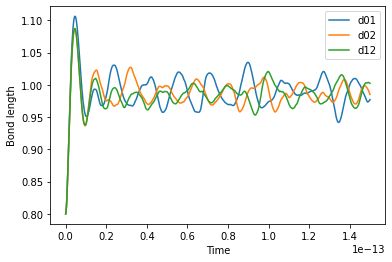

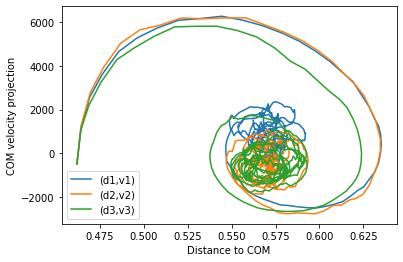

In [35]:
d01 = np.sqrt(np.power(coordinates[0] - coordinates[2],2) + np.power(coordinates[1] - coordinates[3],2))
d02 = np.sqrt(np.power(coordinates[0] - coordinates[4],2) + np.power(coordinates[1] - coordinates[5],2))
d12 = np.sqrt(np.power(coordinates[2] - coordinates[4],2) + np.power(coordinates[3] - coordinates[5],2))

plt.plot(times,d01,label = 'd01')
plt.plot(times,d02,label = 'd02')
plt.plot(times,d12,label = 'd12')




COMS = calc_COM(np.transpose(coordinates))

units = unit_vectors(np.transpose(coordinates),COMS)

velocity_proj = calc_projections(velocities,units)
#print(velocity_proj)

dists = np.transpose(calc_COM_dists(np.transpose(coordinates),COMS))
vels = np.transpose(velocity_proj)

u = 1.67e-27
k_b  = 1.38065e-23
mass_0 = u
mass_1 = u
mass = u
n_dof = 6



v_sq = np.array(velocity_proj[125:])

kin_eng2 = np.sum(v_sq**2*mass/2, axis=1)

ksum1 = 2*np.sum(kin_eng2)/len(kin_eng2)/k_b/n_dof

plt.xlabel("Time")
plt.ylabel("Bond length")
plt.legend()
plt.show()

plt.plot(dists[0],vels[0],label = '(d1,v1)')

plt.plot(dists[1],vels[1],label = '(d2,v2)')

plt.plot(dists[2],vels[2],label = '(d3,v3)')

plt.xlabel("Distance to COM")
plt.ylabel("COM velocity projection")
plt.legend()
plt.show()




In [32]:
import pandas as pd
from scipy.optimize import curve_fit


#d_rand_low8 = d01_low8[125:] 

#print(energies[125:])

bins_old = np.linspace(-1.2745,-1.2738 , 50)

prob1 = pd.cut(np.array(energies[125:]),bins_old)

langevin1 = pd.value_counts(prob1, normalize=True).sort_index()
distr_langevin1_init = []
for value in langevin1:
    distr_langevin1_init.append(value)

ind = np.argmax(distr_langevin1_init)


#print(distr_langevin1)
distr_langevin1 = distr_langevin1_init[ind:]
bins = bins_old[ind:]
bins = bins - bins[0]
distr_langevin1 = np.array(distr_langevin1)/distr_langevin1[0]

#print(bins)
#print(distr_langevin1)

#plt.hist(np.array(energies[125:]),bins)

#plt.show()

In [29]:
k_b  = 1.38065e-23
Ha = 4.36e-18

kb = k_b/Ha

#boltzmann distribution

def func_2(en,tem,amp):
    return amp*np.exp(-(en)/(kb*tem))    

delta = 0.3*dt  n = 8000  samples = 625
FIT TEMP: 52.806784420312525
KIN TEMP: 47.5357953704471


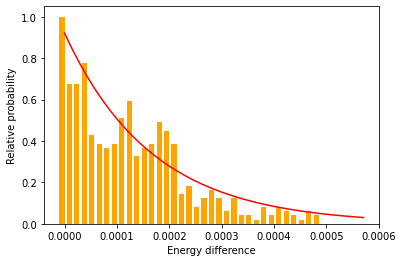

In [36]:
#delta= 0.2 n=8k 1
#delta= 0.2 n=128k 2
#delta= 2 n=8k 3
#delta= 2 n=128k 4

#print(bins)
poptstat1, pcovstat1 = curve_fit(func_2, bins[1:], distr_langevin1)
distr_pred1 = [func_2(i, poptstat1[0],poptstat1[1]) for i in bins]
#print(distr_pred1)

print("delta = 0.3*dt  n = 8000  samples = 625")
print("FIT TEMP: " + str(poptstat1[0]))
#
print("KIN TEMP: " + str(ksum1))


#print(distr_pred1)
width = 0.00001
plt.bar(np.array(bins[:-1])-width/2, np.array(distr_langevin1),width=width, color='orange', label="Langevin(Full)")
plt.plot(np.array(bins), np.array(distr_pred1), color='red')

plt.xlabel("Energy difference")
plt.ylabel("Relative probability")
#plt.hist()
plt.show()